In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data and Describe

In [2]:
# load the dataset
df = pd.read_csv('employee_retention.csv')
# show data samples
df.sample(5)

Username  EnterpriseID StatusPernikahan JenisKelamin  \
182     somberRelish9        106017    Belum_menikah         Pria   
285     truthfulMoth4        110744    Belum_menikah         Pria   
95     curiousBaboon5        105429    Belum_menikah         Pria   
139    gleefulKitten1        106347    Belum_menikah         Pria   
265  sheepishOatmeal5        105963    Belum_menikah         Pria   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
182          FullTime   Software Engineer (Back End)  Freshgraduate_program   
285          FullTime    Software Engineer (Android)              Mid_level   
95           FullTime  Software Engineer (Front End)              Mid_level   
139          FullTime   Software Engineer (Back End)  Freshgraduate_program   
265          FullTime  Software Engineer (Front End)  Freshgraduate_program   

    PerformancePegawai     AsalDaerah HiringPlatform  ...         NomorHP  \
182             Kurang  Jakarta Pusat         Indeed  ...  +6289511334xxx   
285              Bagus  Jakarta Utara  Google_Search  ...  +6287787391xxx   
95        Sangat_bagus  Jakarta Utara  Google_Search  ...  +6281830594xxx   
139       Sangat_bagus  Jakarta Pusat  Google_Search  ...  +6287713961xxx   
265             Kurang  Jakarta Utara         Indeed  ...  +6281933005xxx   

                             Email  TingkatPendidikan  PernahBekerja  \
182     somberRelish9280@gmail.com            Sarjana              1   
285     truthfulMoth4663@yahoo.com            Sarjana              1   
95    curiousBaboon5744@icloud.com            Sarjana              1   
139  gleefulKitten1142@outlook.com            Sarjana              1   
265  sheepishOatmeal5286@yahoo.com           Magister              1   

     IkutProgramLOP       AlasanResign TanggalLahir TanggalHiring  \
182             NaN      masih_bekerja   1976-01-19     2013-9-30   
285             0.0    kejelasan_karir   1981-10-01     2011-5-16   
95              NaN  tidak_bisa_remote   1983-07-28     2014-9-29   
139             NaN      masih_bekerja   1988-03-17    2011-01-10   
265             NaN                NaN   1976-11-15     2011-2-21   

    TanggalPenilaianKaryawan  TanggalResign  
182                2020-1-23              -  
285               2014-04-05     2018-04-01  
95                2020-02-01      2020-8-19  
139               2018-04-06              -  
265               2013-04-12              -  

[5 rows x 25 columns]

In [3]:
# check the data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
# Check unique values of each columns 
df.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
IkutProgramLOP                          2
AlasanResign                           11
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan          

In [5]:
# Describe numerical features
df.describe()

EnterpriseID  SkorSurveyEngagement  SkorKepuasanPegawai  \
count     287.000000            287.000000           282.000000   
mean   105923.324042              3.101045             3.904255   
std      4044.977599              0.836388             0.913355   
min    100282.000000              1.000000             1.000000   
25%    101269.000000              3.000000             3.000000   
50%    106069.000000              3.000000             4.000000   
75%    110514.500000              4.000000             5.000000   
max    111703.000000              5.000000             5.000000   

       JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
count                 284.000000                          286.000000   
mean                    1.179577                            0.412587   
std                     2.294441                            1.275016   
min                     0.000000                            0.000000   
25%                     0.000000                            0.000000   
50%                     0.000000                            0.000000   
75%                     0.000000                            0.000000   
max                     8.000000                            6.000000   

       JumlahKetidakhadiran  IkutProgramLOP  
count            281.000000       29.000000  
mean              10.448399        0.517241  
std                6.902252        0.508548  
min                1.000000        0.000000  
25%                5.000000        0.000000  
50%               10.000000        1.000000  
75%               15.000000        1.000000  
max               55.000000        1.000000

In [6]:
# Convert columns to categorical data type
cats_col = [
    'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan',
    'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
    'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'TingkatPendidikan',
    'PernahBekerja', 'IkutProgramLOP', 'AlasanResign'
]

for column in cats_col:
    df[column] = df[column].astype('object')

In [7]:
# Describe categorical features
df[cats_col].describe()

StatusPernikahan JenisKelamin StatusKepegawaian  \
count               287          287               287   
unique                5            2                 3   
top       Belum_menikah       Wanita          FullTime   
freq                132          167               217   

                           Pekerjaan           JenjangKarir  \
count                            287                    287   
unique                            14                      3   
top     Software Engineer (Back End)  Freshgraduate_program   
freq                             109                    169   

       PerformancePegawai     AsalDaerah HiringPlatform  SkorSurveyEngagement  \
count                 287            287            287                   287   
unique                  5              5              9                     5   
top                 Biasa  Jakarta Pusat         Indeed                     3   
freq                   85             72             85                   132   

        SkorKepuasanPegawai TingkatPendidikan PernahBekerja  IkutProgramLOP  \
count                 282.0               287           287            29.0   
unique                  5.0                 3             2             2.0   
top                     3.0           Sarjana             1             1.0   
freq                   96.0               176           286            15.0   

         AlasanResign  
count             221  
unique             11  
top     masih_bekerja  
freq              132

In [8]:
# Check value counts of categorical features
for column in cats_col:
    print(df[column].value_counts())

StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64
StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64
Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: count, dtype: int64
JenjangKarir
Freshgraduate_program    169
Mid_level                 70
Senior_level              48
Name: count, dtype:

### Overview: <br>

- The value 'yes' in the 'PernahBekerja' column appears to be an error. Assuming that '1' represents 'yes' and '0' represents 'no,' 'yes' will be replaced with '1'. However, since this column contains only one unique value, it will eventually be removed due to its lack of significance. <br>
- The 'Username', 'EnterpriseID', 'NomorHP' and 'Email' columns are deemed irrelevant for predicting employee retention and will therefore be deleted.

# Data Pre Processing

In [9]:
# Create a copy of the dataset to preserve the original data
df_cleaned = df.copy()

In [10]:
# Find columns that contain '-' values
columns_with_dash = df_cleaned.columns[df_cleaned.isin(['-']).any()]

# Display the column names that contain '-' values
print("Columns containing '-' values:", list(columns_with_dash))

# Optionally, display the rows with '-' values in those columns
rows_with_dash = df_cleaned[df_cleaned.isin(['-']).any(axis=1)]
rows_with_dash

Columns containing '-' values: ['StatusPernikahan', 'TanggalResign']


Username  EnterpriseID StatusPernikahan JenisKelamin  \
0    spiritedPorpoise3        111065    Belum_menikah         Pria   
3     stressedTruffle1        106325    Belum_menikah         Pria   
5          emptyMacaw4        106419    Belum_menikah       Wanita   
6            madZebra1        100309          Menikah       Wanita   
7     cynicalMandrill7        110500    Belum_menikah         Pria   
..                 ...           ...              ...          ...   
280       anxiousTeal2        111378    Belum_menikah       Wanita   
281       anxiousWasp6        100628         Bercerai         Pria   
282        dopeySheep0        106034    Belum_menikah       Wanita   
283  yearningPorpoise4        106254                -       Wanita   
286       puzzledFish5        106214          Menikah         Pria   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0           Outsource   Software Engineer (Back End)  Freshgraduate_program   
3           Outsource  Software Engineer (Front End)  Freshgraduate_program   
5           Outsource  Software Engineer (Front End)           Senior_level   
6            FullTime                   Data Analyst  Freshgraduate_program   
7            FullTime   Software Engineer (Back End)           Senior_level   
..                ...                            ...                    ...   
280          FullTime   Software Engineer (Back End)              Mid_level   
281          FullTime  Software Engineer (Front End)  Freshgraduate_program   
282          FullTime                  Data Engineer              Mid_level   
283          FullTime       Product Design (UI & UX)  Freshgraduate_program   
286        Internship                   Data Analyst              Mid_level   

    PerformancePegawai       AsalDaerah     HiringPlatform  ...  \
0         Sangat_bagus    Jakarta Timur  Employee_Referral  ...   
3                Bagus    Jakarta Pusat           LinkedIn  ...   
5                Biasa  Jakarta Selatan             Indeed  ...   
6                Biasa    Jakarta Utara           LinkedIn  ...   
7               Kurang  Jakarta Selatan           LinkedIn  ...   
..                 ...              ...                ...  ...   
280              Bagus    Jakarta Timur  Employee_Referral  ...   
281       Sangat_bagus    Jakarta Pusat             Indeed  ...   
282              Bagus    Jakarta Pusat      Google_Search  ...   
283              Biasa    Jakarta Timur           LinkedIn  ...   
286              Bagus    Jakarta Barat             Indeed  ...   

            NomorHP                            Email  TingkatPendidikan  \
0    +6282232522xxx   spiritedPorpoise3135@yahoo.com           Magister   
3    +6283233846xxx  stressedTruffle1406@hotmail.com            Sarjana   
5    +6283886053xxx         emptyMacaw4468@yahoo.com            Sarjana   
6    +6285735701xxx          madZebra1244@icloud.com            Sarjana   
7    +6281293511xxx  cynicalMandrill7920@hotmail.com           Magister   
..              ...                              ...                ...   
280  +6289567915xxx        anxiousTeal2015@gmail.com            Sarjana   
281  +6281806218xxx      anxiousWasp6788@outlook.com            Sarjana   
282  +6283343465xxx        dopeySheep0297@icloud.com            Sarjana   
283  +6281222782xxx   yearningPorpoise4421@yahoo.com            Sarjana   
286  +6287722818xxx      puzzledFish5776@hotmail.com            Sarjana   

     PernahBekerja  IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0                1             1.0  masih_bekerja   1972-07-01    2011-01-10   
3                1             0.0  masih_bekerja   1979-11-24     2014-2-17   
5                1             0.0  masih_bekerja   1980-05-12    2016-10-02   
6                1             NaN  masih_bekerja   1979-05-24    2014-11-10   
7                1             NaN  masih_bekerja   1983-08-24    2013-07-08   
..             ...             ...    

In [11]:
# Replace '-' value to NaN for column 'TanggalResign' and 'StatusPernikahan'
df_cleaned['TanggalResign'].replace('-', pd.NA, inplace=True)
df_cleaned['StatusPernikahan'].replace('-', pd.NA, inplace=True)

## Check if replacement was successful
# Find columns that contain '-' values
columns_with_dash = df_cleaned.columns[df_cleaned.isin(['-']).any()]

# Display the column names that contain '-' values
print("Columns containing '-' values:", list(columns_with_dash))

# Display df_cleaned
df_cleaned

Columns containing '-' values: []


Username  EnterpriseID StatusPernikahan JenisKelamin  \
0    spiritedPorpoise3        111065    Belum_menikah         Pria   
1      jealousGelding2        106080    Belum_menikah         Pria   
2        pluckyMuesli3        106452          Menikah         Pria   
3     stressedTruffle1        106325    Belum_menikah         Pria   
4          shyTermite7        111171    Belum_menikah       Wanita   
..                 ...           ...              ...          ...   
282        dopeySheep0        106034    Belum_menikah       Wanita   
283  yearningPorpoise4        106254             <NA>       Wanita   
284      murkySausage9        110433          Menikah       Wanita   
285      truthfulMoth4        110744    Belum_menikah         Pria   
286       puzzledFish5        106214          Menikah         Pria   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0           Outsource   Software Engineer (Back End)  Freshgraduate_program   
1            FullTime                   Data Analyst  Freshgraduate_program   
2            FullTime  Software Engineer (Front End)  Freshgraduate_program   
3           Outsource  Software Engineer (Front End)  Freshgraduate_program   
4            FullTime                Product Manager  Freshgraduate_program   
..                ...                            ...                    ...   
282          FullTime                  Data Engineer              Mid_level   
283          FullTime       Product Design (UI & UX)  Freshgraduate_program   
284          FullTime  Software Engineer (Front End)           Senior_level   
285          FullTime    Software Engineer (Android)              Mid_level   
286        Internship                   Data Analyst              Mid_level   

    PerformancePegawai     AsalDaerah      HiringPlatform  ...  \
0         Sangat_bagus  Jakarta Timur   Employee_Referral  ...   
1        Sangat_kurang  Jakarta Utara             Website  ...   
2                Bagus  Jakarta Timur              Indeed  ...   
3                Bagus  Jakarta Pusat            LinkedIn  ...   
4                Bagus  Jakarta Timur            LinkedIn  ...   
..                 ...            ...                 ...  ...   
282              Bagus  Jakarta Pusat       Google_Search  ...   
283              Biasa  Jakarta Timur            LinkedIn  ...   
284              Biasa  Jakarta Pusat  Diversity_Job_Fair  ...   
285              Bagus  Jakarta Utara       Google_Search  ...   
286              Bagus  Jakarta Barat              Indeed  ...   

            NomorHP                            Email  TingkatPendidikan  \
0    +6282232522xxx   spiritedPorpoise3135@yahoo.com           Magister   
1    +6281270745xxx     jealousGelding2239@yahoo.com            Sarjana   
2    +6281346215xxx      pluckyMuesli3961@icloud.com           Magister   
3    +6283233846xxx  stressedTruffle1406@hotmail.com            Sarjana   
4    +6287883263xxx         shyTermite7149@gmail.com            Sarjana   
..              ...                              ...                ...   
282  +6283343465xxx        dopeySheep0297@icloud.com            Sarjana   
283  +6281222782xxx   yearningPorpoise4421@yahoo.com            Sarjana   
284  +6285821950xxx       murkySausage9688@yahoo.com            Sarjana   
285  +6287787391xxx       truthfulMoth4663@yahoo.com            Sarjana   
286  +6287722818xxx      puzzledFish5776@hotmail.com            Sarjana   

     PernahBekerja  IkutProgramLOP     AlasanResign TanggalLahir  \
0                1             1.0    masih_bekerja   1972-07-01   
1                1             1.0    toxic_culture   1984-04-26   
2                1             1.0        jam_kerja   1974-01-07   
3                1             0.0    masih_bekerja   1979-11-24   
4                1             0.0      ganti_karir   1974-11-07   
..             ...             ...              ...          ...   
282              1             NaN              NaN   

In [12]:
# Replace incorrect value in 'PernahBekerja'
df_cleaned['PernahBekerja'] = df_cleaned['PernahBekerja'].replace('yes', '1')
print(df_cleaned['PernahBekerja'].value_counts())

PernahBekerja
1    287
Name: count, dtype: int64


In [13]:
# Check duplicates
df_cleaned.duplicated().sum()

0

In [14]:
# Check null values
df_cleaned.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        3
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

### Overview: 
- Due to the fact that the columns 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', and 'JumlahKetidakhadiran' must contain integer values, nulls will be imputed using the median.

- Column 'IkutProgramLOP' contains 89.8% null values, indicating it has limited utility for future analysis.

- Null values in the column 'AlasanResign' and 'SkorKepuasanPegawai' will be imputed with the most frequently occurring value.

In [15]:
# Impute numerical columns with median
nums_to_impute = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

for column in nums_to_impute:
    median = df[column].median()
    df_cleaned[column].fillna(median, inplace=True)

In [16]:
# List of categorical columns to impute
cats_to_impute = ['AlasanResign', 'SkorKepuasanPegawai', 'StatusPernikahan']

# Iterate over each column, fill NaN with the mode (most frequent value)
for column in cats_to_impute:
    # Convert the column to 'object' to ensure it's mutable
    df_cleaned[column] = df_cleaned[column].astype('object')
    
    # Calculate the mode (most frequent value)
    mode = df_cleaned[column].mode()[0]
    
    # Fill NaN values with the mode
    df_cleaned[column].fillna(mode, inplace=True)

# Check null values after imputation
df_cleaned.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [17]:
# Drop irrelevant columns ('Username', 'EnterpriseID', 'PernahBekerja', 'IkutProgramLOP', 'NomorHP' and 'Email')
df_cleaned.drop(columns=['Username', 'EnterpriseID', 'PernahBekerja', 'IkutProgramLOP', 'NomorHP', 'Email'], inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    object 
 9   SkorKepuasanPegawai                 287 non-null    float64
 10  JumlahKeikutsertaanProjek           287 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    object 
 9   SkorKepuasanPegawai                 287 non-null    float64
 10  JumlahKeikutsertaanProjek           287 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

In [19]:
# Drop rows representing irrelevant value for machine learning
## Drop rows where 'StatusKepegawaian' is 'Internship'
df_cleaned = df_cleaned[df_cleaned['StatusKepegawaian'] != 'Internship']
df_cleaned['StatusKepegawaian'].value_counts()

StatusKepegawaian
FullTime     217
Outsource     66
Name: count, dtype: int64

In [20]:
# Adjust data format according to value of each column
int_cols = ['JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'JumlahKeikutsertaanProjek', 'SkorKepuasanPegawai', 'SkorSurveyEngagement']
for i in int_cols:
    df_cleaned[i] = df_cleaned[i].astype(int)

dt_cols = ['TanggalHiring', 'TanggalResign', 'TanggalLahir', 'TanggalPenilaianKaryawan']
for i in dt_cols:
    df_cleaned[i] = pd.to_datetime(df_cleaned[i], errors='coerce')

# Confirm changes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 285
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    283 non-null    object        
 1   JenisKelamin                        283 non-null    object        
 2   StatusKepegawaian                   283 non-null    object        
 3   Pekerjaan                           283 non-null    object        
 4   JenjangKarir                        283 non-null    object        
 5   PerformancePegawai                  283 non-null    object        
 6   AsalDaerah                          283 non-null    object        
 7   HiringPlatform                      283 non-null    object        
 8   SkorSurveyEngagement                283 non-null    int64         
 9   SkorKepuasanPegawai                 283 non-null    int64         
 10  JumlahKeikutsertaanProjek      

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/3947188362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[i] = df_cleaned[i].astype(int)
/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/3947188362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[i] = df_cleaned[i].astype(int)
/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/3947188362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [21]:
# Save df_cleaned to a CSV file
df_cleaned.to_csv('df_cleaned.csv', index=False)

### During the data preprocessing phase, missing values were addressed through imputation, and six columns were removed due to their insignificance for prediction. This refinement reduced the dataset from 24 to 18 columns, ensuring that the data is now streamlined, complete, and ready for further analysis.

# Analysis on Employee Number Changes 

In [22]:
# Convert 'TanggalHiring' and 'TanggalResign' to datetime format, handling errors
cols = ['TanggalHiring', 'TanggalResign']

# Extract the year from the date column
new_cols = ['TahunHiring', 'TahunResign']
for i, j in zip(cols, new_cols):
    df_cleaned[j] = df_cleaned[i].dt.year

# Display new column
df_cleaned[new_cols]

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3288732851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[j] = df_cleaned[i].dt.year
/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3288732851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[j] = df_cleaned[i].dt.year


TahunHiring  TahunResign
0           2011          NaN
1           2014       2018.0
2           2011       2014.0
3           2014          NaN
4           2013       2018.0
..           ...          ...
281         2017          NaN
282         2011          NaN
283         2013       2017.0
284         2013       2018.0
285         2011       2018.0

[283 rows x 2 columns]

In [23]:
# Aggregate the number of hired employees each year
tabel_hiring = df_cleaned.groupby('TahunHiring').size().reset_index(name='JumlahKaryawanMasuk')

# Convert 'TahunResign' to integer type
tabel_hiring['TahunHiring'] = tabel_hiring['TahunHiring'].astype(int)

# Display the results
tabel_hiring

TahunHiring  JumlahKaryawanMasuk
0          2006                    1
1          2007                    2
2          2008                    2
3          2009                    7
4          2010                    8
5          2011                   73
6          2012                   40
7          2013                   43
8          2014                   56
9          2015                   31
10         2016                   14
11         2017                    5
12         2018                    1

In [24]:
# Aggregrate the number of resigned employee each year
tabel_resign = df_cleaned.groupby('TahunResign').size().reset_index(name='JumlahKaryawanKeluar')

# Convert 'TahunResign' to integer type
tabel_resign['TahunResign'] = tabel_resign['TahunResign'].astype(int)

# Display the results
tabel_resign

TahunResign  JumlahKaryawanKeluar
0         2013                     5
1         2014                    12
2         2015                     8
3         2016                     8
4         2017                    19
5         2018                    23
6         2019                     5
7         2020                     6

In [25]:
# Perform an outer join on the year columns
tabel_joined = pd.merge(
    tabel_hiring,
    tabel_resign,
    left_on='TahunHiring', 
    right_on='TahunResign',
    how='outer'
)

# Drop the redundant 'TahunResign' column
tabel_joined = tabel_joined.drop(columns=['TahunResign'])

# Rename the 'TahunHiring' column to 'Tahun'
tabel_joined = tabel_joined.rename(columns={'TahunHiring': 'Tahun'})

# Display the joined DataFrame
tabel_joined


Tahun  JumlahKaryawanMasuk  JumlahKaryawanKeluar
0   2006.0                  1.0                   NaN
1   2007.0                  2.0                   NaN
2   2008.0                  2.0                   NaN
3   2009.0                  7.0                   NaN
4   2010.0                  8.0                   NaN
5   2011.0                 73.0                   NaN
6   2012.0                 40.0                   NaN
7   2013.0                 43.0                   5.0
8   2014.0                 56.0                  12.0
9   2015.0                 31.0                   8.0
10  2016.0                 14.0                   8.0
11  2017.0                  5.0                  19.0
12  2018.0                  1.0                  23.0
13     NaN                  NaN                   5.0
14     NaN                  NaN                   6.0

In [26]:
# Impute nulls in 'Tahun' column 
# Define the years to fill
years_to_fill = [2019, 2020]

# Replace NaN values in 'Tahun' with specified years
tabel_joined.loc[tabel_joined['Tahun'].isna(), 'Tahun'] = years_to_fill

# Convert 'Tahun' to integer type (optional)
tabel_joined['Tahun'] = tabel_joined['Tahun'].astype(int)

# Display the updated DataFrame
print(tabel_joined)

    Tahun  JumlahKaryawanMasuk  JumlahKaryawanKeluar
0    2006                  1.0                   NaN
1    2007                  2.0                   NaN
2    2008                  2.0                   NaN
3    2009                  7.0                   NaN
4    2010                  8.0                   NaN
5    2011                 73.0                   NaN
6    2012                 40.0                   NaN
7    2013                 43.0                   5.0
8    2014                 56.0                  12.0
9    2015                 31.0                   8.0
10   2016                 14.0                   8.0
11   2017                  5.0                  19.0
12   2018                  1.0                  23.0
13   2019                  NaN                   5.0
14   2020                  NaN                   6.0


In [27]:


# Fill NaN values in 'JumlahKaryawanMasuk' and 'JumlahKaryawanKeluar' columns
tabel_joined['JumlahKaryawanMasuk'] = tabel_joined['JumlahKaryawanMasuk'].fillna(0)
tabel_joined['JumlahKaryawanKeluar'] = tabel_joined['JumlahKaryawanKeluar'].fillna(0)

# Calculate cumulative sums
tabel_joined['AkumulasiKaryawanKeluar'] = tabel_joined['JumlahKaryawanKeluar'].cumsum()

# Calculate cumulative number of employees who have stayed
tabel_joined['AkumulasiKaryawanBertahan'] = tabel_joined['JumlahKaryawanMasuk'].cumsum() - tabel_joined['AkumulasiKaryawanKeluar']

# Display the updated DataFrame
tabel_joined

Tahun  JumlahKaryawanMasuk  JumlahKaryawanKeluar  AkumulasiKaryawanKeluar  \
0    2006                  1.0                   0.0                      0.0   
1    2007                  2.0                   0.0                      0.0   
2    2008                  2.0                   0.0                      0.0   
3    2009                  7.0                   0.0                      0.0   
4    2010                  8.0                   0.0                      0.0   
5    2011                 73.0                   0.0                      0.0   
6    2012                 40.0                   0.0                      0.0   
7    2013                 43.0                   5.0                      5.0   
8    2014                 56.0                  12.0                     17.0   
9    2015                 31.0                   8.0                     25.0   
10   2016                 14.0                   8.0                     33.0   
11   2017                  5.0                  19.0                     52.0   
12   2018                  1.0                  23.0                     75.0   
13   2019                  0.0                   5.0                     80.0   
14   2020                  0.0                   6.0                     86.0   

    AkumulasiKaryawanBertahan  
0                         1.0  
1                         3.0  
2                         5.0  
3                        12.0  
4                        20.0  
5                        93.0  
6                       133.0  
7                       171.0  
8                       215.0  
9                       238.0  
10                      244.0  
11                      230.0  
12                      208.0  
13                      203.0  
14                      197.0

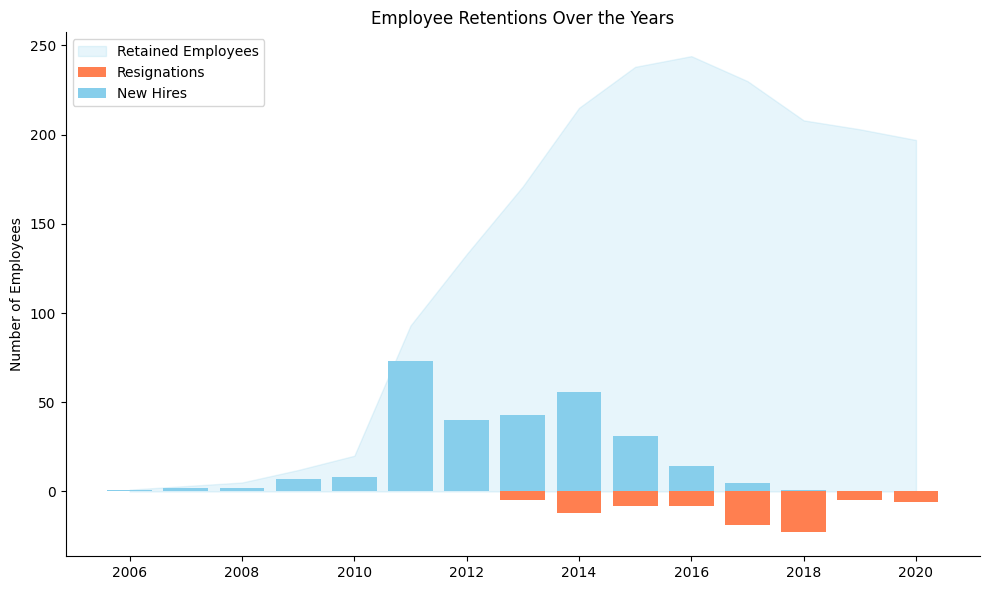

In [28]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the cumulative number of employees who have stayed (blue transparent area chart)
plt.fill_between(tabel_joined['Tahun'], tabel_joined['AkumulasiKaryawanBertahan'], label='Retained Employees', color='skyblue', alpha=0.2)

# Plot the number of employees who resigned (down bar chart with negative values)
plt.bar(tabel_joined['Tahun'], -tabel_joined['JumlahKaryawanKeluar'], label='Resignations', color='coral')

# Plot the number of new hires (up bar chart with positive values)
plt.bar(tabel_joined['Tahun'], tabel_joined['JumlahKaryawanMasuk'], label='New Hires', color='skyblue')

# Add titles and labels
plt.title('Employee Retentions Over the Years')
plt.ylabel('Number of Employees')

# Show the legend
plt.legend()

# Remove grid lines
plt.grid(False)

# Layout adjustments
plt.tight_layout()

# Menghapus frame plot
sns.despine()

# Show the legend on the left side
plt.legend(loc='upper left')

# Display the plot
plt.show()


# Analysis on Resignation Reasons

In [29]:
# Buat DataFrame untuk karyawan yang belum resign (TanggalResign null atau 0)
belum_resign = df_cleaned[df_cleaned['TanggalResign'].isna()].groupby('Pekerjaan').size().reset_index(name='JumlahBelumResign')

# Buat DataFrame untuk karyawan yang sudah resign (TanggalResign terisi)
sudah_resign = df_cleaned[~df_cleaned['TanggalResign'].isna()].groupby('Pekerjaan').size().reset_index(name='JumlahSudahResign')

# Gabungkan kedua DataFrame menggunakan outer join
df_merged = pd.merge(belum_resign, sudah_resign, on='Pekerjaan', how='outer')

# Tampilkan hasil
df_merged


Pekerjaan  JumlahBelumResign  JumlahSudahResign
0                     Data Analyst                  7                8.0
1                    Data Engineer                  7                3.0
2                  DevOps Engineer                  3                NaN
3          Digital Product Manager                  2                NaN
4        Machine Learning Engineer                  2                NaN
5         Product Design (UI & UX)                 15                9.0
6   Product Design (UX Researcher)                  1                NaN
7                  Product Manager                 11                5.0
8                     Scrum Master                  3                NaN
9               Software Architect                  1                NaN
10     Software Engineer (Android)                 17                7.0
11    Software Engineer (Back End)                 81               27.0
12   Software Engineer (Front End)                 44               27.0
13         Software Engineer (iOS)                  3                NaN

In [30]:
# Add a new column for the total number of employees (existing + resigned)
df_merged['JumlahEmployee'] = df_merged['JumlahBelumResign'] + df_merged['JumlahSudahResign']

# Add a new column for the percentage of employees still employed
df_merged['PersentaseBelumResign'] = (df_merged['JumlahBelumResign'] / df_merged['JumlahEmployee']) * 100

# Display the updated DataFrame
df_merged

Pekerjaan  JumlahBelumResign  JumlahSudahResign  \
0                     Data Analyst                  7                8.0   
1                    Data Engineer                  7                3.0   
2                  DevOps Engineer                  3                NaN   
3          Digital Product Manager                  2                NaN   
4        Machine Learning Engineer                  2                NaN   
5         Product Design (UI & UX)                 15                9.0   
6   Product Design (UX Researcher)                  1                NaN   
7                  Product Manager                 11                5.0   
8                     Scrum Master                  3                NaN   
9               Software Architect                  1                NaN   
10     Software Engineer (Android)                 17                7.0   
11    Software Engineer (Back End)                 81               27.0   
12   Software Engineer (Front End)                 44               27.0   
13         Software Engineer (iOS)                  3                NaN   

    JumlahEmployee  PersentaseBelumResign  
0             15.0              46.666667  
1             10.0              70.000000  
2              NaN                    NaN  
3              NaN                    NaN  
4              NaN                    NaN  
5             24.0              62.500000  
6              NaN                    NaN  
7             16.0              68.750000  
8              NaN                    NaN  
9              NaN                    NaN  
10            24.0              70.833333  
11           108.0              75.000000  
12            71.0              61.971831  
13             NaN                    NaN

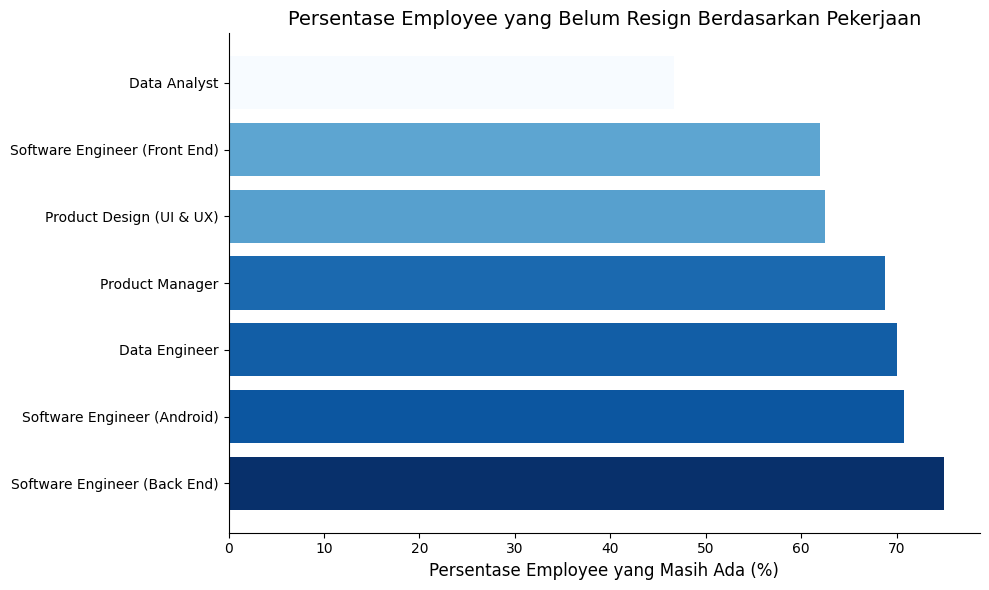

In [31]:
import matplotlib.colors as mcolors

# Sort DataFrame
df_merged_sorted = df_merged.sort_values(by='PersentaseBelumResign', ascending=False)

# Normalize percentage values for colormap
norm = mcolors.Normalize(vmin=df_merged_sorted['PersentaseBelumResign'].min(), vmax=df_merged_sorted['PersentaseBelumResign'].max())
cmap = plt.get_cmap('Blues')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot bars with gradient colors
for index, row in df_merged_sorted.iterrows():
    plt.barh(row['Pekerjaan'], row['PersentaseBelumResign'], color=cmap(norm(row['PersentaseBelumResign'])))

# Add titles and labels
plt.title('Persentase Employee yang Belum Resign Berdasarkan Pekerjaan', fontsize=14)
plt.xlabel('Persentase Employee yang Masih Ada (%)', fontsize=12)


# Remove plot frame
sns.despine()

# Remove grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

## Insights:
High Turnover in Data-Focused Roles: Data Analyst, Data Engineer, and Software Engineer (Back End) roles exhibit some of the highest resignation rates, indicating possible issues specific to these roles, such as job stress, high workloads, or job dissatisfaction.


In [32]:
# Filter for 'Data Analyst' role
df_data_analyst = df_cleaned[df_cleaned['Pekerjaan'] == 'Data Analyst']

# Ensure 'TanggalResign' is in datetime format and check resignation status
df_data_analyst['Resigned'] = df_data_analyst['TanggalResign'].notna()

# Display
df_data_analyst

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3464469464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_analyst['Resigned'] = df_data_analyst['TanggalResign'].notna()


StatusPernikahan JenisKelamin StatusKepegawaian     Pekerjaan  \
1      Belum_menikah         Pria          FullTime  Data Analyst   
6            Menikah       Wanita          FullTime  Data Analyst   
18          Bercerai       Wanita          FullTime  Data Analyst   
54           Lainnya       Wanita          FullTime  Data Analyst   
78          Bercerai         Pria          FullTime  Data Analyst   
86           Menikah       Wanita         Outsource  Data Analyst   
102          Menikah         Pria         Outsource  Data Analyst   
105    Belum_menikah       Wanita          FullTime  Data Analyst   
106    Belum_menikah       Wanita          FullTime  Data Analyst   
108    Belum_menikah       Wanita          FullTime  Data Analyst   
229    Belum_menikah       Wanita          FullTime  Data Analyst   
233    Belum_menikah       Wanita          FullTime  Data Analyst   
236    Belum_menikah         Pria          FullTime  Data Analyst   
239    Belum_menikah       Wanita         Outsource  Data Analyst   
277    Belum_menikah         Pria          FullTime  Data Analyst   

              JenjangKarir PerformancePegawai       AsalDaerah  \
1    Freshgraduate_program      Sangat_kurang    Jakarta Utara   
6    Freshgraduate_program              Biasa    Jakarta Utara   
18   Freshgraduate_program       Sangat_bagus    Jakarta Pusat   
54               Mid_level       Sangat_bagus    Jakarta Barat   
78               Mid_level       Sangat_bagus    Jakarta Barat   
86   Freshgraduate_program       Sangat_bagus    Jakarta Timur   
102  Freshgraduate_program       Sangat_bagus    Jakarta Barat   
105  Freshgraduate_program              Bagus    Jakarta Timur   
106  Freshgraduate_program              Bagus    Jakarta Barat   
108  Freshgraduate_program              Biasa    Jakarta Timur   
229              Mid_level       Sangat_bagus    Jakarta Barat   
233  Freshgraduate_program       Sangat_bagus    Jakarta Utara   
236              Mid_level             Kurang  Jakarta Selatan   
239  Freshgraduate_program              Biasa    Jakarta Utara   
277              Mid_level       Sangat_bagus    Jakarta Utara   

         HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  ...  \
1               Website                     4                    4  ...   
6              LinkedIn                     2                    3  ...   
18   Diversity_Job_Fair                     3                    4  ...   
54             LinkedIn                     4                    5  ...   
78    Employee_Referral                     4                    4  ...   
86               Indeed                     3                    5  ...   
102       Google_Search                     3                    3  ...   
105              Indeed                     3                    3  ...   
106       CareerBuilder                     4                    3  ...   
108       CareerBuilder                     4                    4  ...   
229              Indeed                     4                    5  ...   
233  Diversity_Job_Fair                     4                    3  ...   
236  Diversity_Job_Fair                     4                    4  ...   
239       Google_Search                     4                    4  ...   
277            LinkedIn                     4                    5  ...   

     JumlahKetidakhadiran  TingkatPendidikan       AlasanResign TanggalLahir  \
1                       3            Sarjana      toxic_culture   1984-04-26   
6                      19            Sarjana      masih_bekerja   1979-05-24   
18                     17            Sarjana  internal_conflict   1968-05-30   
54                     10            Sarjana      masih_bekerja   1987-05-21   
78                     19            Sarjana      masih_bekerja   1983-02-18   
86                      2            Sarjana      toxic_culture   1987-06-14   
102                    20            Sarjana      toxic_culture   1984-05-09   
1

In [33]:
# Save the DataFrame to a CSV file
df_data_analyst.to_csv('df_data_analyst.csv', index=False)

In [34]:
# load the dataset
df_data_analyst = pd.read_csv('df_data_analyst.csv')

# Ensure 'TanggalResign' is in datetime format and check resignation status
df_data_analyst['Resigned'] = df_data_analyst['TanggalResign'].notna()

# Aggregate based on Jenjang Karir, Performa Karyawan, and Alasan Resign
agg_table = df_data_analyst[df_data_analyst['Resigned']].groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahResign')

# Display the aggregation table
print(agg_table)

            JenjangKarir PerformancePegawai       AlasanResign  JumlahResign
0  Freshgraduate_program              Bagus      toxic_culture             1
1  Freshgraduate_program              Biasa  internal_conflict             1
2  Freshgraduate_program              Biasa      toxic_culture             1
3  Freshgraduate_program       Sangat_bagus  internal_conflict             1
4  Freshgraduate_program       Sangat_bagus      toxic_culture             3
5  Freshgraduate_program      Sangat_kurang      toxic_culture             1


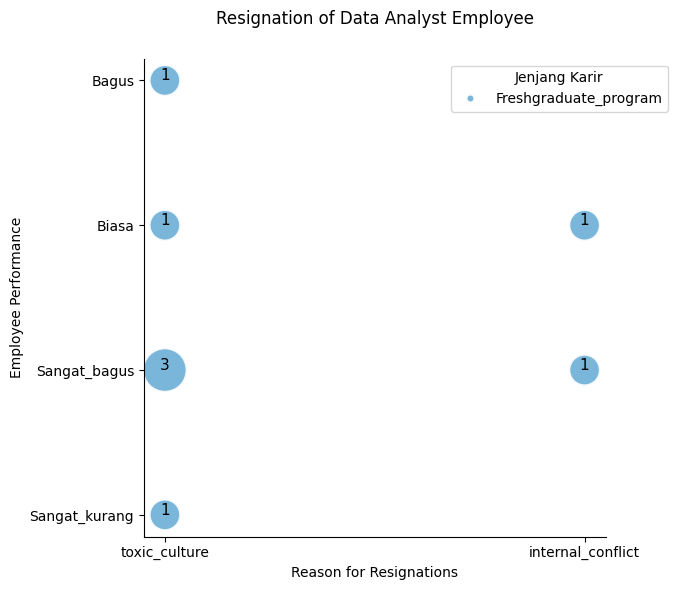

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))

# Create a bubble chart
bubble_chart = sns.scatterplot(
    data=agg_table,
    y='PerformancePegawai',
    x='AlasanResign',
    hue='JenjangKarir',
    size='JumlahResign',
    sizes=(500, 1000),
    palette='Blues',
    alpha=0.9
)

# Add labels to each bubble with JumlahResign
for line in range(agg_table.shape[0]):
    plt.text(
        agg_table['AlasanResign'][line],
        agg_table['PerformancePegawai'][line],
        agg_table['JumlahResign'][line],
        horizontalalignment='center',
        size=11,
        color='black'
    )

# Add the hue legend and remove the size legend
handles, labels = bubble_chart.get_legend_handles_labels()
hue_handles = [handle for handle, label in zip(handles, labels) if label in agg_table['JenjangKarir'].unique()]
hue_labels = [label for label in labels if label in agg_table['JenjangKarir'].unique()]

# Add the hue legend
plt.legend(
    handles=hue_handles,
    labels=hue_labels,
    title='Jenjang Karir',
    loc='upper right',
    bbox_to_anchor=(1.15, 1)
)

# Add titles and labels
plt.ylabel('Employee Performance')
plt.xlabel('Reason for Resignations')
plt.title('Resignation of Data Analyst Employee', pad=25)

# Remove grid lines and frame
sns.despine()
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


In [36]:
import plotly.express as px

# Define the custom color palette
color_map = {
    'Sangat_bagus': 'darkgreen',
    'Bagus': 'lightgreen',
    'Biasa': 'orange',
    'Sangat_kurang': 'red'
}

# Create the sunburst chart
fig = px.sunburst(
    agg_table,
    path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],  # Define the hierarchy
    values='JumlahResign',  # Size of each section
    color='PerformancePegawai',  # Color by performance
    color_discrete_map=color_map,  # Apply the custom color palette
    title="Resignation of Data Analyst Employee",
)

# Update hover information to show 'JumlahResign'
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Jumlah Resign: %{value}<br>'
)

# Update text annotations for 'AlasanResign' sections
fig.update_traces(
    text=[f'{value}' for value in agg_table['JumlahResign']],
    textinfo='label+text'  # Display both label and text (JumlahResign) in the chart
)

# Update layout for the chart with larger size, centered title, and title customization
fig.update_layout(
    margin=dict(t=60, l=0, r=0, b=0),  # Increase top margin to add space between title and chart
    width=800,  # Increase the width of the chart
    height=800,  # Increase the height of the chart
    title=dict(
        text="Resignation of Data Analyst Employee",  # Set the title text
        x=0.5,  # Center the title horizontally
        font=dict(size=20, family='Arial, Bold', color='black')  # Set font size, family, and color
    ),
)

# Show the plot
fig.show()


### Insights:
- The Data Analyst department has a 50% resignation rate, the highest of any department. This is likely because the role involves tight deadlines, complex data, and high expectations, leading to stress and burnout.
- Most resignations in the Data Analyst department are due to a "toxic culture," affecting 5 out of 7 employees, including those with "excellent" performance ratings. Additionally, 2 resignations are attributed to internal conflict, highlighting broader issues with team dynamics and communication.
- Resignations are limited to the Freshgraduate_program level, with no resignations from Mid_level or Senior_level employees. This suggests that entry-level employees are more affected by toxic culture and internal conflicts, while more senior employees may have adapted to or are less impacted by these issues.

### Recommendation:
- Improve Work-Life Balance: Introduce flexible work arrangements or wellness programs to help employees maintain a better work-life balance and reduce burnout.
- Assess and Address Toxic Culture: Conduct a comprehensive assessment to identify factors contributing to a toxic work environment and implement clear procedures for resolving internal conflicts. This approach aims to improve the overall workplace culture.
- Enhance Support for Freshgraduate_program Employees: Focus on improving the work environment and career development specifically for entry-level employees. Implement training programs in conflict management and communication, and provide structured mentoring and development opportunities to support their integration and growth within the organization.

# Feature Engineering

In [22]:
# Add target 'Resign' to dataframe 
df_cleaned['Resigned'] = df_cleaned['TanggalResign'].notna()
display(df_cleaned[['TanggalResign', 'Resigned']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/2938071132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Resigned'] = df_cleaned['TanggalResign'].notna()


TanggalResign  Resigned
0             NaT     False
1      2018-06-16      True
2      2014-09-24      True
3             NaT     False
4      2018-09-06      True
..            ...       ...
281           NaT     False
282           NaT     False
283    2017-11-15      True
284    2018-06-08      True
285    2018-04-01      True

[283 rows x 2 columns]

In [23]:
# Extract age from BirthDate
from datetime import datetime

# Define a function to calculate age
def calculate_age(birth_date, as_of_date=datetime.now()):
    return as_of_date.year - birth_date.year - ((as_of_date.month, as_of_date.day) 
                                                < (birth_date.month, birth_date.day))

# Apply the function to create the 'Usia' column
df_cleaned['Usia'] = df_cleaned['TanggalLahir'].apply(calculate_age)

display(df_cleaned[['Usia', 'TanggalLahir']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/1457402569.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Usia'] = df_cleaned['TanggalLahir'].apply(calculate_age)


Usia TanggalLahir
0      52   1972-07-01
1      40   1984-04-26
2      50   1974-01-07
3      44   1979-11-24
4      49   1974-11-07
..    ...          ...
281    41   1983-09-04
282    50   1973-12-08
283    49   1974-12-01
284    54   1969-10-30
285    42   1981-10-01

[283 rows x 2 columns]

In [24]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Create 'Year_Tenure' column
df_cleaned['Year_Tenure'] = df_cleaned.apply(lambda row: (row['TanggalResign'].year 
                                                          - row['TanggalHiring'].year) 
                             if pd.notnull(row['TanggalResign']) 
                             else (current_year - row['TanggalHiring'].year), axis=1)

# Preview the dataframe
display(df_cleaned[['TanggalHiring', 'TanggalResign', 'Year_Tenure']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/2943284024.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year_Tenure'] = df_cleaned.apply(lambda row: (row['TanggalResign'].year


TanggalHiring TanggalResign  Year_Tenure
0      2011-01-10           NaT           13
1      2014-01-06    2018-06-16            4
2      2011-01-10    2014-09-24            3
3      2014-02-17           NaT           10
4      2013-11-11    2018-09-06            5
..            ...           ...          ...
281    2017-02-15           NaT            7
282    2011-09-26           NaT           13
283    2013-05-13    2017-11-15            4
284    2013-11-11    2018-06-08            5
285    2011-05-16    2018-04-01            7

[283 rows x 3 columns]

In [25]:
# Create average project per year 
## Ensure 'Year_Tenure' and 'JumlahKeikutsertaanProjek' are not zero before division
df_cleaned['Avg_Projects_Per_Year'] = df_cleaned.apply(
    lambda row: row['JumlahKeikutsertaanProjek'] / row['Year_Tenure'] 
    if row['Year_Tenure'] != 0 and row['JumlahKeikutsertaanProjek'] != 0 
    else 0,
    axis=1
)
# Preview the dataframe
display(df_cleaned[['JumlahKeikutsertaanProjek', 'Year_Tenure', 'Avg_Projects_Per_Year']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/3093063304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Avg_Projects_Per_Year'] = df_cleaned.apply(


JumlahKeikutsertaanProjek  Year_Tenure  Avg_Projects_Per_Year
0                            0           13                    0.0
1                            4            4                    1.0
2                            0            3                    0.0
3                            0           10                    0.0
4                            0            5                    0.0
..                         ...          ...                    ...
281                          7            7                    1.0
282                          0           13                    0.0
283                          0            4                    0.0
284                          0            5                    0.0
285                          0            7                    0.0

[283 rows x 3 columns]

In [26]:
# Create absenteeism rate (Rate ketidak hadiran tiap tahun) 
## Ensure 'Year_Tenure' and 'JumlahKetidakhadiran' are not zero before division
df_cleaned['Absenteeism_Rate'] = df_cleaned.apply(
    lambda row: row['JumlahKetidakhadiran'] / row['Year_Tenure'] 
    if row['Year_Tenure'] != 0 and row['JumlahKetidakhadiran'] != 0 
    else 0,
    axis=1
)

# Preview the dataframe
display(df_cleaned[['JumlahKetidakhadiran', 'Year_Tenure', 'Absenteeism_Rate']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/1431589340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Absenteeism_Rate'] = df_cleaned.apply(


JumlahKetidakhadiran  Year_Tenure  Absenteeism_Rate
0                       9           13          0.692308
1                       3            4          0.750000
2                      11            3          3.666667
3                       6           10          0.600000
4                      11            5          2.200000
..                    ...          ...               ...
281                    15            7          2.142857
282                    16           13          1.230769
283                    11            4          2.750000
284                    17            5          3.400000
285                    20            7          2.857143

[283 rows x 3 columns]

In [27]:
# Define the function to categorize jobs
def categorize_job(job):
    if job in ['Software Engineer (Back End)', 'Software Engineer (Front End)', 
               'Software Engineer (Android)', 'Software Engineer (iOS)', 
               'Software Architect', 'DevOps Engineer']:
        return 'Engineering/Development'
    elif job in ['Product Manager', 'Digital Product Manager', 'Scrum Master']:
        return 'Product Management'
    elif job in ['Product Design (UI & UX)', 'Product Design (UX Researcher)']:
        return 'Design/UX'
    elif job in ['Data Analyst', 'Data Engineer', 'Machine Learning Engineer']:
        return 'Data/Analytics'
    else:
        return 'Other'

# Apply the categorization to the 'Pekerjaan' column
df_cleaned['Job_Category'] = df_cleaned['Pekerjaan'].apply(categorize_job)

# Check the new categorized column
display(df_cleaned[['Pekerjaan', 'Job_Category']])


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/3526906090.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Job_Category'] = df_cleaned['Pekerjaan'].apply(categorize_job)


Pekerjaan             Job_Category
0     Software Engineer (Back End)  Engineering/Development
1                     Data Analyst           Data/Analytics
2    Software Engineer (Front End)  Engineering/Development
3    Software Engineer (Front End)  Engineering/Development
4                  Product Manager       Product Management
..                             ...                      ...
281  Software Engineer (Front End)  Engineering/Development
282                  Data Engineer           Data/Analytics
283       Product Design (UI & UX)                Design/UX
284  Software Engineer (Front End)  Engineering/Development
285    Software Engineer (Android)  Engineering/Development

[283 rows x 2 columns]

# Bivariate Analysis

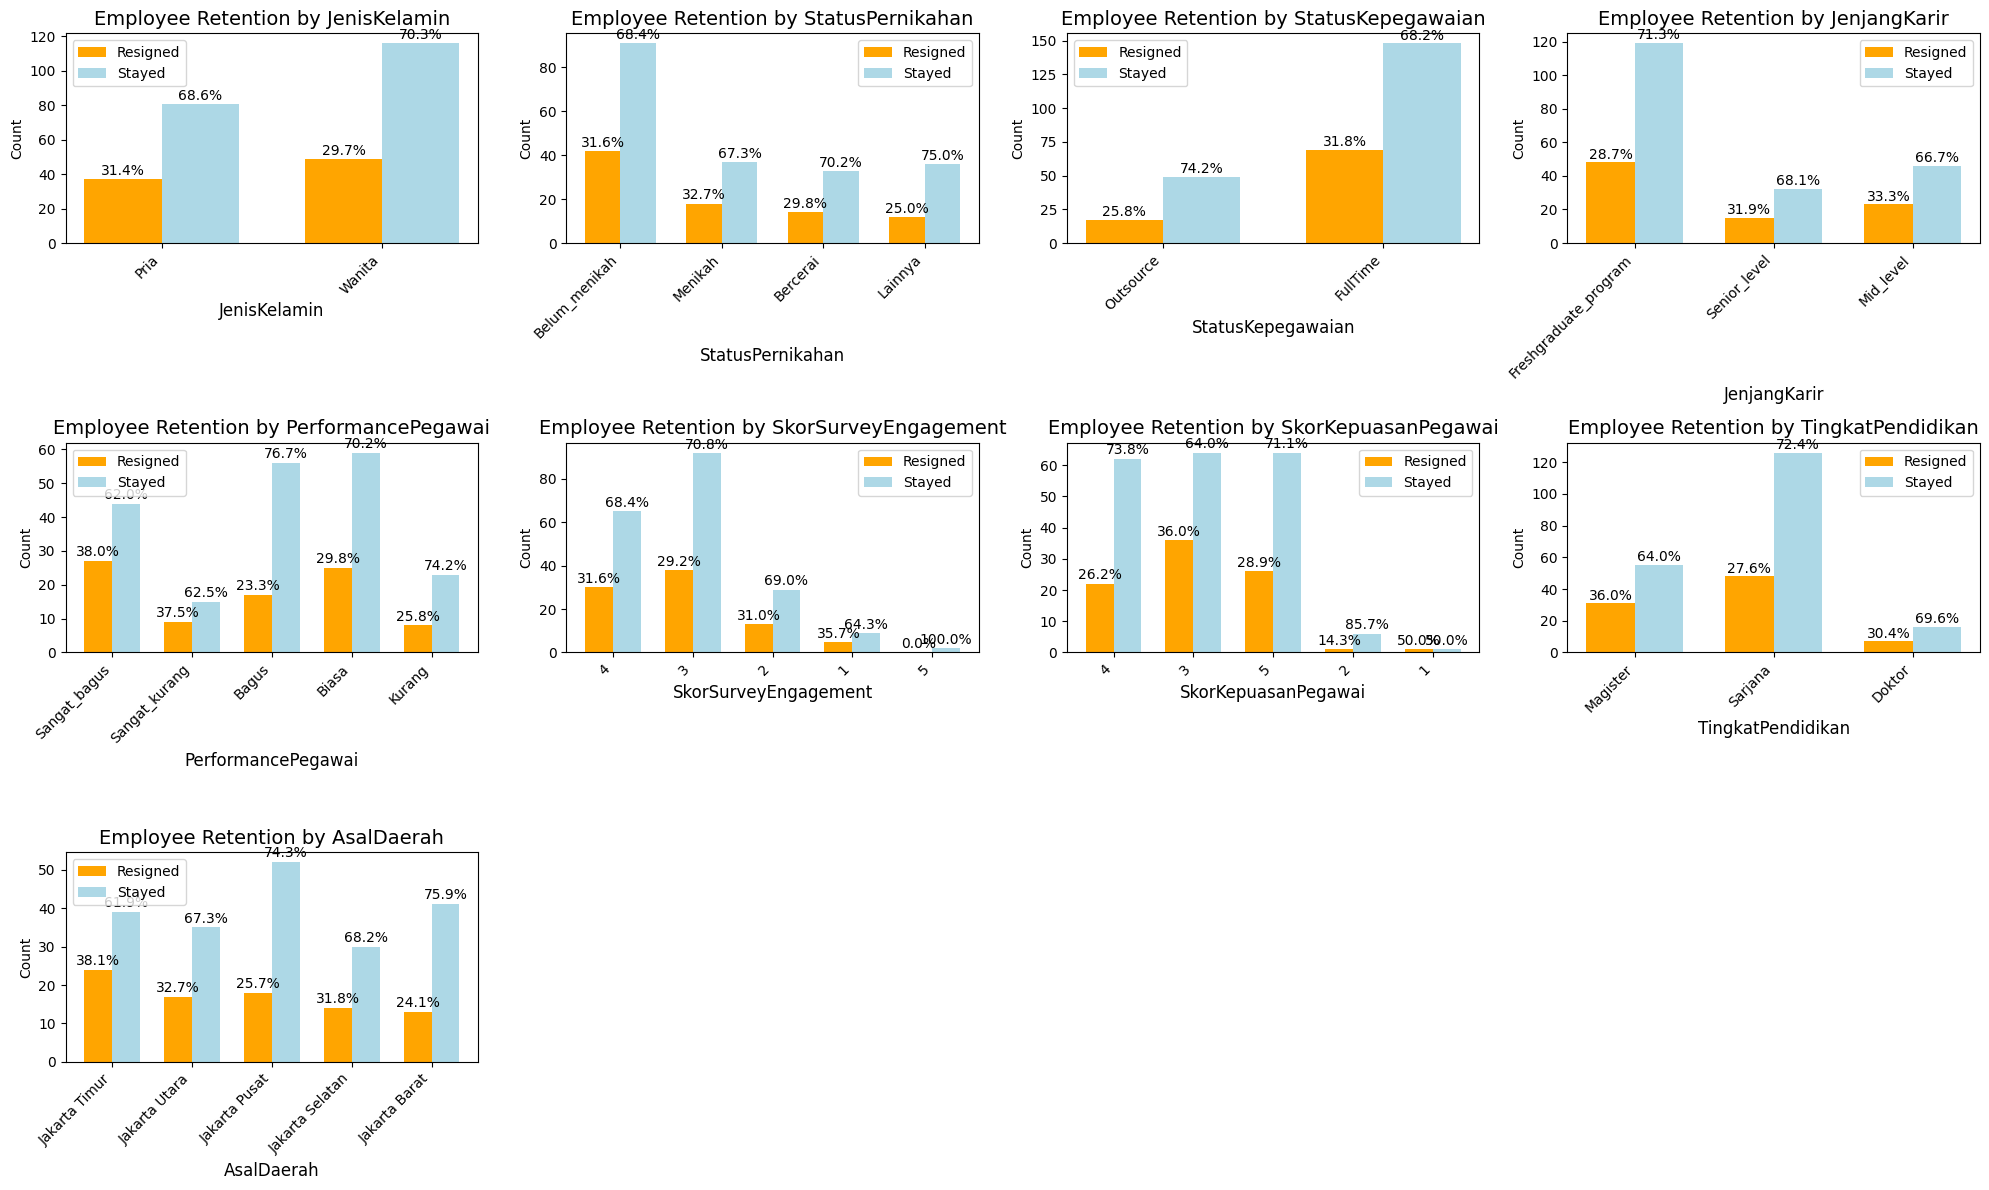

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for plotting grouped bar charts with count on y-axis and percentage labels
def plot_grouped_bar_chart(ax, feature_values, feature_name):
    # Initialize counts for stayed and resigned employees
    resigned_counts = []
    stayed_counts = []
    total_counts = []

    # Iterate over each feature value
    for value in feature_values:
        # Subset data for current feature value
        subset_data = df_cleaned[df_cleaned[feature_name] == value]
        total_count = subset_data.shape[0]
        
        # Count stayed and resigned employees
        resigned_count = subset_data[subset_data['Resigned'] == True].shape[0]
        stayed_count = subset_data[subset_data['Resigned'] == False].shape[0]
        
        # Append counts to lists
        resigned_counts.append(resigned_count)
        stayed_counts.append(stayed_count)
        total_counts.append(total_count)

    # Initialize index for x-axis
    index = np.arange(len(feature_values))
    bar_width = 0.35

    # Plot grouped bar chart
    bar1 = ax.bar(index, resigned_counts, bar_width, label='Resigned', color='orange')
    bar2 = ax.bar(index + bar_width, stayed_counts, bar_width, label='Stayed', color='lightblue')

    # Add annotations for percentage
    for i, (resigned_count, stayed_count, total_count) in enumerate(zip(resigned_counts, stayed_counts, total_counts)):
        resigned_percentage = (resigned_count / total_count) * 100 if total_count > 0 else 0
        stayed_percentage = (stayed_count / total_count) * 100 if total_count > 0 else 0
        
        ax.text(i, resigned_count + 0.5, f'{resigned_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
        ax.text(i + bar_width, stayed_count + 0.5, f'{stayed_percentage:.1f}%', ha='center', va='bottom', fontsize=10)

    # Add labels, title, and legend
    ax.set_xlabel(feature_name, fontsize=12)
    ax.set_ylabel('Count')
    ax.set_title(f'Employee Retention by {feature_name}', fontsize=14)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(feature_values, rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
    ax.legend()

# Initialize figure and axes for 8 subplots (adjust number of rows and columns as needed)
features_to_plot = [
    'JenisKelamin', 
    'StatusPernikahan', 
    'StatusKepegawaian', 
    'JenjangKarir',
    'PerformancePegawai', 
    'SkorSurveyEngagement', 
    'SkorKepuasanPegawai', 
    'TingkatPendidikan',
    'AsalDaerah'
]

num_features = len(features_to_plot)
num_cols = 4  # Define the number of columns
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each grouped bar chart into its respective subplot
for ax, feature in zip(axes, features_to_plot):
    plot_grouped_bar_chart(ax, df_cleaned[feature].unique(), feature)

# Hide any unused subplots
for ax in axes[num_features:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/232067187.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Resigned', y=feature, data=df_cleaned, ax=axes[i], jitter=True, palette='Set2')
/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/232067187.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Resigned', y=feature, data=df_cleaned, ax=axes[i], jitter=True, palette='Set2')
/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_5750/232067187.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stri

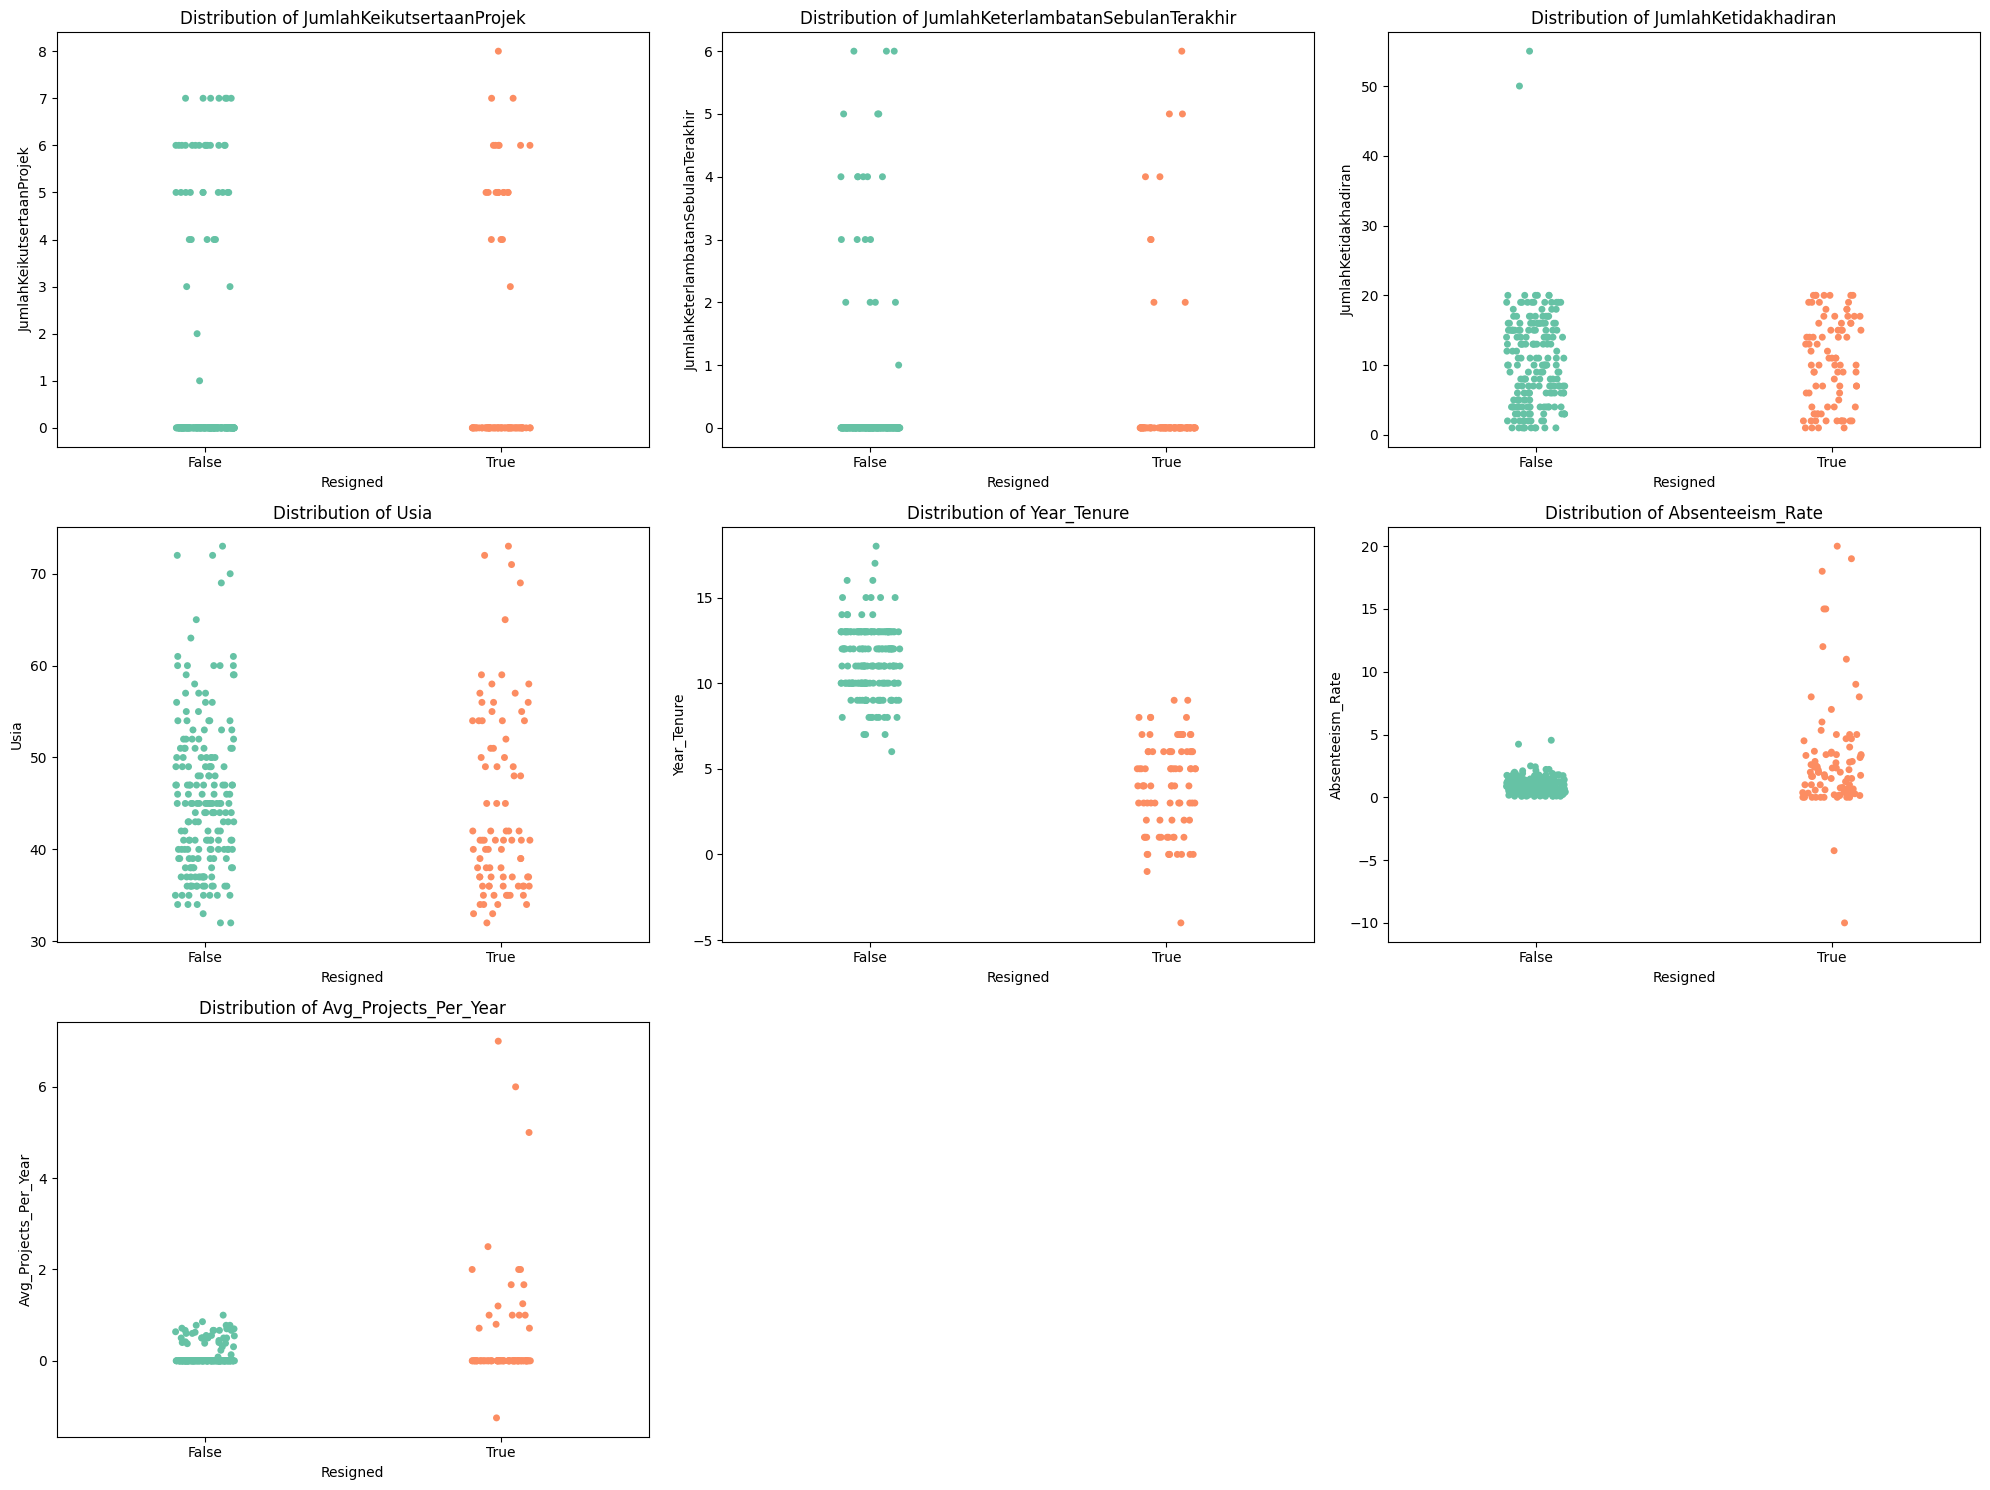

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# List of features for the strip plot
features = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 
            'Usia', 'Year_Tenure', 'Absenteeism_Rate', 'Avg_Projects_Per_Year']

# Determine the number of rows and columns based on the number of features
num_features = len(features)
num_cols = 3  # You can set this to any number of columns you prefer
num_rows = math.ceil(num_features / num_cols)

# Set up the figure with the appropriate number of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Dynamically adjust the figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each strip plot for the corresponding feature
for i, feature in enumerate(features):
    sns.stripplot(x='Resigned', y=feature, data=df_cleaned, ax=axes[i], jitter=True, palette='Set2')
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Label Encoding


In [34]:
# Define the mapping for 'PerformancePegawai'
performance_mapping = {
    'Sangat_kurang': 1,
    'Kurang': 2,
    'Biasa': 3,
    'Bagus': 4,
    'Sangat_bagus': 5
}

# Apply the mapping to the 'PerformancePegawai' column
df_cleaned['PerformancePegawai_Encoded'] = df_cleaned['PerformancePegawai'].map(performance_mapping)

# Verify the result
display(df_cleaned[['PerformancePegawai', 'PerformancePegawai_Encoded']].sample(5))


PerformancePegawai  PerformancePegawai_Encoded
13               Bagus                           4
86        Sangat_bagus                           5
224              Biasa                           3
73       Sangat_kurang                           1
176              Biasa                           3

In [35]:
# Define the mapping for each category
level_mapping = {
    'Freshgraduate_program': 1,
    'Mid_level': 2,
    'Senior_level': 3
}

# Assuming your DataFrame has a column called 'CareerLevel' that contains these values
df_cleaned['JenjangKarir_Encoded'] = df_cleaned['JenjangKarir'].map(level_mapping)

# Display the DataFrame with the new encoded column
display(df_cleaned[['JenjangKarir', 'JenjangKarir_Encoded']].sample(5))


JenjangKarir  JenjangKarir_Encoded
12   Freshgraduate_program                     1
174  Freshgraduate_program                     1
113  Freshgraduate_program                     1
14   Freshgraduate_program                     1
222              Mid_level                     2

In [36]:
# Define the mapping for each category
pendidikan_mapping = {
    'Sarjana': 1,
    'Magister': 2,
    'Doktor': 3
}

# Assuming your DataFrame has a column called 'TingkatPendidikan' that contains these values
df_cleaned['TingkatPendidikan_Encoded'] = df_cleaned['TingkatPendidikan'].map(pendidikan_mapping)

# Display the DataFrame with the new encoded column
display(df_cleaned[['TingkatPendidikan', 'TingkatPendidikan_Encoded']].sample(5))


TingkatPendidikan  TingkatPendidikan_Encoded
223           Sarjana                          1
193          Magister                          2
71           Magister                          2
21            Sarjana                          1
204           Sarjana                          1

# OneHot Encoding

In [33]:
# One-hot encode 'StatusKepegawaian', 'JenjangKarir', and 'TingkatPendidikan' columns
df_encoded = pd.get_dummies(df_cleaned, columns=['StatusKepegawaian', 'Job_Category'], drop_first=False)

# Update the df_cleaned with the one-hot encoded features
df_cleaned = df_encoded

# Display the updated df_cleaned
df_cleaned.sample(5)


StatusPernikahan JenisKelamin                      Pekerjaan  \
282    Belum_menikah       Wanita                  Data Engineer   
128    Belum_menikah         Pria    Software Engineer (Android)   
185    Belum_menikah       Wanita   Software Engineer (Back End)   
79           Lainnya       Wanita   Software Engineer (Back End)   
199          Menikah         Pria  Software Engineer (Front End)   

              JenjangKarir PerformancePegawai       AsalDaerah HiringPlatform  \
282              Mid_level              Bagus    Jakarta Pusat  Google_Search   
128              Mid_level              Biasa  Jakarta Selatan  CareerBuilder   
185  Freshgraduate_program             Kurang    Jakarta Pusat         Indeed   
79   Freshgraduate_program              Bagus    Jakarta Utara       LinkedIn   
199  Freshgraduate_program              Bagus    Jakarta Timur         Indeed   

     SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
282                     2                    5                          0   
128                     4                    3                          0   
185                     4                    3                          0   
79                      3                    4                          0   
199                     3                    3                          6   

     ...  Absenteeism_Rate  PerformancePegawai_Encoded JenjangKarir_Encoded  \
282  ...          1.230769                           4                    2   
128  ...          0.400000                           3                    2   
185  ...          0.090909                           2                    1   
79   ...          0.333333                           4                    1   
199  ...          0.166667                           4                    1   

    TingkatPendidikan_Encoded StatusKepegawaian_FullTime  \
282                         1                       True   
128                         3                      False   
185                         2                      False   
79                          1                       True   
199                         1                       True   

    StatusKepegawaian_Outsource Job_Category_Data/Analytics  \
282                       False                        True   
128                        True                       False   
185                        True                       False   
79                        False                       False   
199                       False                       False   

    Job_Category_Design/UX  Job_Category_Engineering/Development  \
282                  False                                 False   
128                  False                                  True   
185                  False                                  True   
79                   False                                  True   
199                  False                                  True   

     Job_Category_Product Management  
282                            False  
128                            False  
185                            False  
79                             False  
199                            False  

[5 rows x 32 columns]

# Feature Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Correcting the hyperparameter assignment
model_dt_best = DecisionTreeClassifier(
    ccp_alpha=0.0,
    class_weight=None, 
    criterion='entropy', 
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_samples_leaf=2, 
    min_samples_split=5, 
    min_weight_fraction_leaf=0.0, 
    random_state=42, 
    splitter='best'
)

# Fitting the model
model_dt_best.fit(X_train, y_train)

# Evaluate the model
eval_classification(model_dt_best)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.97
Precision (Test Set): 0.57
Precision (Train Set): 0.99
Recall (Test Set): 1.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.72
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.86
roc_auc (train-proba): 1.00
recall (crossval train): 0.9156862745098039
recall (crossval test): 0.8947712418300654
roc_auc (crossval train): 0.9956846415481666
roc_auc (crossval test): 0.9315564772917714
True Positives (TP): 77
False Positives (FP): 15
True Negatives (TN): 182
False Negatives (FN): 9


In [38]:
from sklearn.feature_selection import chi2

# Define the feature set
X = df_cleaned[[
'StatusKepegawaian_FullTime', 'StatusKepegawaian_Outsource'
]]

# Define the target variable
y = df_cleaned['Resigned']

# Compute chi-squared statistics
chi2_stats, p_values = chi2(X, y)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Statistic': chi2_stats,
    'P-value': p_values
})

# Sort the results by the Chi2 statistic
results_sorted = results.sort_values(by='Chi2 Statistic', ascending=False)

# Display the sorted results
display(results_sorted)

Feature  Chi2 Statistic   P-value
1  StatusKepegawaian_Outsource         0.66915  0.413348
0   StatusKepegawaian_FullTime         0.20352  0.651894

In [50]:
from sklearn.feature_selection import f_classif

X_columns = ['JenjangKarir_Encoded', 'TingkatPendidikan_Encoded', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
             'PerformancePegawai_Encoded', 'Usia', 'Year_Tenure', 'Absenteeism_Rate', 'Avg_Projects_Per_Year']

X = df_cleaned[X_columns]
y = df_cleaned['Resigned']

# Compute ANOVA F-value and p-values
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to display results
results = pd.DataFrame({'Feature': X_columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort the results by F-score in descending order
results_sorted_by_fscore = results.sort_values(by='F-Score', ascending=False)

# Print the sorted table
display(results_sorted_by_fscore)

Feature     F-Score       P-Value
6                 Year_Tenure  685.127792  2.495083e-77
7            Absenteeism_Rate   41.646204  4.776709e-10
8       Avg_Projects_Per_Year   12.579959  4.566869e-04
1   TingkatPendidikan_Encoded    0.966098  3.265008e-01
3         SkorKepuasanPegawai    0.699590  4.036321e-01
5                        Usia    0.620354  4.315795e-01
0        JenjangKarir_Encoded    0.346202  5.567435e-01
4  PerformancePegawai_Encoded    0.151208  6.976777e-01
2        SkorSurveyEngagement    0.077908  7.803577e-01

<Axes: >

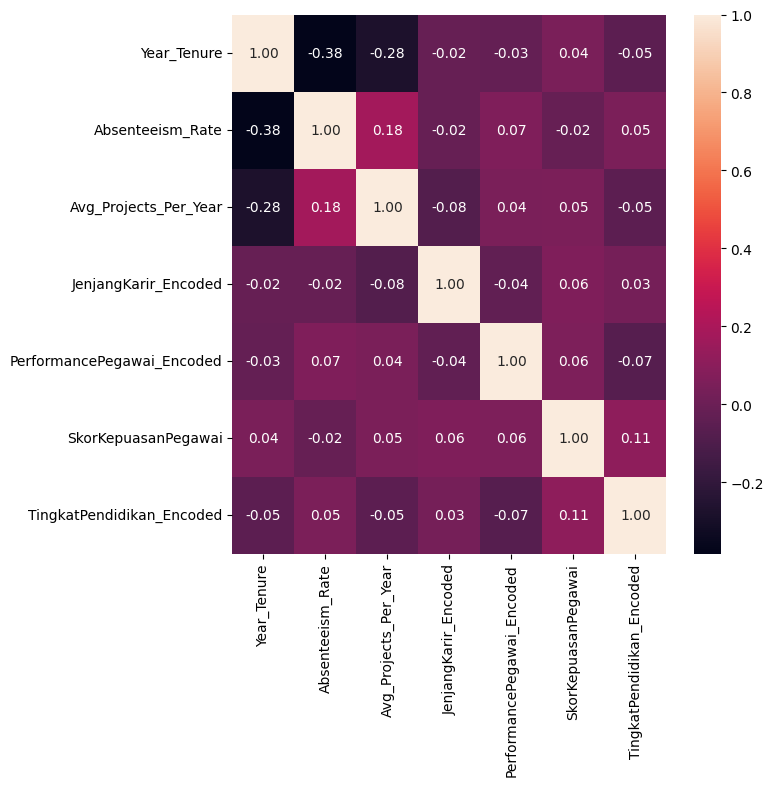

In [51]:
# Create heatmap to see correlation between selected numerical features
nums = ['Year_Tenure', 'Absenteeism_Rate', 'Avg_Projects_Per_Year', 'JenjangKarir_Encoded', 'PerformancePegawai_Encoded', 'SkorKepuasanPegawai', 'TingkatPendidikan_Encoded']

# Create heatmap to see corelation between numerical features
plt.figure(figsize=(7,7))
sns.heatmap(df_cleaned[nums].corr(), annot=True, fmt='.2f')

# Data Split and Resampling

In [52]:
from sklearn.model_selection import train_test_split

# Assign features and target variable

# Define the feature set based on the specified columns
X = df_cleaned[[ 
    'Year_Tenure',
    'Absenteeism_Rate',
    'Avg_Projects_Per_Year',
    'JenjangKarir_Encoded', 
    'TingkatPendidikan_Encoded',
    'PerformancePegawai_Encoded',
    'SkorKepuasanPegawai'
    ]]

y = df_cleaned['Resigned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(y.value_counts())

Resigned
False    197
True      86
Name: count, dtype: int64


In [53]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
Resigned
False    138
True     138
Name: count, dtype: int64


# Scaling and Creating an ML evaluation function

In [54]:
# Scaling data with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Display 
display(X_test[0], X_train[0])

array([ 0.33333333,  0.55614973,  0.08333333,  2.        ,  0.        ,
        0.        , -1.        ])

array([ 1.        , -0.46087488,  0.        ,  2.        ,  1.        ,
       -0.5       ,  0.        ])

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

def eval_classification(model):
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): ' + str(score['train_score'].mean()))
    print('roc_auc (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 1.00
Precision (Test Set): 0.65
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.79
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.88
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9065359477124183
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9277551533433886
True Positives (TP): 75
False Positives (FP): 8
True Negatives (TN): 189
False Negatives (FN): 11


In [57]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['sqrt', 'log2'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi RandomizedSearchCV
dt = DecisionTreeClassifier(random_state=42)
model_dt_random =  RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall', random_state=42)
model_dt_random.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt_random.predict(X_test)#Check performa dari model
eval_classification(model_dt_random)
show_best_hyperparameter(model_dt_random)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.97
Precision (Test Set): 0.57
Precision (Train Set): 0.99
Recall (Test Set): 1.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.72
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.86
roc_auc (train-proba): 1.00
recall (crossval train): 0.9797101449275363
recall (crossval test): 0.9882352941176471
roc_auc (crossval train): 0.9407695919826343
roc_auc (crossval test): 0.9228632478632479
True Positives (TP): 85
False Positives (FP): 32
True Negatives (TN): 165
False Negatives (FN): 1
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 61, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


# Learning Curve

min_impurity_decrease: 0.001; train recall: 1.0; test recall: 0.9615384615384616
min_impurity_decrease: 0.0030204081632653063; train recall: 1.0; test recall: 1.0
min_impurity_decrease: 0.0050408163265306125; train recall: 1.0; test recall: 1.0
min_impurity_decrease: 0.007061224489795919; train recall: 0.9855072463768116; test recall: 0.9615384615384616
min_impurity_decrease: 0.009081632653061226; train recall: 0.9492753623188406; test recall: 1.0
min_impurity_decrease: 0.011102040816326531; train recall: 0.0; test recall: 0.0
min_impurity_decrease: 0.013122448979591837; train recall: 0.9927536231884058; test recall: 1.0
min_impurity_decrease: 0.015142857142857145; train recall: 0.9927536231884058; test recall: 1.0
min_impurity_decrease: 0.01716326530612245; train recall: 0.0; test recall: 0.0
min_impurity_decrease: 0.019183673469387756; train recall: 0.9492753623188406; test recall: 1.0
min_impurity_decrease: 0.02120408163265306; train recall: 0.7898550724637681; test recall: 1.0
min_

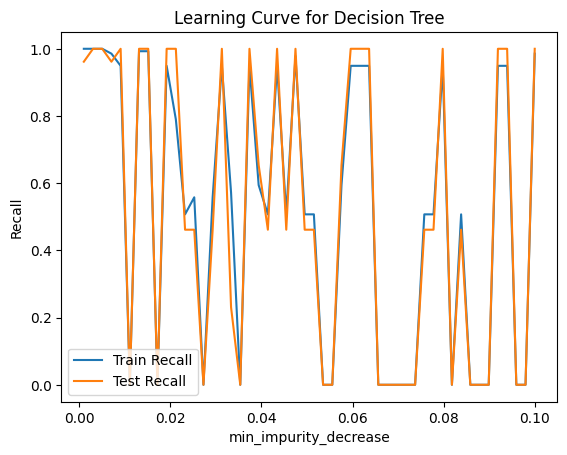

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import numpy as np
import matplotlib.pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    
    for alpha in param_values:
        # Create and fit the model with the current parameter value
        model = DecisionTreeClassifier(min_impurity_decrease=alpha, max_features='sqrt', splitter='best', criterion='entropy')
        model.fit(X_train, y_train)

        # Evaluation on training data
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # Evaluation on testing data
        y_pred_test = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred_test)
        test_scores.append(test_recall)

        print(f'min_impurity_decrease: {alpha}; train recall: {train_recall}; test recall: {test_recall}')

    # Plot the learning curve
    plt.plot(param_values, train_scores, label='Train Recall')
    plt.plot(param_values, test_scores, label='Test Recall')
    plt.xlabel('min_impurity_decrease')
    plt.ylabel('Recall')
    plt.title('Learning Curve for Decision Tree')
    plt.legend()
    plt.show()

# Example values for min_impurity_decrease
param_values = np.linspace(0.001, 0.1, 50)  # Adjust the range as needed

draw_learning_curve(param_values)


ccp_alpha: 0.001; train: 1.0; test: 1.0
ccp_alpha: 0.0011836734693877551; train: 1.0; test: 1.0
ccp_alpha: 0.0013673469387755102; train: 1.0; test: 1.0
ccp_alpha: 0.0015510204081632655; train: 1.0; test: 0.8846153846153846
ccp_alpha: 0.0017346938775510204; train: 1.0; test: 0.9615384615384616
ccp_alpha: 0.0019183673469387757; train: 1.0; test: 0.9615384615384616
ccp_alpha: 0.002102040816326531; train: 1.0; test: 1.0
ccp_alpha: 0.002285714285714286; train: 1.0; test: 0.8846153846153846
ccp_alpha: 0.0024693877551020408; train: 1.0; test: 0.9615384615384616
ccp_alpha: 0.002653061224489796; train: 1.0; test: 1.0
ccp_alpha: 0.0028367346938775514; train: 1.0; test: 0.7692307692307693
ccp_alpha: 0.0030204081632653063; train: 1.0; test: 1.0
ccp_alpha: 0.0032040816326530616; train: 1.0; test: 0.9615384615384616
ccp_alpha: 0.0033877551020408164; train: 1.0; test: 0.9230769230769231
ccp_alpha: 0.0035714285714285718; train: 1.0; test: 1.0
ccp_alpha: 0.0037551020408163266; train: 1.0; test: 0.96153

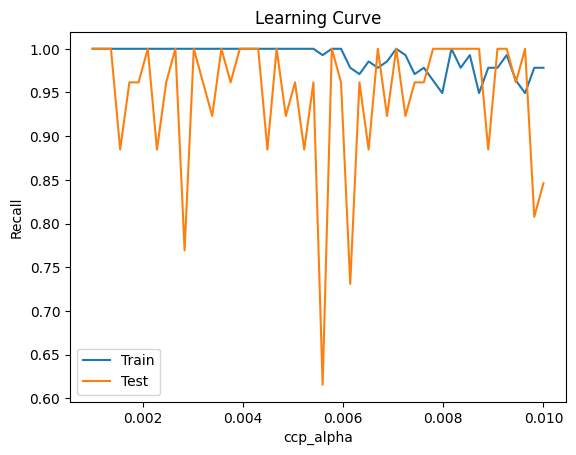

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    
    for alpha in param_values:
        model = DecisionTreeClassifier(ccp_alpha=alpha, max_features= 'sqrt', splitter= 'best', criterion= 'entropy')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('ccp_alpha: ' + str(alpha) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('ccp_alpha')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Example values for ccp_alpha
param_values = np.linspace(0.001, 0.01, 50)  # Adjust the range as needed

draw_learning_curve(param_values)


max_depth: 3; train: 0.9855072463768116; test: 1.0
max_depth: 4; train: 0.8913043478260869; test: 0.8461538461538461
max_depth: 5; train: 0.9855072463768116; test: 1.0
max_depth: 7; train: 0.9855072463768116; test: 1.0
max_depth: 8; train: 0.9927536231884058; test: 1.0
max_depth: 10; train: 1.0; test: 1.0
max_depth: 11; train: 1.0; test: 0.8076923076923077
max_depth: 12; train: 1.0; test: 1.0
max_depth: 14; train: 1.0; test: 1.0
max_depth: 15; train: 1.0; test: 0.8461538461538461
max_depth: 17; train: 1.0; test: 1.0
max_depth: 18; train: 1.0; test: 1.0
max_depth: 19; train: 1.0; test: 1.0
max_depth: 21; train: 1.0; test: 0.9615384615384616
max_depth: 22; train: 1.0; test: 1.0
max_depth: 24; train: 1.0; test: 1.0
max_depth: 25; train: 1.0; test: 0.9615384615384616
max_depth: 26; train: 1.0; test: 0.9615384615384616
max_depth: 28; train: 1.0; test: 1.0
max_depth: 29; train: 1.0; test: 1.0
max_depth: 31; train: 1.0; test: 0.8846153846153846
max_depth: 32; train: 1.0; test: 0.8846153846153

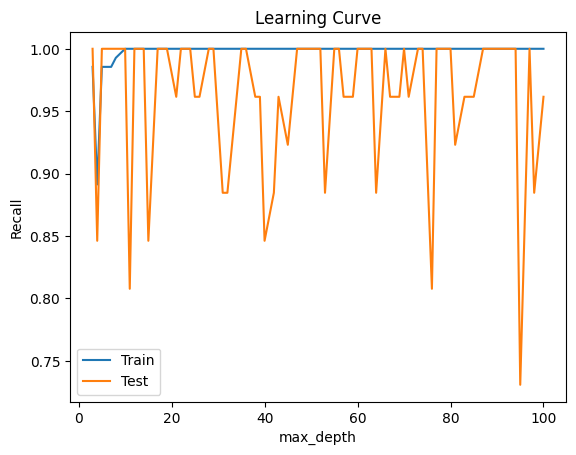

In [60]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i, max_features= 'sqrt', splitter= 'best', criterion= 'entropy')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('max_depth: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(3, 100, 70)]
draw_learning_curve(param_values)

min_samples_leaf: 2; train: 0.9782608695652174; test: 1.0
min_samples_leaf: 2; train: 0.9565217391304348; test: 0.8076923076923077
min_samples_leaf: 3; train: 0.9710144927536232; test: 1.0
min_samples_leaf: 4; train: 0.9202898550724637; test: 0.8076923076923077
min_samples_leaf: 5; train: 0.9565217391304348; test: 0.9615384615384616
min_samples_leaf: 6; train: 0.9927536231884058; test: 1.0
min_samples_leaf: 7; train: 0.9782608695652174; test: 1.0
min_samples_leaf: 8; train: 0.9782608695652174; test: 1.0
min_samples_leaf: 9; train: 0.9855072463768116; test: 1.0
min_samples_leaf: 10; train: 0.8478260869565217; test: 0.9230769230769231
min_samples_leaf: 11; train: 0.9855072463768116; test: 1.0
min_samples_leaf: 12; train: 0.8985507246376812; test: 0.8846153846153846
min_samples_leaf: 13; train: 0.9492753623188406; test: 1.0
min_samples_leaf: 14; train: 0.8333333333333334; test: 0.8846153846153846
min_samples_leaf: 15; train: 0.9855072463768116; test: 1.0
min_samples_leaf: 16; train: 0.985

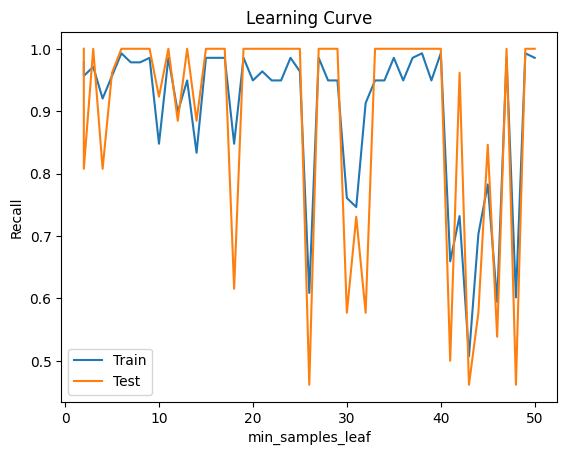

In [61]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i, max_features= 'sqrt', splitter= 'best', criterion= 'entropy')
        model.fit(X_train, y_train)
        
        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('min_samples_leaf: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 50, 50)]
draw_learning_curve(param_values)

min_samples_split: 2; train: 1.0; test: 1.0
min_samples_split: 2; train: 1.0; test: 0.9615384615384616
min_samples_split: 3; train: 0.9637681159420289; test: 0.9615384615384616
min_samples_split: 4; train: 0.9855072463768116; test: 0.8846153846153846
min_samples_split: 5; train: 0.9782608695652174; test: 0.8076923076923077
min_samples_split: 5; train: 0.9782608695652174; test: 1.0
min_samples_split: 6; train: 0.9710144927536232; test: 1.0
min_samples_split: 7; train: 0.9855072463768116; test: 0.9615384615384616
min_samples_split: 8; train: 0.9565217391304348; test: 0.8846153846153846
min_samples_split: 8; train: 0.9710144927536232; test: 0.9615384615384616
min_samples_split: 9; train: 1.0; test: 1.0
min_samples_split: 10; train: 0.9855072463768116; test: 0.9615384615384616
min_samples_split: 11; train: 0.9710144927536232; test: 0.8076923076923077
min_samples_split: 12; train: 0.9202898550724637; test: 1.0
min_samples_split: 12; train: 0.9855072463768116; test: 1.0
min_samples_split: 13

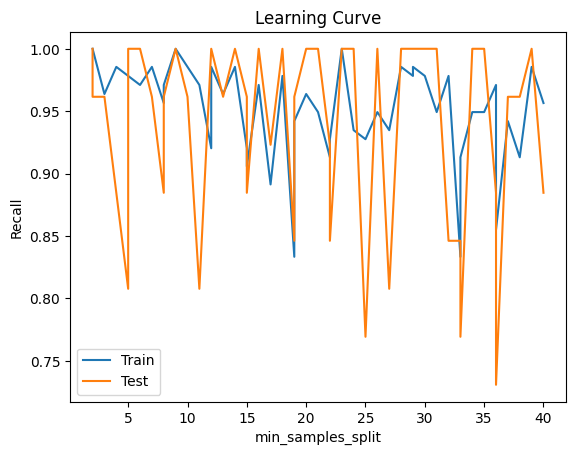

In [62]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    for i in param_values:
        model = DecisionTreeClassifier(min_samples_split=i, max_features= 'sqrt', splitter= 'best', criterion= 'entropy')
        model.fit(X_train, y_train)
        
        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('min_samples_split: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    
param_values = [int(x) for x in np.linspace(2, 40, 50)]
draw_learning_curve(param_values)

# Tuned Model

In [63]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters in list format
min_impurity_decrease = [0.019183673469387756, 0.011102040816326531]
ccp_alpha = [0.03736734693877551, 0.011102040816326531, 0.013122448979591837]
max_depth = [2, 74, 77]
min_samples_leaf = [3, 12, 11]
min_samples_split = [20, 34]
max_features = ['sqrt', 'log2']  # Number of features to consider at every split
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

# Dictionary of hyperparameters
hyperparameters = dict(min_impurity_decrease=min_impurity_decrease,
                       ccp_alpha=ccp_alpha,
                       max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter)

# Initialize GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
model_dt_grid = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall', n_jobs=-1)

# Fit the model
model_dt_grid.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt_grid.predict(X_test)

# Check performance from the model
eval_classification(model_dt_grid)
show_best_hyperparameter(model_dt_grid)

Accuracy (Test Set): 0.68
Accuracy (Train Set): 0.76
Precision (Test Set): 0.46
Precision (Train Set): 0.99
Recall (Test Set): 0.23
Recall (Train Set): 0.53
F1-Score (Test Set): 0.31
F1-Score (Train Set): 0.69
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.81
recall (crossval train): 0.7120204603580562
recall (crossval test): 0.7196078431372549
roc_auc (crossval train): 0.9754788101962791
roc_auc (crossval test): 0.9763499245852187
True Positives (TP): 62
False Positives (FP): 0
True Negatives (TN): 197
False Negatives (FN): 24
{'ccp_alpha': 0.03736734693877551, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 74, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.011102040816326531, 'min_samples_leaf': 3, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


In [64]:
from sklearn.tree import DecisionTreeClassifier

# Correcting the hyperparameter assignment
model_dt_best = DecisionTreeClassifier(
    ccp_alpha=0.0,
    class_weight=None, 
    criterion='entropy', 
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_samples_leaf=2, 
    min_samples_split=5, 
    min_weight_fraction_leaf=0.0, 
    random_state=42, 
    splitter='best'
)

# Fitting the model
model_dt_best.fit(X_train, y_train)

# Evaluate the model
eval_classification(model_dt_best)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.97
Precision (Test Set): 0.57
Precision (Train Set): 0.99
Recall (Test Set): 1.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.72
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.86
roc_auc (train-proba): 1.00
recall (crossval train): 0.9156862745098039
recall (crossval test): 0.8947712418300654
roc_auc (crossval train): 0.9956846415481666
roc_auc (crossval test): 0.9315564772917714
True Positives (TP): 77
False Positives (FP): 15
True Negatives (TN): 182
False Negatives (FN): 9


# Feature Importance and Shap

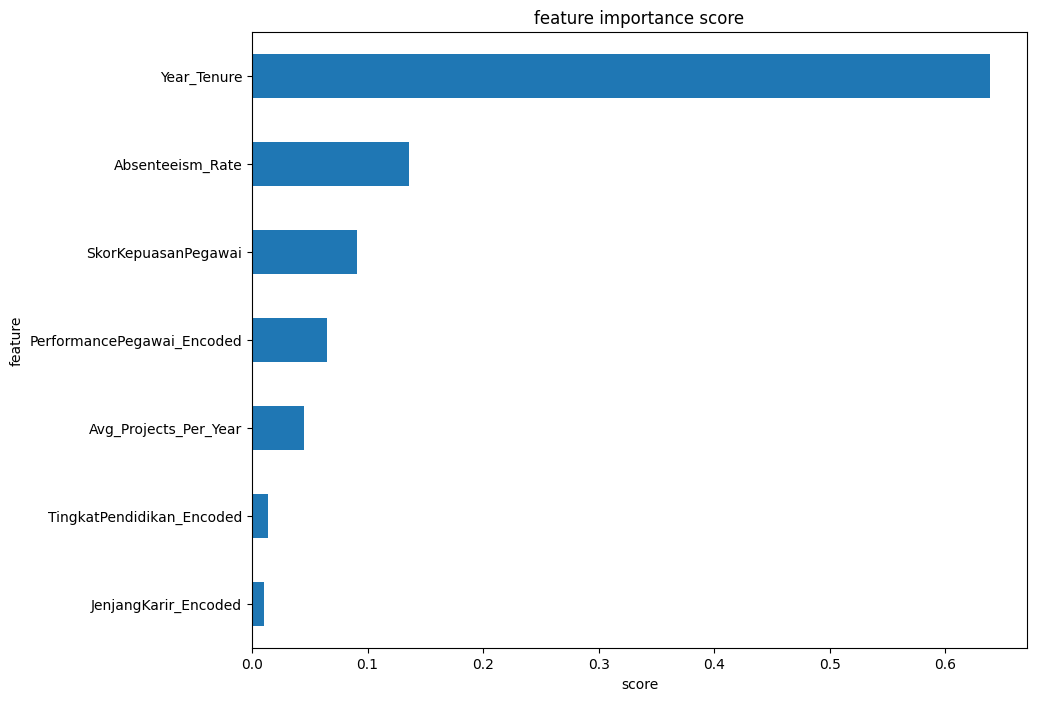

In [65]:
show_feature_importance(model_dt_best)

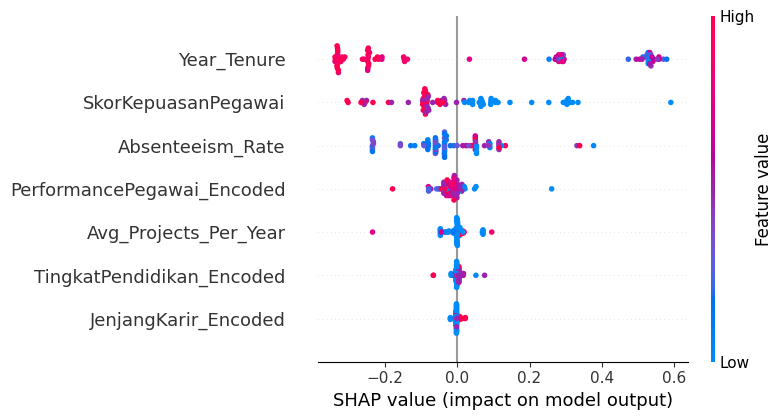

In [66]:
import shap

# Use SHAP TreeExplainer for Decision Tree models
explainer = shap.TreeExplainer(model_dt_best)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values [:, :, 1], X_test, feature_names=X.columns) #


In [67]:
shap_values[3]

array([[-0.52764712,  0.52764712],
       [-0.05035944,  0.05035944],
       [-0.00095396,  0.00095396],
       [ 0.00176601, -0.00176601],
       [ 0.00142495, -0.00142495],
       [-0.00227153,  0.00227153],
       [ 0.0780411 , -0.0780411 ]])

# XG Boost


In [68]:
from xgboost import XGBClassifier
# Initialize classifier
xg = XGBClassifier()

# Fit the model
xg.fit(X_train, y_train)

# Evaluate the model
eval_classification(xg)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 1.00
Precision (Test Set): 0.70
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.83
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
recall (crossval train): 0.9970588235294118
recall (crossval test): 0.9300653594771242
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9865108094519858
True Positives (TP): 80
False Positives (FP): 5
True Negatives (TN): 192
False Negatives (FN): 6


In [69]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=4, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)
show_best_hyperparameter(xg_tuned)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.97
Precision (Test Set): 0.67
Precision (Train Set): 0.96
Recall (Test Set): 1.00
Recall (Train Set): 0.98
F1-Score (Test Set): 0.80
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
recall (crossval train): 0.9331202046035806
recall (crossval test): 0.9294117647058824
roc_auc (crossval train): 0.9885342199199807
roc_auc (crossval test): 0.9703150661974191
True Positives (TP): 80
False Positives (FP): 4
True Negatives (TN): 193
False Negatives (FN): 6
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.4, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.7000000000000001, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 

In [70]:
import numpy as np
from xgboost import XGBClassifier

# Correcting the hyperparameters assignment
hyperparameters = {
    'objective': 'binary:logistic',
    'colsample_bytree': 0.4,
    'max_depth': 100,
    'min_child_weight': 4,
    'gamma': 0.7000000000000001,
    'tree_method': 'auto',
    'eta': 0.7474747474747475,
    'lambda': 0.7000000000000001,
    'alpha': 0.9
}

# Initialize the XGBClassifier with the specified hyperparameters
xg_best = XGBClassifier(**hyperparameters, random_state=42)

# Fit the model
xg_best.fit(X_train, y_train)

# Evaluate the model
eval_classification(xg_best)


Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.97
Precision (Test Set): 0.67
Precision (Train Set): 0.96
Recall (Test Set): 1.00
Recall (Train Set): 0.98
F1-Score (Test Set): 0.80
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
recall (crossval train): 0.9331202046035806
recall (crossval test): 0.9294117647058824
roc_auc (crossval train): 0.9906598744191843
roc_auc (crossval test): 0.9834560918384447
True Positives (TP): 80
False Positives (FP): 4
True Negatives (TN): 193
False Negatives (FN): 6


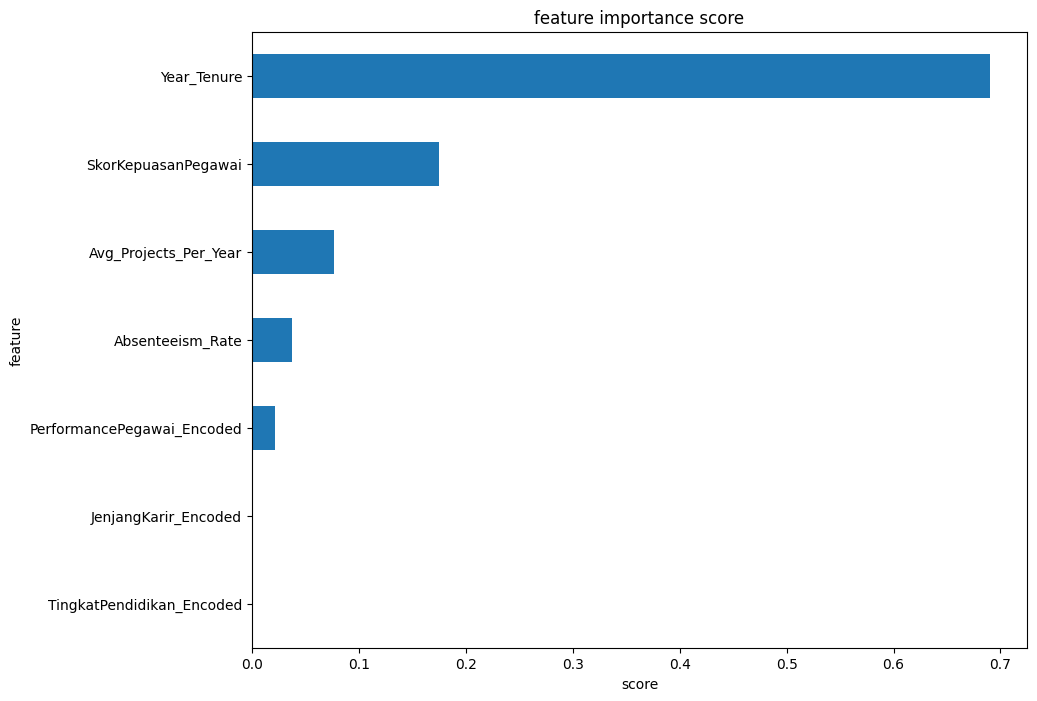

In [71]:
show_feature_importance(xg_best)

# K Nearest Neighbour

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Evaluate the model
eval_classification(knn)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.97
Precision (Test Set): 0.68
Precision (Train Set): 0.98
Recall (Test Set): 1.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.81
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.99
recall (crossval train): 0.9215260017050297
recall (crossval test): 0.9176470588235295
roc_auc (crossval train): 0.9951372428390431
roc_auc (crossval test): 0.980666163901458
True Positives (TP): 79
False Positives (FP): 2
True Negatives (TN): 195
False Negatives (FN): 7


Using 276 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/85 [00:00<?, ?it/s]

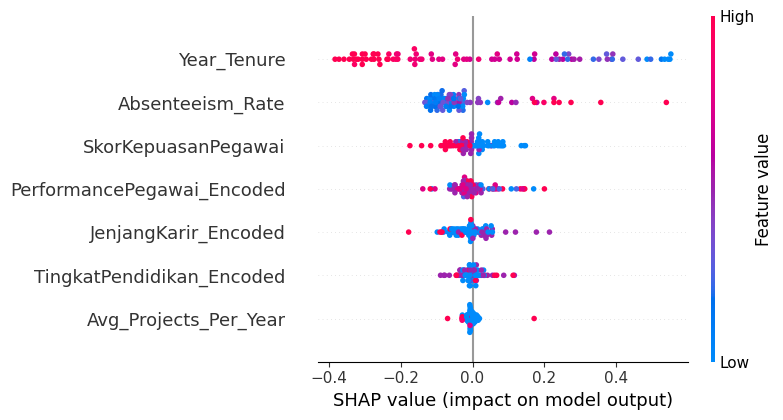

In [73]:
# Use SHAP's KernelExplainer to explain the KNN model
explainer = shap.KernelExplainer(knn.predict_proba, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X.columns)

In [74]:
shap_values[0]

array([[ 0.21346963, -0.21346963],
       [ 0.03807108, -0.03807108],
       [ 0.00447205, -0.00447205],
       [ 0.17775707, -0.17775707],
       [ 0.02558316, -0.02558316],
       [ 0.06360248, -0.06360248],
       [-0.0309265 ,  0.0309265 ]])

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Fit Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 1.00
Precision (Test Set): 0.67
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.80
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9294117647058824
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9847184514831573
True Positives (TP): 80
False Positives (FP): 4
True Negatives (TN): 193
False Negatives (FN): 6


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix
from scipy.stats import randint

# Define the classifier
rf = RandomForestClassifier()

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 301),        # Randomly sample number of trees between 100 and 300
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),      # Randomly sample min samples split between 2 and 10
    'min_samples_leaf': randint(1, 10),        # Randomly sample min samples leaf between 1 and 4
}

# Define scoring metric (e.g., recall)
scorer = make_scorer(recall_score)

# Initialize RandomizedSearchCV
random_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, 
                                    cv=5, scoring=scorer, verbose=1, n_jobs=-1, random_state=42)

# Perform randomized search
random_rf.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(random_rf)
show_best_hyperparameter(random_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.98
Precision (Test Set): 0.62
Precision (Train Set): 0.97
Recall (Test Set): 1.00
Recall (Train Set): 0.99
F1-Score (Test Set): 0.76
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
recall (crossval train): 0.9331202046035806
recall (crossval test): 0.9294117647058824
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
hyperparameters = {
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'criterion': 'gini',
    'max_depth': 20,
    'min_samples_leaf': 3,
    'min_samples_split': 9,
    'n_estimators': 288,
    'random_state': 42
}

# Fit Model Random Forest
rf_best = RandomForestClassifier(**hyperparameters)  # Use ** to unpack the dictionary
rf_best.fit(X_train, y_train)

# Evaluate classification
eval_classification(rf_best)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.97
Precision (Test Set): 0.70
Precision (Train Set): 0.96
Recall (Test Set): 1.00
Recall (Train Set): 0.99
F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval train): 0.9301790281329924
recall (crossval test): 0.9294117647058824
roc_auc (crossval train): 0.9974558567664961
roc_auc (crossval test): 0.988251215015921
True Positives (TP): 80
False Positives (FP): 5
True Negatives (TN): 192
False Negatives (FN): 6


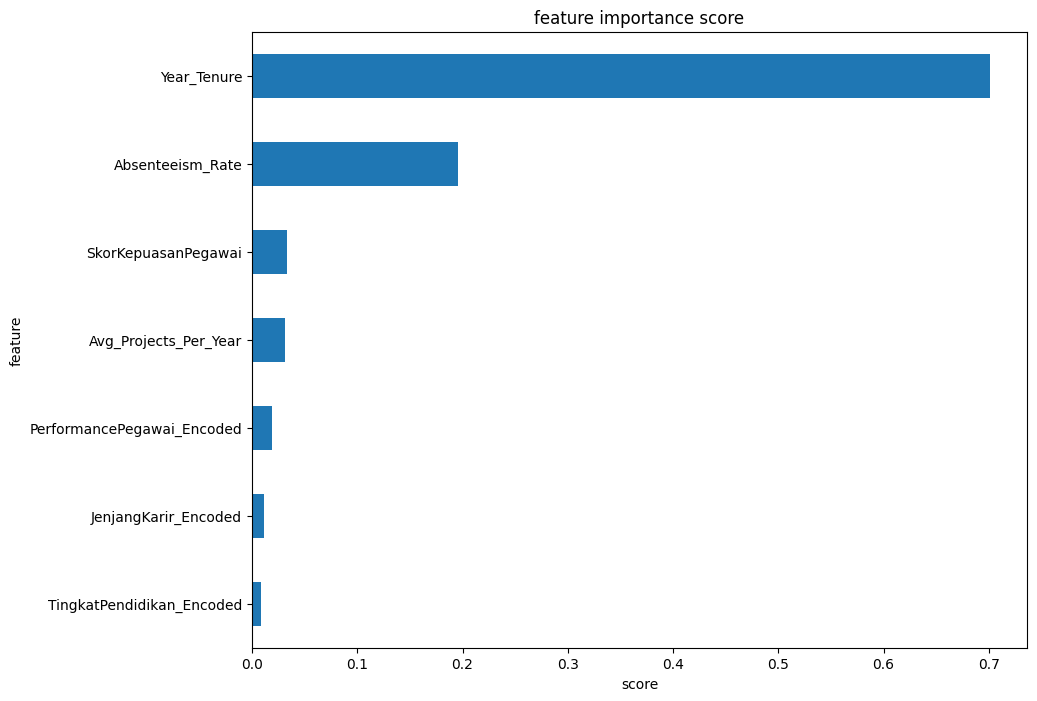

In [78]:
show_feature_importance(rf_best)

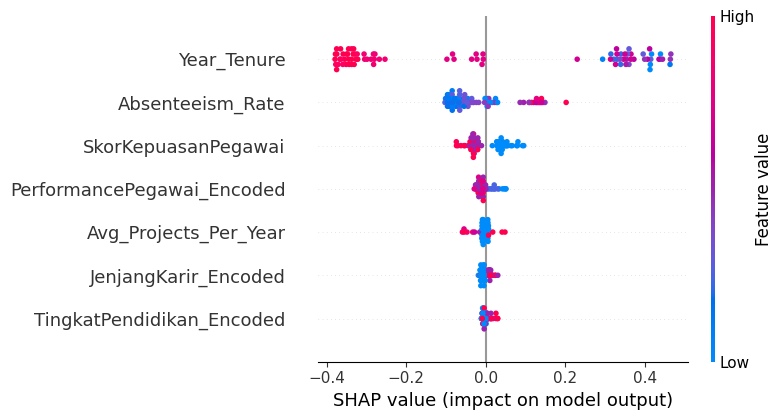

In [79]:
import shap

# Use SHAP TreeExplainer for Decision Tree models
explainer = shap.TreeExplainer(rf_best)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values [:, :, 1], X_test, feature_names=X.columns) #


NameError: name 'tree' is not defined

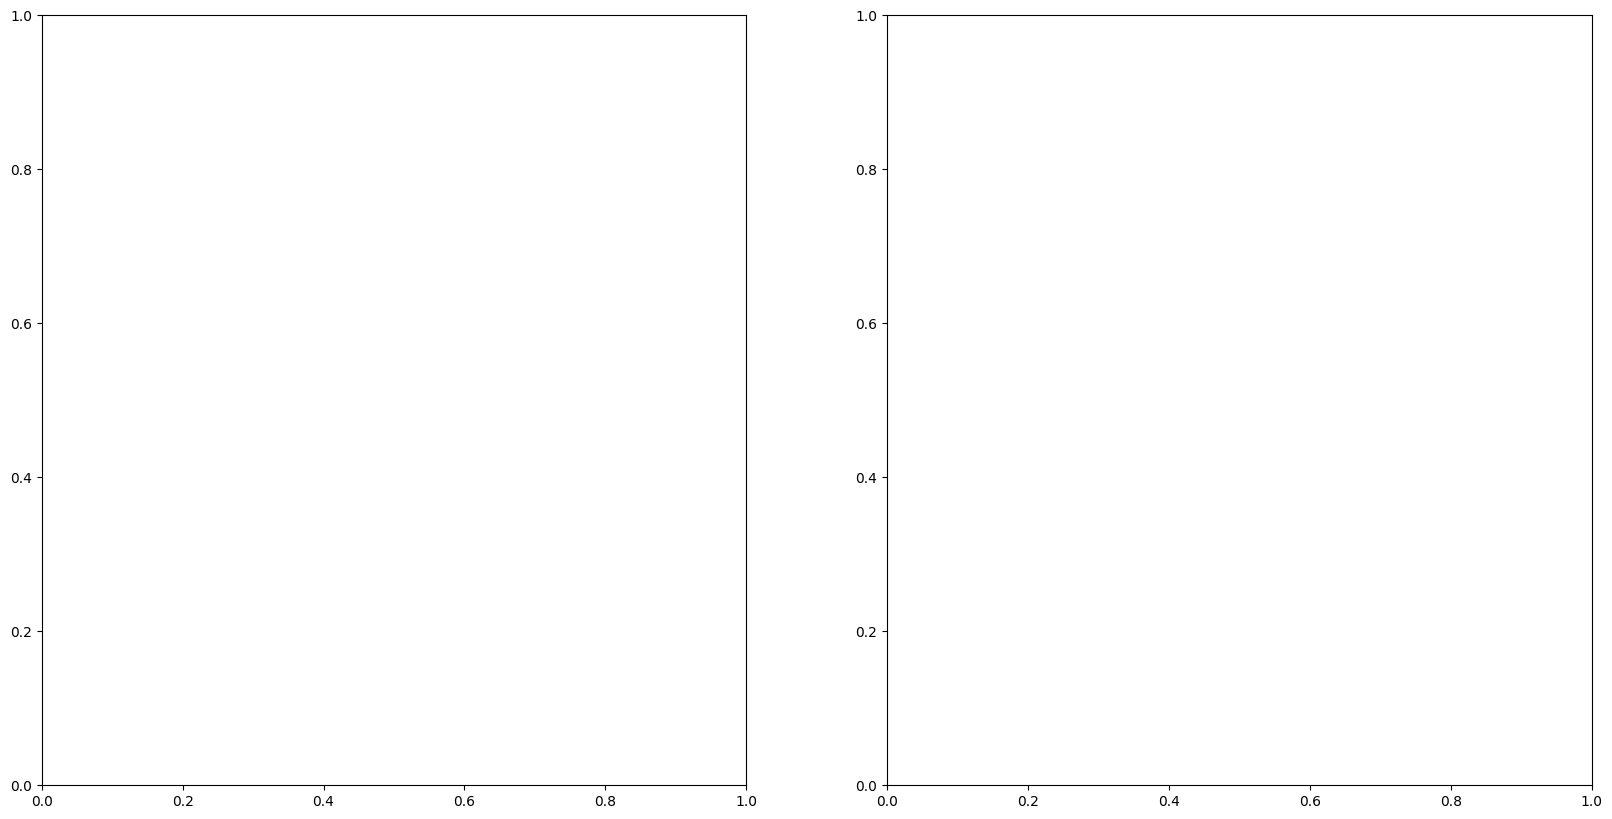

In [104]:
# Visualize the first two trees in the Random Forest
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for index, (ax, estimator) in enumerate(zip(axes, rf_best.estimators_[:2])):
    tree.plot_tree(estimator, 
                   feature_names=X_columns, 
                   class_names=y, 
                   filled=True, 
                   ax=ax)
    ax.set_title(f'Decision Tree {index + 1}')

plt.show()


# tree

In [105]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data and Describe

In [106]:
# load the dataset
df = pd.read_csv('employee_retention.csv')
# show data samples
df.sample(5)

Username  EnterpriseID StatusPernikahan JenisKelamin  \
14       madWildfowl7        105507          Menikah       Wanita   
150     enviousMacaw4        111591          Menikah       Wanita   
176   shamefulSalami8        101647         Bercerai         Pria   
130  jubilantTruffle2        111366         Bercerai       Wanita   
77    culturedOrange6        101163          Menikah       Wanita   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
14           FullTime   Software Engineer (Back End)  Freshgraduate_program   
150          FullTime  Software Engineer (Front End)           Senior_level   
176         Outsource   Software Engineer (Back End)              Mid_level   
130         Outsource   Software Engineer (Back End)              Mid_level   
77           FullTime   Software Engineer (Back End)           Senior_level   

    PerformancePegawai       AsalDaerah HiringPlatform  ...         NomorHP  \
14               Biasa  Jakarta Selatan         Indeed  ...  +6281965329xxx   
150              Biasa    Jakarta Timur         Indeed  ...  +6285732429xxx   
176              Biasa    Jakarta Pusat       LinkedIn  ...  +6285890385xxx   
130              Bagus  Jakarta Selatan         Indeed  ...  +6282254352xxx   
77        Sangat_bagus    Jakarta Pusat       LinkedIn  ...  +6283359623xxx   

                              Email  TingkatPendidikan  PernahBekerja  \
14        madWildfowl7630@gmail.com            Sarjana              1   
150     enviousMacaw4523@icloud.com            Sarjana              1   
176   shamefulSalami8906@proton.com           Magister              1   
130  jubilantTruffle2009@proton.com             Doktor              1   
77     culturedOrange6330@yahoo.com           Magister              1   

     IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
14              NaN    ganti_karir   1983-08-27     2011-6-27   
150             NaN  masih_bekerja   1968-07-20     2012-2-20   
176             1.0  masih_bekerja   1983-05-06    2014-07-07   
130             NaN  masih_bekerja   1977-05-09    2010-10-25   
77              NaN  masih_bekerja   1976-08-25    2016-05-11   

    TanggalPenilaianKaryawan  TanggalResign  
14                2016-03-10     2019-04-06  
150                2020-2-25              -  
176                2020-2-18              -  
130               2016-03-05              -  
77                 2020-1-21              -  

[5 rows x 25 columns]

In [107]:
# check the data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [108]:
# Check unique values of each columns 
df.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
IkutProgramLOP                          2
AlasanResign                           11
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan          

In [109]:
# Describe numerical features
df.describe()

EnterpriseID  SkorSurveyEngagement  SkorKepuasanPegawai  \
count     287.000000            287.000000           282.000000   
mean   105923.324042              3.101045             3.904255   
std      4044.977599              0.836388             0.913355   
min    100282.000000              1.000000             1.000000   
25%    101269.000000              3.000000             3.000000   
50%    106069.000000              3.000000             4.000000   
75%    110514.500000              4.000000             5.000000   
max    111703.000000              5.000000             5.000000   

       JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
count                 284.000000                          286.000000   
mean                    1.179577                            0.412587   
std                     2.294441                            1.275016   
min                     0.000000                            0.000000   
25%                     0.000000                            0.000000   
50%                     0.000000                            0.000000   
75%                     0.000000                            0.000000   
max                     8.000000                            6.000000   

       JumlahKetidakhadiran  IkutProgramLOP  
count            281.000000       29.000000  
mean              10.448399        0.517241  
std                6.902252        0.508548  
min                1.000000        0.000000  
25%                5.000000        0.000000  
50%               10.000000        1.000000  
75%               15.000000        1.000000  
max               55.000000        1.000000

In [110]:
# Convert columns to categorical data type
cats_col = [
    'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan',
    'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
    'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'TingkatPendidikan',
    'PernahBekerja', 'IkutProgramLOP', 'AlasanResign'
]

for column in cats_col:
    df[column] = df[column].astype('object')

In [111]:
# Describe categorical features
df[cats_col].describe()

StatusPernikahan JenisKelamin StatusKepegawaian  \
count               287          287               287   
unique                5            2                 3   
top       Belum_menikah       Wanita          FullTime   
freq                132          167               217   

                           Pekerjaan           JenjangKarir  \
count                            287                    287   
unique                            14                      3   
top     Software Engineer (Back End)  Freshgraduate_program   
freq                             109                    169   

       PerformancePegawai     AsalDaerah HiringPlatform  SkorSurveyEngagement  \
count                 287            287            287                   287   
unique                  5              5              9                     5   
top                 Biasa  Jakarta Pusat         Indeed                     3   
freq                   85             72             85                   132   

        SkorKepuasanPegawai TingkatPendidikan PernahBekerja  IkutProgramLOP  \
count                 282.0               287           287            29.0   
unique                  5.0                 3             2             2.0   
top                     3.0           Sarjana             1             1.0   
freq                   96.0               176           286            15.0   

         AlasanResign  
count             221  
unique             11  
top     masih_bekerja  
freq              132

In [112]:
# Check value counts of categorical features
for column in cats_col:
    print(df[column].value_counts())

StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64
StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64
Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: count, dtype: int64
JenjangKarir
Freshgraduate_program    169
Mid_level                 70
Senior_level              48
Name: count, dtype:

### Overview: <br>

- The value 'yes' in the 'PernahBekerja' column appears to be an error. Assuming that '1' represents 'yes' and '0' represents 'no,' 'yes' will be replaced with '1'. However, since this column contains only one unique value, it will eventually be removed due to its lack of significance. <br>
- The 'Username', 'EnterpriseID', 'NomorHP' and 'Email' columns are deemed irrelevant for predicting employee retention and will therefore be deleted.

# Data Pre Processing

In [113]:
# Create a copy of the dataset to preserve the original data
df_cleaned = df.copy()

In [114]:
# Find columns that contain '-' values
columns_with_dash = df_cleaned.columns[df_cleaned.isin(['-']).any()]

# Display the column names that contain '-' values
print("Columns containing '-' values:", list(columns_with_dash))

# Optionally, display the rows with '-' values in those columns
rows_with_dash = df_cleaned[df_cleaned.isin(['-']).any(axis=1)]
rows_with_dash

Columns containing '-' values: ['StatusPernikahan', 'TanggalResign']


Username  EnterpriseID StatusPernikahan JenisKelamin  \
0    spiritedPorpoise3        111065    Belum_menikah         Pria   
3     stressedTruffle1        106325    Belum_menikah         Pria   
5          emptyMacaw4        106419    Belum_menikah       Wanita   
6            madZebra1        100309          Menikah       Wanita   
7     cynicalMandrill7        110500    Belum_menikah         Pria   
..                 ...           ...              ...          ...   
280       anxiousTeal2        111378    Belum_menikah       Wanita   
281       anxiousWasp6        100628         Bercerai         Pria   
282        dopeySheep0        106034    Belum_menikah       Wanita   
283  yearningPorpoise4        106254                -       Wanita   
286       puzzledFish5        106214          Menikah         Pria   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0           Outsource   Software Engineer (Back End)  Freshgraduate_program   
3           Outsource  Software Engineer (Front End)  Freshgraduate_program   
5           Outsource  Software Engineer (Front End)           Senior_level   
6            FullTime                   Data Analyst  Freshgraduate_program   
7            FullTime   Software Engineer (Back End)           Senior_level   
..                ...                            ...                    ...   
280          FullTime   Software Engineer (Back End)              Mid_level   
281          FullTime  Software Engineer (Front End)  Freshgraduate_program   
282          FullTime                  Data Engineer              Mid_level   
283          FullTime       Product Design (UI & UX)  Freshgraduate_program   
286        Internship                   Data Analyst              Mid_level   

    PerformancePegawai       AsalDaerah     HiringPlatform  ...  \
0         Sangat_bagus    Jakarta Timur  Employee_Referral  ...   
3                Bagus    Jakarta Pusat           LinkedIn  ...   
5                Biasa  Jakarta Selatan             Indeed  ...   
6                Biasa    Jakarta Utara           LinkedIn  ...   
7               Kurang  Jakarta Selatan           LinkedIn  ...   
..                 ...              ...                ...  ...   
280              Bagus    Jakarta Timur  Employee_Referral  ...   
281       Sangat_bagus    Jakarta Pusat             Indeed  ...   
282              Bagus    Jakarta Pusat      Google_Search  ...   
283              Biasa    Jakarta Timur           LinkedIn  ...   
286              Bagus    Jakarta Barat             Indeed  ...   

            NomorHP                            Email  TingkatPendidikan  \
0    +6282232522xxx   spiritedPorpoise3135@yahoo.com           Magister   
3    +6283233846xxx  stressedTruffle1406@hotmail.com            Sarjana   
5    +6283886053xxx         emptyMacaw4468@yahoo.com            Sarjana   
6    +6285735701xxx          madZebra1244@icloud.com            Sarjana   
7    +6281293511xxx  cynicalMandrill7920@hotmail.com           Magister   
..              ...                              ...                ...   
280  +6289567915xxx        anxiousTeal2015@gmail.com            Sarjana   
281  +6281806218xxx      anxiousWasp6788@outlook.com            Sarjana   
282  +6283343465xxx        dopeySheep0297@icloud.com            Sarjana   
283  +6281222782xxx   yearningPorpoise4421@yahoo.com            Sarjana   
286  +6287722818xxx      puzzledFish5776@hotmail.com            Sarjana   

     PernahBekerja  IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0                1             1.0  masih_bekerja   1972-07-01    2011-01-10   
3                1             0.0  masih_bekerja   1979-11-24     2014-2-17   
5                1             0.0  masih_bekerja   1980-05-12    2016-10-02   
6                1             NaN  masih_bekerja   1979-05-24    2014-11-10   
7                1             NaN  masih_bekerja   1983-08-24    2013-07-08   
..             ...             ...    

In [115]:
# Replace '-' value to NaN for column 'TanggalResign' and 'StatusPernikahan'
df_cleaned['TanggalResign'].replace('-', pd.NA, inplace=True)
df_cleaned['StatusPernikahan'].replace('-', pd.NA, inplace=True)

## Check if replacement was successful
# Find columns that contain '-' values
columns_with_dash = df_cleaned.columns[df_cleaned.isin(['-']).any()]

# Display the column names that contain '-' values
print("Columns containing '-' values:", list(columns_with_dash))

# Display df_cleaned
df_cleaned

Columns containing '-' values: []


Username  EnterpriseID StatusPernikahan JenisKelamin  \
0    spiritedPorpoise3        111065    Belum_menikah         Pria   
1      jealousGelding2        106080    Belum_menikah         Pria   
2        pluckyMuesli3        106452          Menikah         Pria   
3     stressedTruffle1        106325    Belum_menikah         Pria   
4          shyTermite7        111171    Belum_menikah       Wanita   
..                 ...           ...              ...          ...   
282        dopeySheep0        106034    Belum_menikah       Wanita   
283  yearningPorpoise4        106254             <NA>       Wanita   
284      murkySausage9        110433          Menikah       Wanita   
285      truthfulMoth4        110744    Belum_menikah         Pria   
286       puzzledFish5        106214          Menikah         Pria   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0           Outsource   Software Engineer (Back End)  Freshgraduate_program   
1            FullTime                   Data Analyst  Freshgraduate_program   
2            FullTime  Software Engineer (Front End)  Freshgraduate_program   
3           Outsource  Software Engineer (Front End)  Freshgraduate_program   
4            FullTime                Product Manager  Freshgraduate_program   
..                ...                            ...                    ...   
282          FullTime                  Data Engineer              Mid_level   
283          FullTime       Product Design (UI & UX)  Freshgraduate_program   
284          FullTime  Software Engineer (Front End)           Senior_level   
285          FullTime    Software Engineer (Android)              Mid_level   
286        Internship                   Data Analyst              Mid_level   

    PerformancePegawai     AsalDaerah      HiringPlatform  ...  \
0         Sangat_bagus  Jakarta Timur   Employee_Referral  ...   
1        Sangat_kurang  Jakarta Utara             Website  ...   
2                Bagus  Jakarta Timur              Indeed  ...   
3                Bagus  Jakarta Pusat            LinkedIn  ...   
4                Bagus  Jakarta Timur            LinkedIn  ...   
..                 ...            ...                 ...  ...   
282              Bagus  Jakarta Pusat       Google_Search  ...   
283              Biasa  Jakarta Timur            LinkedIn  ...   
284              Biasa  Jakarta Pusat  Diversity_Job_Fair  ...   
285              Bagus  Jakarta Utara       Google_Search  ...   
286              Bagus  Jakarta Barat              Indeed  ...   

            NomorHP                            Email  TingkatPendidikan  \
0    +6282232522xxx   spiritedPorpoise3135@yahoo.com           Magister   
1    +6281270745xxx     jealousGelding2239@yahoo.com            Sarjana   
2    +6281346215xxx      pluckyMuesli3961@icloud.com           Magister   
3    +6283233846xxx  stressedTruffle1406@hotmail.com            Sarjana   
4    +6287883263xxx         shyTermite7149@gmail.com            Sarjana   
..              ...                              ...                ...   
282  +6283343465xxx        dopeySheep0297@icloud.com            Sarjana   
283  +6281222782xxx   yearningPorpoise4421@yahoo.com            Sarjana   
284  +6285821950xxx       murkySausage9688@yahoo.com            Sarjana   
285  +6287787391xxx       truthfulMoth4663@yahoo.com            Sarjana   
286  +6287722818xxx      puzzledFish5776@hotmail.com            Sarjana   

     PernahBekerja  IkutProgramLOP     AlasanResign TanggalLahir  \
0                1             1.0    masih_bekerja   1972-07-01   
1                1             1.0    toxic_culture   1984-04-26   
2                1             1.0        jam_kerja   1974-01-07   
3                1             0.0    masih_bekerja   1979-11-24   
4                1             0.0      ganti_karir   1974-11-07   
..             ...             ...              ...          ...   
282              1             NaN              NaN   

In [116]:
# Replace incorrect value in 'PernahBekerja'
df_cleaned['PernahBekerja'] = df_cleaned['PernahBekerja'].replace('yes', '1')
print(df_cleaned['PernahBekerja'].value_counts())

PernahBekerja
1    287
Name: count, dtype: int64


In [117]:
# Check duplicates
df_cleaned.duplicated().sum()

0

In [118]:
# Check null values
df_cleaned.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        3
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

### Overview: 
- Due to the fact that the columns 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', and 'JumlahKetidakhadiran' must contain integer values, nulls will be imputed using the median.

- Column 'IkutProgramLOP' contains 89.8% null values, indicating it has limited utility for future analysis.

- Null values in the column 'AlasanResign' and 'SkorKepuasanPegawai' will be imputed with the most frequently occurring value.

In [119]:
# Impute numerical columns with median
nums_to_impute = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

for column in nums_to_impute:
    median = df[column].median()
    df_cleaned[column].fillna(median, inplace=True)

In [120]:
# List of categorical columns to impute
cats_to_impute = ['AlasanResign', 'SkorKepuasanPegawai', 'StatusPernikahan']

# Iterate over each column, fill NaN with the mode (most frequent value)
for column in cats_to_impute:
    # Convert the column to 'object' to ensure it's mutable
    df_cleaned[column] = df_cleaned[column].astype('object')
    
    # Calculate the mode (most frequent value)
    mode = df_cleaned[column].mode()[0]
    
    # Fill NaN values with the mode
    df_cleaned[column].fillna(mode, inplace=True)

# Check null values after imputation
df_cleaned.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [121]:
# Drop irrelevant columns ('Username', 'EnterpriseID', 'PernahBekerja', 'IkutProgramLOP', 'NomorHP' and 'Email')
df_cleaned.drop(columns=['Username', 'EnterpriseID', 'PernahBekerja', 'IkutProgramLOP', 'NomorHP', 'Email'], inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    object 
 9   SkorKepuasanPegawai                 287 non-null    float64
 10  JumlahKeikutsertaanProjek           287 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

In [122]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    object 
 9   SkorKepuasanPegawai                 287 non-null    float64
 10  JumlahKeikutsertaanProjek           287 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

In [123]:
# Drop rows representing irrelevant value for machine learning
## Drop rows where 'StatusKepegawaian' is 'Internship'
df_cleaned = df_cleaned[df_cleaned['StatusKepegawaian'] != 'Internship']
df_cleaned['StatusKepegawaian'].value_counts()

StatusKepegawaian
FullTime     217
Outsource     66
Name: count, dtype: int64

In [124]:
# Adjust data format according to value of each column
int_cols = ['JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'JumlahKeikutsertaanProjek', 'SkorKepuasanPegawai', 'SkorSurveyEngagement']
for i in int_cols:
    df_cleaned[i] = df_cleaned[i].astype(int)

dt_cols = ['TanggalHiring', 'TanggalResign', 'TanggalLahir', 'TanggalPenilaianKaryawan']
for i in dt_cols:
    df_cleaned[i] = pd.to_datetime(df_cleaned[i], errors='coerce')

# Confirm changes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 285
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    283 non-null    object        
 1   JenisKelamin                        283 non-null    object        
 2   StatusKepegawaian                   283 non-null    object        
 3   Pekerjaan                           283 non-null    object        
 4   JenjangKarir                        283 non-null    object        
 5   PerformancePegawai                  283 non-null    object        
 6   AsalDaerah                          283 non-null    object        
 7   HiringPlatform                      283 non-null    object        
 8   SkorSurveyEngagement                283 non-null    int64         
 9   SkorKepuasanPegawai                 283 non-null    int64         
 10  JumlahKeikutsertaanProjek      

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3947188362.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3947188362.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3947188362.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [125]:
# Save df_cleaned to a CSV file
df_cleaned.to_csv('df_cleaned.csv', index=False)

### During the data preprocessing phase, missing values were addressed through imputation, and six columns were removed due to their insignificance for prediction. This refinement reduced the dataset from 24 to 18 columns, ensuring that the data is now streamlined, complete, and ready for further analysis.

# Analysis on Employee Number Changes 

In [126]:
# Convert 'TanggalHiring' and 'TanggalResign' to datetime format, handling errors
cols = ['TanggalHiring', 'TanggalResign']

# Extract the year from the date column
new_cols = ['TahunHiring', 'TahunResign']
for i, j in zip(cols, new_cols):
    df_cleaned[j] = df_cleaned[i].dt.year

# Display new column
df_cleaned[new_cols]

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3288732851.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3288732851.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TahunHiring  TahunResign
0           2011          NaN
1           2014       2018.0
2           2011       2014.0
3           2014          NaN
4           2013       2018.0
..           ...          ...
281         2017          NaN
282         2011          NaN
283         2013       2017.0
284         2013       2018.0
285         2011       2018.0

[283 rows x 2 columns]

In [127]:
# Aggregate the number of hired employees each year
tabel_hiring = df_cleaned.groupby('TahunHiring').size().reset_index(name='JumlahKaryawanMasuk')

# Convert 'TahunResign' to integer type
tabel_hiring['TahunHiring'] = tabel_hiring['TahunHiring'].astype(int)

# Display the results
tabel_hiring

TahunHiring  JumlahKaryawanMasuk
0          2006                    1
1          2007                    2
2          2008                    2
3          2009                    7
4          2010                    8
5          2011                   73
6          2012                   40
7          2013                   43
8          2014                   56
9          2015                   31
10         2016                   14
11         2017                    5
12         2018                    1

In [128]:
# Aggregrate the number of resigned employee each year
tabel_resign = df_cleaned.groupby('TahunResign').size().reset_index(name='JumlahKaryawanKeluar')

# Convert 'TahunResign' to integer type
tabel_resign['TahunResign'] = tabel_resign['TahunResign'].astype(int)

# Display the results
tabel_resign

TahunResign  JumlahKaryawanKeluar
0         2013                     5
1         2014                    12
2         2015                     8
3         2016                     8
4         2017                    19
5         2018                    23
6         2019                     5
7         2020                     6

In [129]:
# Perform an outer join on the year columns
tabel_joined = pd.merge(
    tabel_hiring,
    tabel_resign,
    left_on='TahunHiring', 
    right_on='TahunResign',
    how='outer'
)

# Drop the redundant 'TahunResign' column
tabel_joined = tabel_joined.drop(columns=['TahunResign'])

# Rename the 'TahunHiring' column to 'Tahun'
tabel_joined = tabel_joined.rename(columns={'TahunHiring': 'Tahun'})

# Display the joined DataFrame
tabel_joined


Tahun  JumlahKaryawanMasuk  JumlahKaryawanKeluar
0   2006.0                  1.0                   NaN
1   2007.0                  2.0                   NaN
2   2008.0                  2.0                   NaN
3   2009.0                  7.0                   NaN
4   2010.0                  8.0                   NaN
5   2011.0                 73.0                   NaN
6   2012.0                 40.0                   NaN
7   2013.0                 43.0                   5.0
8   2014.0                 56.0                  12.0
9   2015.0                 31.0                   8.0
10  2016.0                 14.0                   8.0
11  2017.0                  5.0                  19.0
12  2018.0                  1.0                  23.0
13     NaN                  NaN                   5.0
14     NaN                  NaN                   6.0

In [130]:
# Impute nulls in 'Tahun' column 
# Define the years to fill
years_to_fill = [2019, 2020]

# Replace NaN values in 'Tahun' with specified years
tabel_joined.loc[tabel_joined['Tahun'].isna(), 'Tahun'] = years_to_fill

# Convert 'Tahun' to integer type (optional)
tabel_joined['Tahun'] = tabel_joined['Tahun'].astype(int)

# Display the updated DataFrame
print(tabel_joined)

    Tahun  JumlahKaryawanMasuk  JumlahKaryawanKeluar
0    2006                  1.0                   NaN
1    2007                  2.0                   NaN
2    2008                  2.0                   NaN
3    2009                  7.0                   NaN
4    2010                  8.0                   NaN
5    2011                 73.0                   NaN
6    2012                 40.0                   NaN
7    2013                 43.0                   5.0
8    2014                 56.0                  12.0
9    2015                 31.0                   8.0
10   2016                 14.0                   8.0
11   2017                  5.0                  19.0
12   2018                  1.0                  23.0
13   2019                  NaN                   5.0
14   2020                  NaN                   6.0


In [131]:


# Fill NaN values in 'JumlahKaryawanMasuk' and 'JumlahKaryawanKeluar' columns
tabel_joined['JumlahKaryawanMasuk'] = tabel_joined['JumlahKaryawanMasuk'].fillna(0)
tabel_joined['JumlahKaryawanKeluar'] = tabel_joined['JumlahKaryawanKeluar'].fillna(0)

# Calculate cumulative sums
tabel_joined['AkumulasiKaryawanKeluar'] = tabel_joined['JumlahKaryawanKeluar'].cumsum()

# Calculate cumulative number of employees who have stayed
tabel_joined['AkumulasiKaryawanBertahan'] = tabel_joined['JumlahKaryawanMasuk'].cumsum() - tabel_joined['AkumulasiKaryawanKeluar']

# Display the updated DataFrame
tabel_joined

Tahun  JumlahKaryawanMasuk  JumlahKaryawanKeluar  AkumulasiKaryawanKeluar  \
0    2006                  1.0                   0.0                      0.0   
1    2007                  2.0                   0.0                      0.0   
2    2008                  2.0                   0.0                      0.0   
3    2009                  7.0                   0.0                      0.0   
4    2010                  8.0                   0.0                      0.0   
5    2011                 73.0                   0.0                      0.0   
6    2012                 40.0                   0.0                      0.0   
7    2013                 43.0                   5.0                      5.0   
8    2014                 56.0                  12.0                     17.0   
9    2015                 31.0                   8.0                     25.0   
10   2016                 14.0                   8.0                     33.0   
11   2017                  5.0                  19.0                     52.0   
12   2018                  1.0                  23.0                     75.0   
13   2019                  0.0                   5.0                     80.0   
14   2020                  0.0                   6.0                     86.0   

    AkumulasiKaryawanBertahan  
0                         1.0  
1                         3.0  
2                         5.0  
3                        12.0  
4                        20.0  
5                        93.0  
6                       133.0  
7                       171.0  
8                       215.0  
9                       238.0  
10                      244.0  
11                      230.0  
12                      208.0  
13                      203.0  
14                      197.0

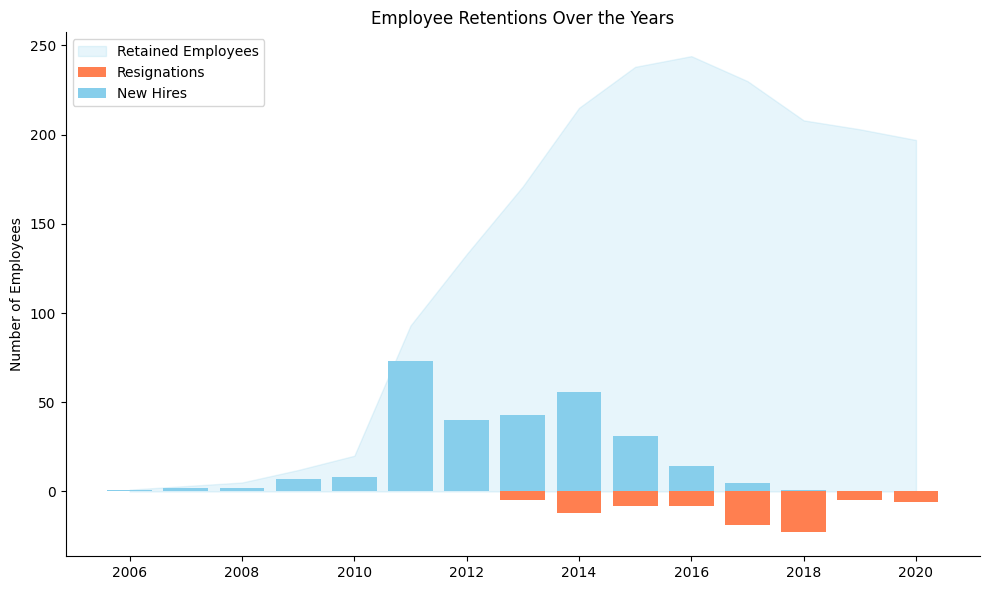

In [132]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the cumulative number of employees who have stayed (blue transparent area chart)
plt.fill_between(tabel_joined['Tahun'], tabel_joined['AkumulasiKaryawanBertahan'], label='Retained Employees', color='skyblue', alpha=0.2)

# Plot the number of employees who resigned (down bar chart with negative values)
plt.bar(tabel_joined['Tahun'], -tabel_joined['JumlahKaryawanKeluar'], label='Resignations', color='coral')

# Plot the number of new hires (up bar chart with positive values)
plt.bar(tabel_joined['Tahun'], tabel_joined['JumlahKaryawanMasuk'], label='New Hires', color='skyblue')

# Add titles and labels
plt.title('Employee Retentions Over the Years')
plt.ylabel('Number of Employees')

# Show the legend
plt.legend()

# Remove grid lines
plt.grid(False)

# Layout adjustments
plt.tight_layout()

# Menghapus frame plot
sns.despine()

# Show the legend on the left side
plt.legend(loc='upper left')

# Display the plot
plt.show()


# Analysis on Resignation Reasons

In [133]:
# Buat DataFrame untuk karyawan yang belum resign (TanggalResign null atau 0)
belum_resign = df_cleaned[df_cleaned['TanggalResign'].isna()].groupby('Pekerjaan').size().reset_index(name='JumlahBelumResign')

# Buat DataFrame untuk karyawan yang sudah resign (TanggalResign terisi)
sudah_resign = df_cleaned[~df_cleaned['TanggalResign'].isna()].groupby('Pekerjaan').size().reset_index(name='JumlahSudahResign')

# Gabungkan kedua DataFrame menggunakan outer join
df_merged = pd.merge(belum_resign, sudah_resign, on='Pekerjaan', how='outer')

# Tampilkan hasil
df_merged


Pekerjaan  JumlahBelumResign  JumlahSudahResign
0                     Data Analyst                  7                8.0
1                    Data Engineer                  7                3.0
2                  DevOps Engineer                  3                NaN
3          Digital Product Manager                  2                NaN
4        Machine Learning Engineer                  2                NaN
5         Product Design (UI & UX)                 15                9.0
6   Product Design (UX Researcher)                  1                NaN
7                  Product Manager                 11                5.0
8                     Scrum Master                  3                NaN
9               Software Architect                  1                NaN
10     Software Engineer (Android)                 17                7.0
11    Software Engineer (Back End)                 81               27.0
12   Software Engineer (Front End)                 44               27.0
13         Software Engineer (iOS)                  3                NaN

In [ ]:
# Add a new column for the total number of employees (existing + resigned)
df_merged['JumlahEmployee'] = df_merged['JumlahBelumResign'] + df_merged['JumlahSudahResign']

# Add a new column for the percentage of employees still employed
df_merged['PersentaseBelumResign'] = (df_merged['JumlahBelumResign'] / df_merged['JumlahEmployee']) * 100

# Display the updated DataFrame
df_merged

Pekerjaan  JumlahBelumResign  JumlahSudahResign  \
0                     Data Analyst                  7                8.0   
1                    Data Engineer                  7                3.0   
2                  DevOps Engineer                  3                NaN   
3          Digital Product Manager                  2                NaN   
4        Machine Learning Engineer                  2                NaN   
5         Product Design (UI & UX)                 15                9.0   
6   Product Design (UX Researcher)                  1                NaN   
7                  Product Manager                 11                5.0   
8                     Scrum Master                  3                NaN   
9               Software Architect                  1                NaN   
10     Software Engineer (Android)                 17                7.0   
11    Software Engineer (Back End)                 81               27.0   
12   Software Engineer (Front End)                 44               27.0   
13         Software Engineer (iOS)                  3                NaN   

    JumlahEmployee  PersentaseBelumResign  
0             15.0              46.666667  
1             10.0              70.000000  
2              NaN                    NaN  
3              NaN                    NaN  
4              NaN                    NaN  
5             24.0              62.500000  
6              NaN                    NaN  
7             16.0              68.750000  
8              NaN                    NaN  
9              NaN                    NaN  
10            24.0              70.833333  
11           108.0              75.000000  
12            71.0              61.971831  
13             NaN                    NaN

Pekerjaan  JumlahBelumResign  JumlahSudahResign  \
0                     Data Analyst                  7                8.0   
1                    Data Engineer                  7                3.0   
2                  DevOps Engineer                  3                NaN   
3          Digital Product Manager                  2                NaN   
4        Machine Learning Engineer                  2                NaN   
5         Product Design (UI & UX)                 15                9.0   
6   Product Design (UX Researcher)                  1                NaN   
7                  Product Manager                 11                5.0   
8                     Scrum Master                  3                NaN   
9               Software Architect                  1                NaN   
10     Software Engineer (Android)                 17                7.0   
11    Software Engineer (Back End)                 81               27.0   
12   Software Engineer (Front End)                 44               27.0   
13         Software Engineer (iOS)                  3                NaN   

    JumlahEmployee  PersentaseBelumResign  
0             15.0              46.666667  
1             10.0              70.000000  
2              NaN                    NaN  
3              NaN                    NaN  
4              NaN                    NaN  
5             24.0              62.500000  
6              NaN                    NaN  
7             16.0              68.750000  
8              NaN                    NaN  
9              NaN                    NaN  
10            24.0              70.833333  
11           108.0              75.000000  
12            71.0              61.971831  
13             NaN                    NaN

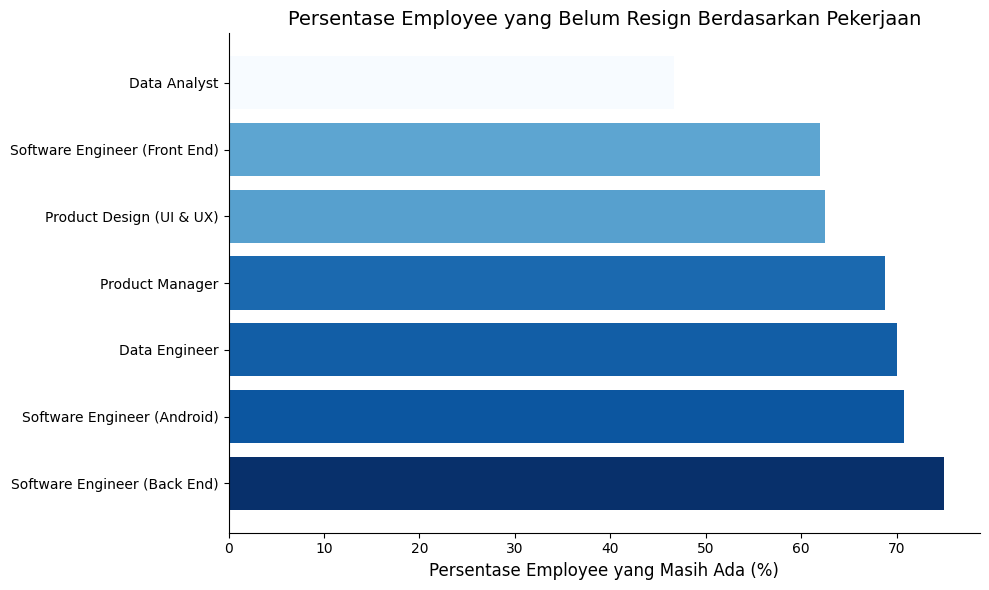

In [ ]:
import matplotlib.colors as mcolors

# Sort DataFrame
df_merged_sorted = df_merged.sort_values(by='PersentaseBelumResign', ascending=False)

# Normalize percentage values for colormap
norm = mcolors.Normalize(vmin=df_merged_sorted['PersentaseBelumResign'].min(), vmax=df_merged_sorted['PersentaseBelumResign'].max())
cmap = plt.get_cmap('Blues')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot bars with gradient colors
for index, row in df_merged_sorted.iterrows():
    plt.barh(row['Pekerjaan'], row['PersentaseBelumResign'], color=cmap(norm(row['PersentaseBelumResign'])))

# Add titles and labels
plt.title('Persentase Employee yang Belum Resign Berdasarkan Pekerjaan', fontsize=14)
plt.xlabel('Persentase Employee yang Masih Ada (%)', fontsize=12)


# Remove plot frame
sns.despine()

# Remove grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

## Insights:
High Turnover in Data-Focused Roles: Data Analyst, Data Engineer, and Software Engineer (Back End) roles exhibit some of the highest resignation rates, indicating possible issues specific to these roles, such as job stress, high workloads, or job dissatisfaction.


In [ ]:
# Filter for 'Data Analyst' role
df_data_analyst = df_cleaned[df_cleaned['Pekerjaan'] == 'Data Analyst']

# Ensure 'TanggalResign' is in datetime format and check resignation status
df_data_analyst['Resigned'] = df_data_analyst['TanggalResign'].notna()

# Display
df_data_analyst

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3464469464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_analyst['Resigned'] = df_data_analyst['TanggalResign'].notna()


StatusPernikahan JenisKelamin StatusKepegawaian     Pekerjaan  \
1      Belum_menikah         Pria          FullTime  Data Analyst   
6            Menikah       Wanita          FullTime  Data Analyst   
18          Bercerai       Wanita          FullTime  Data Analyst   
54           Lainnya       Wanita          FullTime  Data Analyst   
78          Bercerai         Pria          FullTime  Data Analyst   
86           Menikah       Wanita         Outsource  Data Analyst   
102          Menikah         Pria         Outsource  Data Analyst   
105    Belum_menikah       Wanita          FullTime  Data Analyst   
106    Belum_menikah       Wanita          FullTime  Data Analyst   
108    Belum_menikah       Wanita          FullTime  Data Analyst   
229    Belum_menikah       Wanita          FullTime  Data Analyst   
233    Belum_menikah       Wanita          FullTime  Data Analyst   
236    Belum_menikah         Pria          FullTime  Data Analyst   
239    Belum_menikah       Wanita         Outsource  Data Analyst   
277    Belum_menikah         Pria          FullTime  Data Analyst   

              JenjangKarir PerformancePegawai       AsalDaerah  \
1    Freshgraduate_program      Sangat_kurang    Jakarta Utara   
6    Freshgraduate_program              Biasa    Jakarta Utara   
18   Freshgraduate_program       Sangat_bagus    Jakarta Pusat   
54               Mid_level       Sangat_bagus    Jakarta Barat   
78               Mid_level       Sangat_bagus    Jakarta Barat   
86   Freshgraduate_program       Sangat_bagus    Jakarta Timur   
102  Freshgraduate_program       Sangat_bagus    Jakarta Barat   
105  Freshgraduate_program              Bagus    Jakarta Timur   
106  Freshgraduate_program              Bagus    Jakarta Barat   
108  Freshgraduate_program              Biasa    Jakarta Timur   
229              Mid_level       Sangat_bagus    Jakarta Barat   
233  Freshgraduate_program       Sangat_bagus    Jakarta Utara   
236              Mid_level             Kurang  Jakarta Selatan   
239  Freshgraduate_program              Biasa    Jakarta Utara   
277              Mid_level       Sangat_bagus    Jakarta Utara   

         HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  ...  \
1               Website                     4                    4  ...   
6              LinkedIn                     2                    3  ...   
18   Diversity_Job_Fair                     3                    4  ...   
54             LinkedIn                     4                    5  ...   
78    Employee_Referral                     4                    4  ...   
86               Indeed                     3                    5  ...   
102       Google_Search                     3                    3  ...   
105              Indeed                     3                    3  ...   
106       CareerBuilder                     4                    3  ...   
108       CareerBuilder                     4                    4  ...   
229              Indeed                     4                    5  ...   
233  Diversity_Job_Fair                     4                    3  ...   
236  Diversity_Job_Fair                     4                    4  ...   
239       Google_Search                     4                    4  ...   
277            LinkedIn                     4                    5  ...   

     JumlahKetidakhadiran  TingkatPendidikan       AlasanResign TanggalLahir  \
1                       3            Sarjana      toxic_culture   1984-04-26   
6                      19            Sarjana      masih_bekerja   1979-05-24   
18                     17            Sarjana  internal_conflict   1968-05-30   
54                     10            Sarjana      masih_bekerja   1987-05-21   
78                     19            Sarjana      masih_bekerja   1983-02-18   
86                      2            Sarjana      toxic_culture   1987-06-14   
102                    20            Sarjana      toxic_culture   1984-05-09   
1

In [ ]:
# Save the DataFrame to a CSV file
df_data_analyst.to_csv('df_data_analyst.csv', index=False)

In [ ]:
# load the dataset
df_data_analyst = pd.read_csv('df_data_analyst.csv')

# Ensure 'TanggalResign' is in datetime format and check resignation status
df_data_analyst['Resigned'] = df_data_analyst['TanggalResign'].notna()

# Aggregate based on Jenjang Karir, Performa Karyawan, and Alasan Resign
agg_table = df_data_analyst[df_data_analyst['Resigned']].groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahResign')

# Display the aggregation table
print(agg_table)

            JenjangKarir PerformancePegawai       AlasanResign  JumlahResign
0  Freshgraduate_program              Bagus      toxic_culture             1
1  Freshgraduate_program              Biasa  internal_conflict             1
2  Freshgraduate_program              Biasa      toxic_culture             1
3  Freshgraduate_program       Sangat_bagus  internal_conflict             1
4  Freshgraduate_program       Sangat_bagus      toxic_culture             3
5  Freshgraduate_program      Sangat_kurang      toxic_culture             1


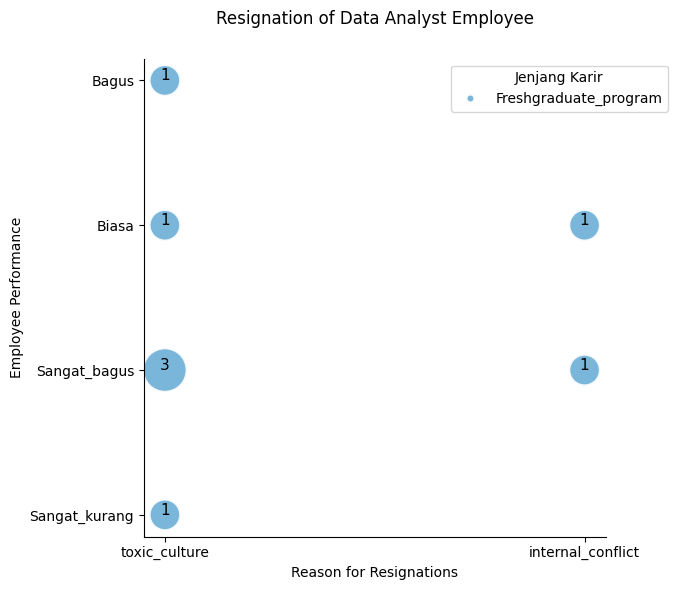

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))

# Create a bubble chart
bubble_chart = sns.scatterplot(
    data=agg_table,
    y='PerformancePegawai',
    x='AlasanResign',
    hue='JenjangKarir',
    size='JumlahResign',
    sizes=(500, 1000),
    palette='Blues',
    alpha=0.9
)

# Add labels to each bubble with JumlahResign
for line in range(agg_table.shape[0]):
    plt.text(
        agg_table['AlasanResign'][line],
        agg_table['PerformancePegawai'][line],
        agg_table['JumlahResign'][line],
        horizontalalignment='center',
        size=11,
        color='black'
    )

# Add the hue legend and remove the size legend
handles, labels = bubble_chart.get_legend_handles_labels()
hue_handles = [handle for handle, label in zip(handles, labels) if label in agg_table['JenjangKarir'].unique()]
hue_labels = [label for label in labels if label in agg_table['JenjangKarir'].unique()]

# Add the hue legend
plt.legend(
    handles=hue_handles,
    labels=hue_labels,
    title='Jenjang Karir',
    loc='upper right',
    bbox_to_anchor=(1.15, 1)
)

# Add titles and labels
plt.ylabel('Employee Performance')
plt.xlabel('Reason for Resignations')
plt.title('Resignation of Data Analyst Employee', pad=25)

# Remove grid lines and frame
sns.despine()
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Define the custom color palette
color_map = {
    'Sangat_bagus': 'darkgreen',
    'Bagus': 'lightgreen',
    'Biasa': 'orange',
    'Sangat_kurang': 'red'
}

# Create the sunburst chart
fig = px.sunburst(
    agg_table,
    path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],  # Define the hierarchy
    values='JumlahResign',  # Size of each section
    color='PerformancePegawai',  # Color by performance
    color_discrete_map=color_map,  # Apply the custom color palette
    title="Resignation of Data Analyst Employee",
)

# Update hover information to show 'JumlahResign'
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Jumlah Resign: %{value}<br>'
)

# Update text annotations for 'AlasanResign' sections
fig.update_traces(
    text=[f'{value}' for value in agg_table['JumlahResign']],
    textinfo='label+text'  # Display both label and text (JumlahResign) in the chart
)

# Update layout for the chart with larger size, centered title, and title customization
fig.update_layout(
    margin=dict(t=60, l=0, r=0, b=0),  # Increase top margin to add space between title and chart
    width=800,  # Increase the width of the chart
    height=800,  # Increase the height of the chart
    title=dict(
        text="Resignation of Data Analyst Employee",  # Set the title text
        x=0.5,  # Center the title horizontally
        font=dict(size=20, family='Arial, Bold', color='black')  # Set font size, family, and color
    ),
)

# Show the plot
fig.show()


### Insights:
- The Data Analyst department has a 50% resignation rate, the highest of any department. This is likely because the role involves tight deadlines, complex data, and high expectations, leading to stress and burnout.
- Most resignations in the Data Analyst department are due to a "toxic culture," affecting 5 out of 7 employees, including those with "excellent" performance ratings. Additionally, 2 resignations are attributed to internal conflict, highlighting broader issues with team dynamics and communication.
- Resignations are limited to the Freshgraduate_program level, with no resignations from Mid_level or Senior_level employees. This suggests that entry-level employees are more affected by toxic culture and internal conflicts, while more senior employees may have adapted to or are less impacted by these issues.

### Recommendation:
- Improve Work-Life Balance: Introduce flexible work arrangements or wellness programs to help employees maintain a better work-life balance and reduce burnout.
- Assess and Address Toxic Culture: Conduct a comprehensive assessment to identify factors contributing to a toxic work environment and implement clear procedures for resolving internal conflicts. This approach aims to improve the overall workplace culture.
- Enhance Support for Freshgraduate_program Employees: Focus on improving the work environment and career development specifically for entry-level employees. Implement training programs in conflict management and communication, and provide structured mentoring and development opportunities to support their integration and growth within the organization.

# Feature Engineering

In [ ]:
# Add target 'Resign' to dataframe 
df_cleaned['Resigned'] = df_cleaned['TanggalResign'].notna()
display(df_cleaned[['TanggalResign', 'Resigned']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/2938071132.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TanggalResign  Resigned
0             NaT     False
1      2018-06-16      True
2      2014-09-24      True
3             NaT     False
4      2018-09-06      True
..            ...       ...
281           NaT     False
282           NaT     False
283    2017-11-15      True
284    2018-06-08      True
285    2018-04-01      True

[283 rows x 2 columns]

In [ ]:
# Extract age from BirthDate
from datetime import datetime

# Define a function to calculate age
def calculate_age(birth_date, as_of_date=datetime.now()):
    return as_of_date.year - birth_date.year - ((as_of_date.month, as_of_date.day) 
                                                < (birth_date.month, birth_date.day))

# Apply the function to create the 'Usia' column
df_cleaned['Usia'] = df_cleaned['TanggalLahir'].apply(calculate_age)

display(df_cleaned[['Usia', 'TanggalLahir']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/1457402569.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Usia TanggalLahir
0      52   1972-07-01
1      40   1984-04-26
2      50   1974-01-07
3      44   1979-11-24
4      49   1974-11-07
..    ...          ...
281    41   1983-09-04
282    50   1973-12-08
283    49   1974-12-01
284    54   1969-10-30
285    42   1981-10-01

[283 rows x 2 columns]

In [ ]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Create 'Year_Tenure' column
df_cleaned['Year_Tenure'] = df_cleaned.apply(lambda row: (row['TanggalResign'].year 
                                                          - row['TanggalHiring'].year) 
                             if pd.notnull(row['TanggalResign']) 
                             else (current_year - row['TanggalHiring'].year), axis=1)

# Preview the dataframe
display(df_cleaned[['TanggalHiring', 'TanggalResign', 'Year_Tenure']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/2943284024.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TanggalHiring TanggalResign  Year_Tenure
0      2011-01-10           NaT           13
1      2014-01-06    2018-06-16            4
2      2011-01-10    2014-09-24            3
3      2014-02-17           NaT           10
4      2013-11-11    2018-09-06            5
..            ...           ...          ...
281    2017-02-15           NaT            7
282    2011-09-26           NaT           13
283    2013-05-13    2017-11-15            4
284    2013-11-11    2018-06-08            5
285    2011-05-16    2018-04-01            7

[283 rows x 3 columns]

In [ ]:
# Create average project per year 
## Ensure 'Year_Tenure' and 'JumlahKeikutsertaanProjek' are not zero before division
df_cleaned['Avg_Projects_Per_Year'] = df_cleaned.apply(
    lambda row: row['JumlahKeikutsertaanProjek'] / row['Year_Tenure'] 
    if row['Year_Tenure'] != 0 and row['JumlahKeikutsertaanProjek'] != 0 
    else 0,
    axis=1
)
# Preview the dataframe
display(df_cleaned[['JumlahKeikutsertaanProjek', 'Year_Tenure', 'Avg_Projects_Per_Year']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3093063304.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



JumlahKeikutsertaanProjek  Year_Tenure  Avg_Projects_Per_Year
0                            0           13                    0.0
1                            4            4                    1.0
2                            0            3                    0.0
3                            0           10                    0.0
4                            0            5                    0.0
..                         ...          ...                    ...
281                          7            7                    1.0
282                          0           13                    0.0
283                          0            4                    0.0
284                          0            5                    0.0
285                          0            7                    0.0

[283 rows x 3 columns]

In [ ]:
# Create absenteeism rate (Rate ketidak hadiran tiap tahun) 
## Ensure 'Year_Tenure' and 'JumlahKetidakhadiran' are not zero before division
df_cleaned['Absenteeism_Rate'] = df_cleaned.apply(
    lambda row: row['JumlahKetidakhadiran'] / row['Year_Tenure'] 
    if row['Year_Tenure'] != 0 and row['JumlahKetidakhadiran'] != 0 
    else 0,
    axis=1
)

# Preview the dataframe
display(df_cleaned[['JumlahKetidakhadiran', 'Year_Tenure', 'Absenteeism_Rate']])

/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/1431589340.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



JumlahKetidakhadiran  Year_Tenure  Absenteeism_Rate
0                       9           13          0.692308
1                       3            4          0.750000
2                      11            3          3.666667
3                       6           10          0.600000
4                      11            5          2.200000
..                    ...          ...               ...
281                    15            7          2.142857
282                    16           13          1.230769
283                    11            4          2.750000
284                    17            5          3.400000
285                    20            7          2.857143

[283 rows x 3 columns]

In [ ]:
# Define the function to categorize jobs
def categorize_job(job):
    if job in ['Software Engineer (Back End)', 'Software Engineer (Front End)', 
               'Software Engineer (Android)', 'Software Engineer (iOS)', 
               'Software Architect', 'DevOps Engineer']:
        return 'Engineering/Development'
    elif job in ['Product Manager', 'Digital Product Manager', 'Scrum Master']:
        return 'Product Management'
    elif job in ['Product Design (UI & UX)', 'Product Design (UX Researcher)']:
        return 'Design/UX'
    elif job in ['Data Analyst', 'Data Engineer', 'Machine Learning Engineer']:
        return 'Data/Analytics'
    else:
        return 'Other'

# Apply the categorization to the 'Pekerjaan' column
df_cleaned['Job_Category'] = df_cleaned['Pekerjaan'].apply(categorize_job)

# Check the new categorized column
display(df_cleaned[['Pekerjaan', 'Job_Category']])


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3526906090.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pekerjaan             Job_Category
0     Software Engineer (Back End)  Engineering/Development
1                     Data Analyst           Data/Analytics
2    Software Engineer (Front End)  Engineering/Development
3    Software Engineer (Front End)  Engineering/Development
4                  Product Manager       Product Management
..                             ...                      ...
281  Software Engineer (Front End)  Engineering/Development
282                  Data Engineer           Data/Analytics
283       Product Design (UI & UX)                Design/UX
284  Software Engineer (Front End)  Engineering/Development
285    Software Engineer (Android)  Engineering/Development

[283 rows x 2 columns]

# Bivariate Analysis

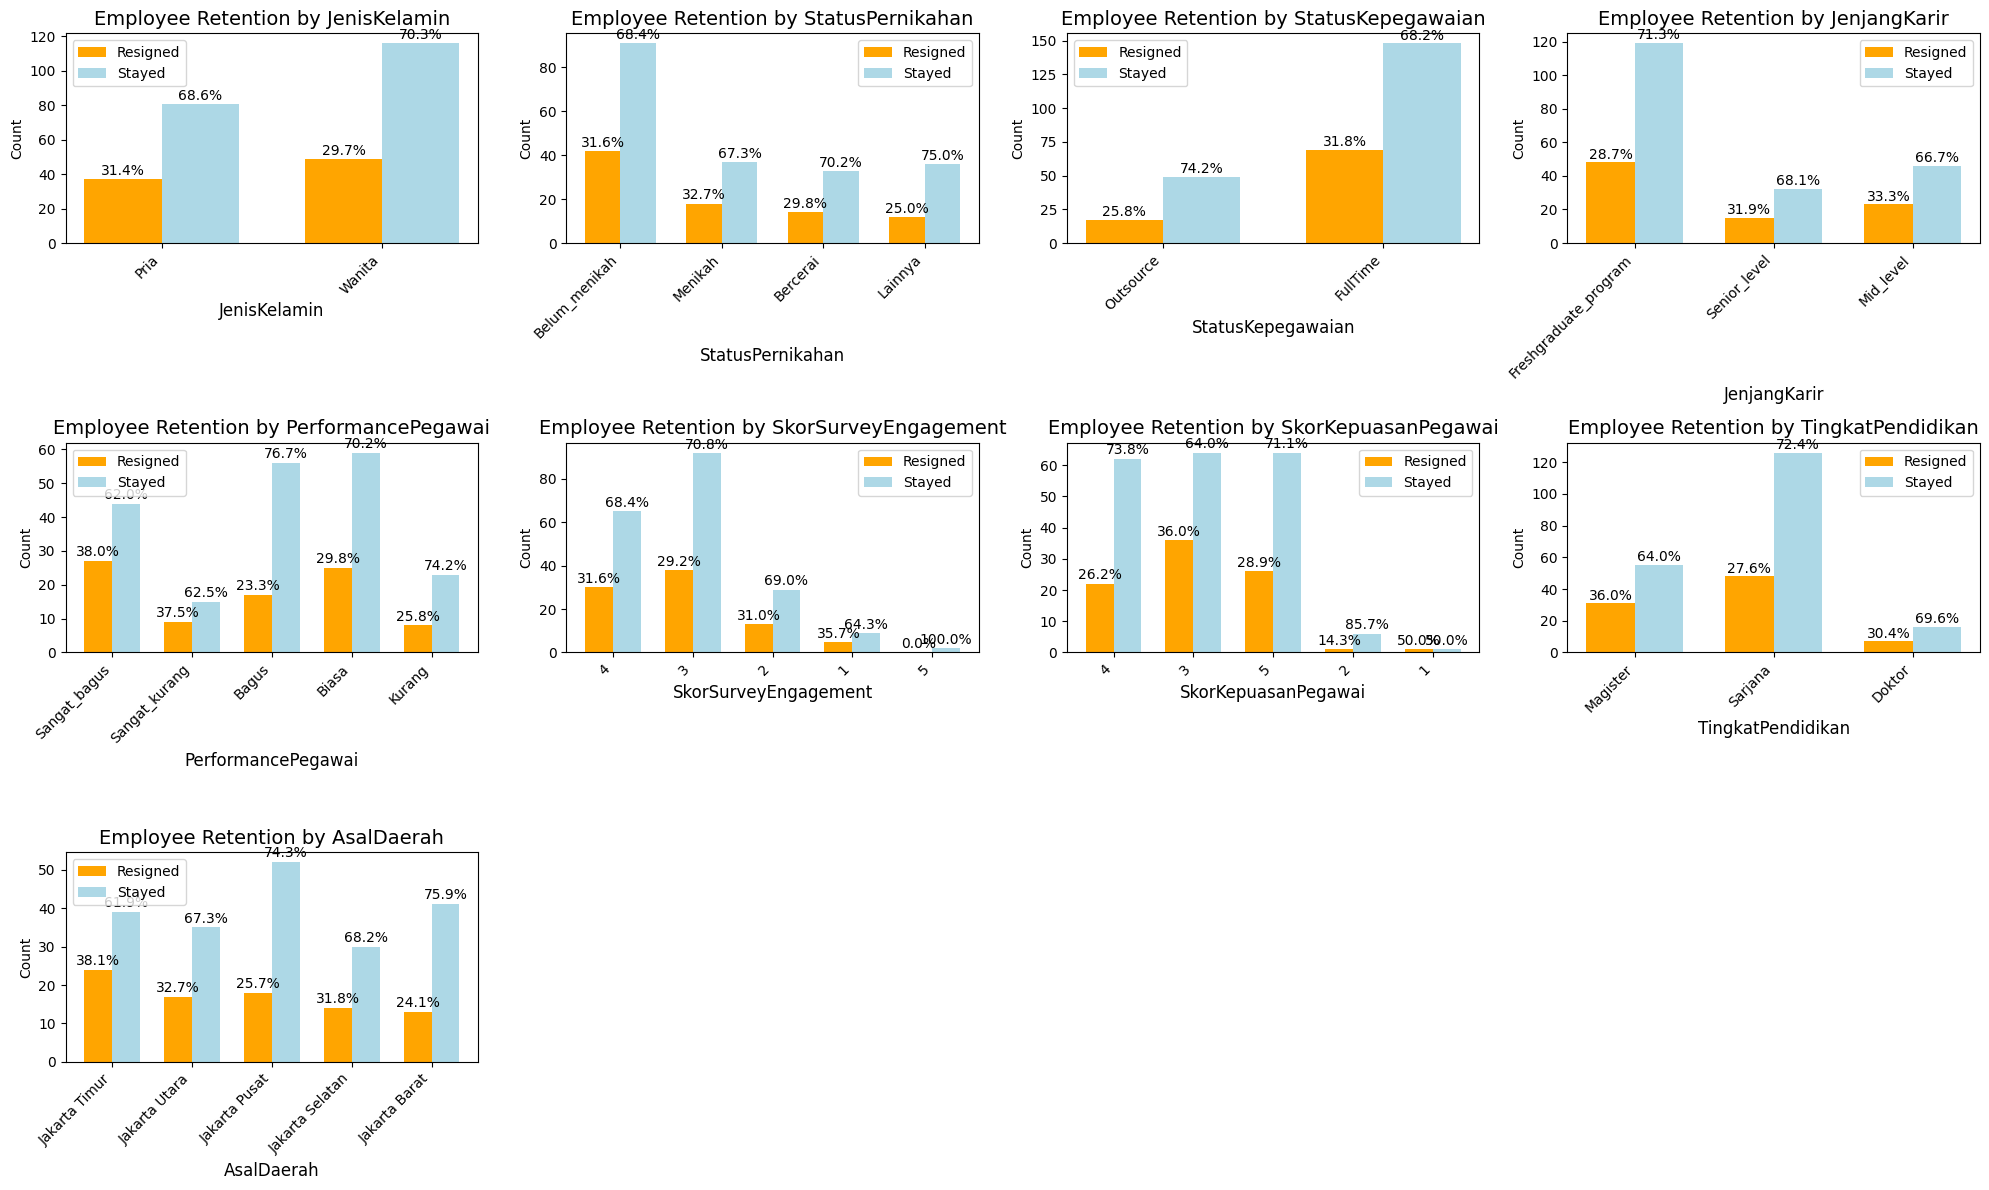

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for plotting grouped bar charts with count on y-axis and percentage labels
def plot_grouped_bar_chart(ax, feature_values, feature_name):
    # Initialize counts for stayed and resigned employees
    resigned_counts = []
    stayed_counts = []
    total_counts = []

    # Iterate over each feature value
    for value in feature_values:
        # Subset data for current feature value
        subset_data = df_cleaned[df_cleaned[feature_name] == value]
        total_count = subset_data.shape[0]
        
        # Count stayed and resigned employees
        resigned_count = subset_data[subset_data['Resigned'] == True].shape[0]
        stayed_count = subset_data[subset_data['Resigned'] == False].shape[0]
        
        # Append counts to lists
        resigned_counts.append(resigned_count)
        stayed_counts.append(stayed_count)
        total_counts.append(total_count)

    # Initialize index for x-axis
    index = np.arange(len(feature_values))
    bar_width = 0.35

    # Plot grouped bar chart
    bar1 = ax.bar(index, resigned_counts, bar_width, label='Resigned', color='orange')
    bar2 = ax.bar(index + bar_width, stayed_counts, bar_width, label='Stayed', color='lightblue')

    # Add annotations for percentage
    for i, (resigned_count, stayed_count, total_count) in enumerate(zip(resigned_counts, stayed_counts, total_counts)):
        resigned_percentage = (resigned_count / total_count) * 100 if total_count > 0 else 0
        stayed_percentage = (stayed_count / total_count) * 100 if total_count > 0 else 0
        
        ax.text(i, resigned_count + 0.5, f'{resigned_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
        ax.text(i + bar_width, stayed_count + 0.5, f'{stayed_percentage:.1f}%', ha='center', va='bottom', fontsize=10)

    # Add labels, title, and legend
    ax.set_xlabel(feature_name, fontsize=12)
    ax.set_ylabel('Count')
    ax.set_title(f'Employee Retention by {feature_name}', fontsize=14)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(feature_values, rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
    ax.legend()

# Initialize figure and axes for 8 subplots (adjust number of rows and columns as needed)
features_to_plot = [
    'JenisKelamin', 
    'StatusPernikahan', 
    'StatusKepegawaian', 
    'JenjangKarir',
    'PerformancePegawai', 
    'SkorSurveyEngagement', 
    'SkorKepuasanPegawai', 
    'TingkatPendidikan',
    'AsalDaerah'
]

num_features = len(features_to_plot)
num_cols = 4  # Define the number of columns
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each grouped bar chart into its respective subplot
for ax, feature in zip(axes, features_to_plot):
    plot_grouped_bar_chart(ax, df_cleaned[feature].unique(), feature)

# Hide any unused subplots
for ax in axes[num_features:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/232067187.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/232067187.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/232067187.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/232067187.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

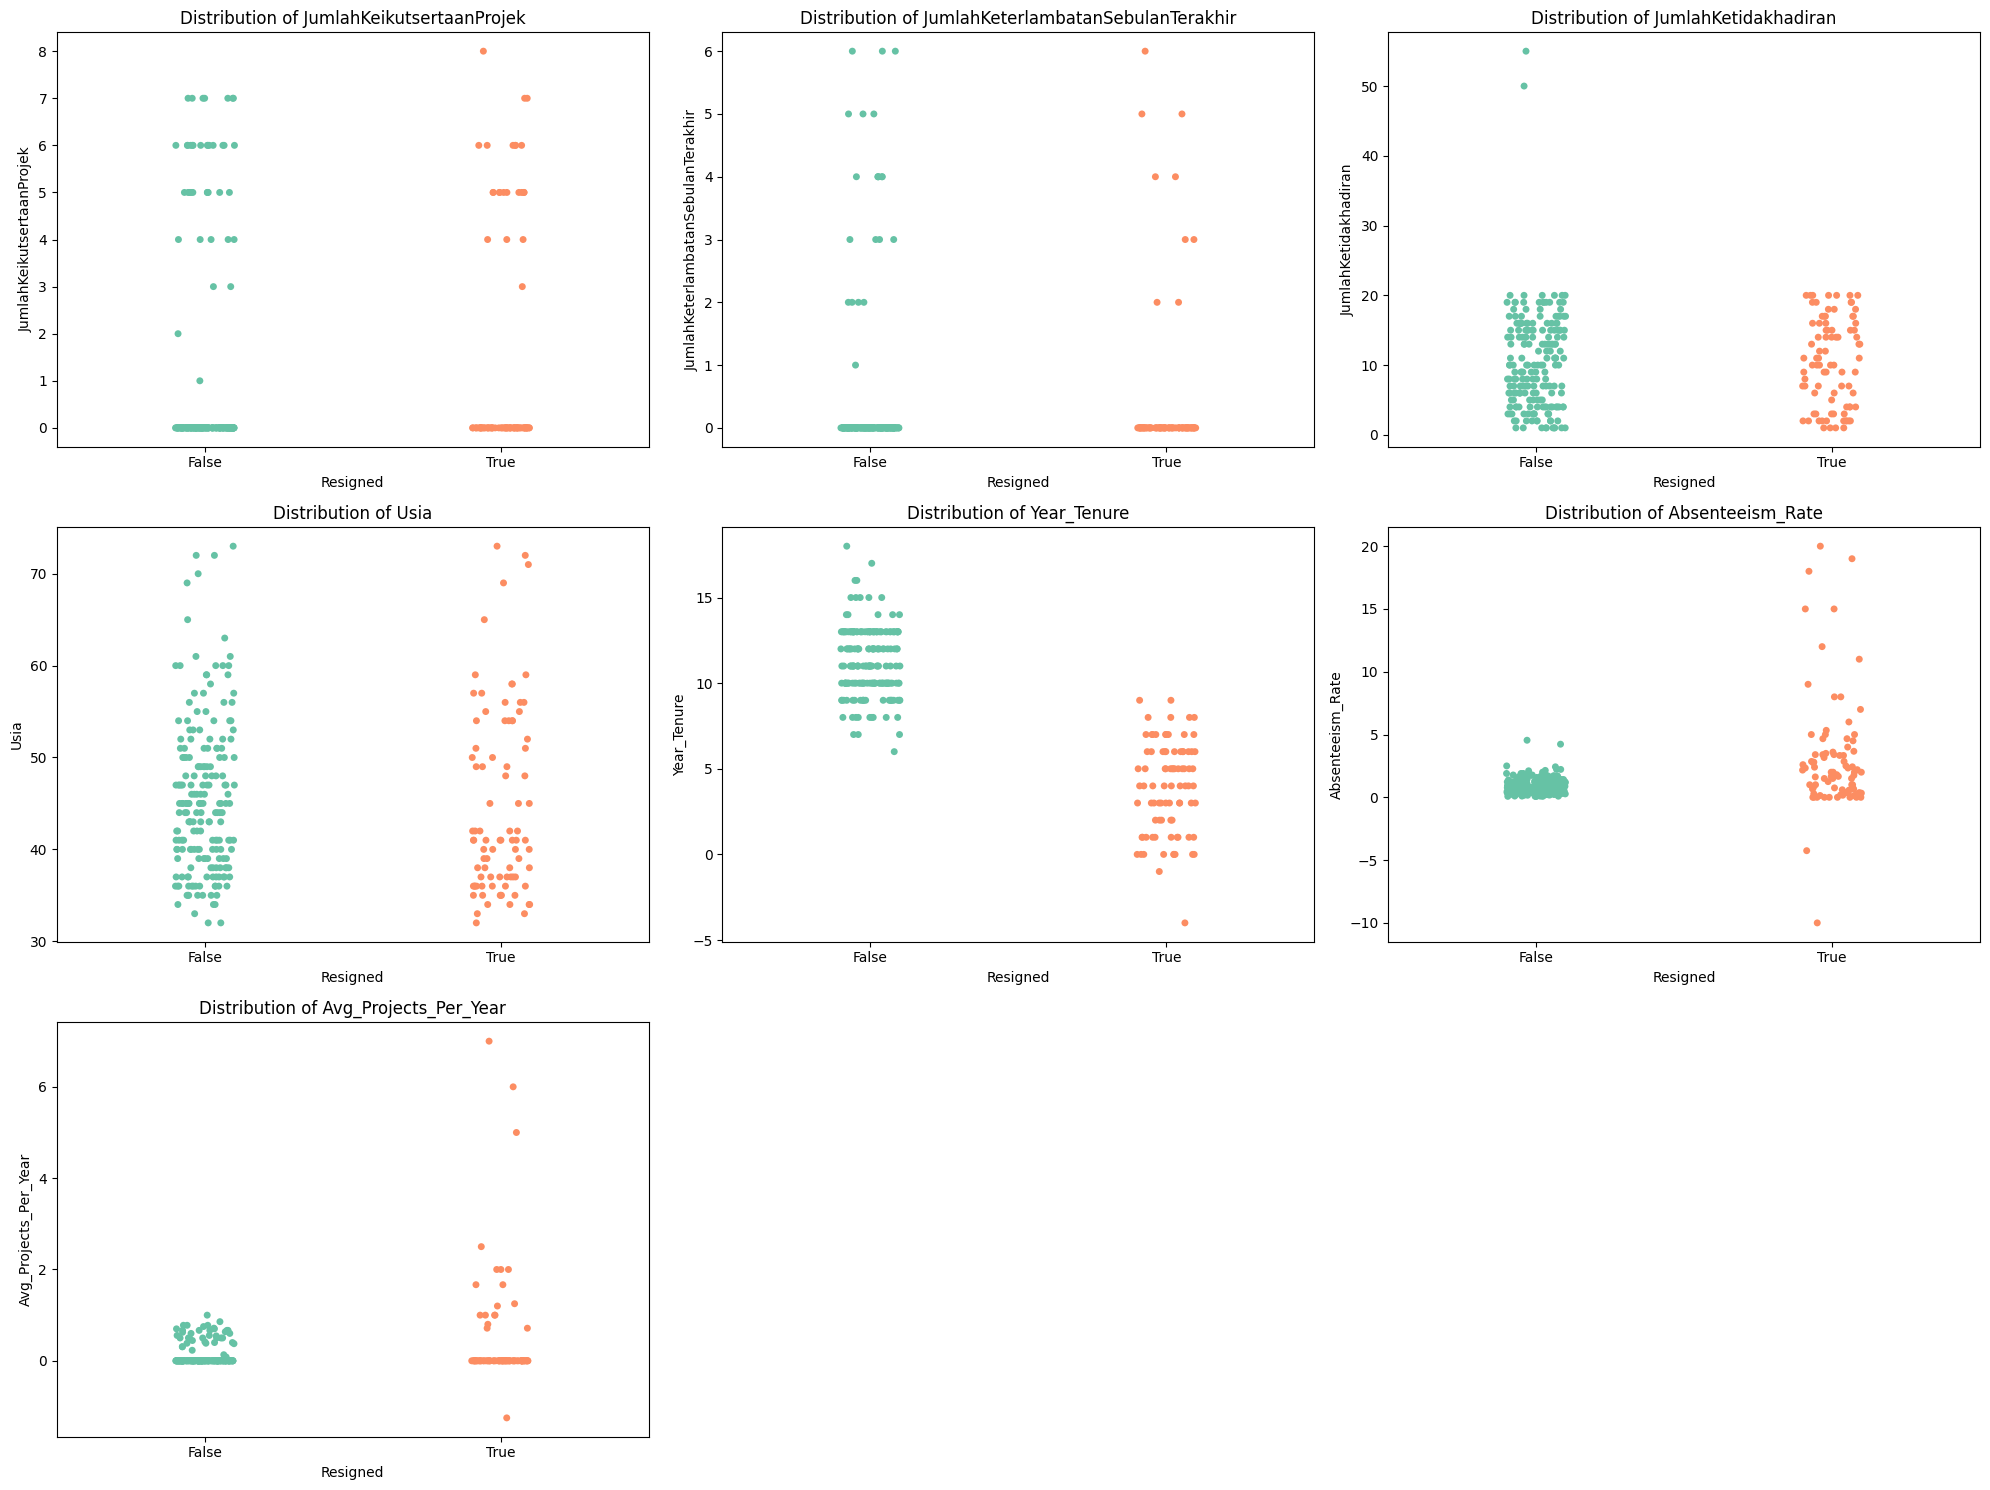

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# List of features for the strip plot
features = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 
            'Usia', 'Year_Tenure', 'Absenteeism_Rate', 'Avg_Projects_Per_Year']

# Determine the number of rows and columns based on the number of features
num_features = len(features)
num_cols = 3  # You can set this to any number of columns you prefer
num_rows = math.ceil(num_features / num_cols)

# Set up the figure with the appropriate number of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Dynamically adjust the figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each strip plot for the corresponding feature
for i, feature in enumerate(features):
    sns.stripplot(x='Resigned', y=feature, data=df_cleaned, ax=axes[i], jitter=True, palette='Set2')
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [141]:
[[ 
    'Year_Tenure',
    'Absenteeism_Rate',
    'Avg_Projects_Per_Year',
    'JenjangKarir_Encoded', 
    'TingkatPendidikan_Encoded',
    'PerformancePegawai_Encoded',
    'SkorKepuasanPegawai'
    ]]

# Label Encoding


In [ ]:
# Define the mapping for 'PerformancePegawai'
performance_mapping = {
    'Sangat_kurang': 1,
    'Kurang': 2,
    'Biasa': 3,
    'Bagus': 4,
    'Sangat_bagus': 5
}

# Apply the mapping to the 'PerformancePegawai' column
df_cleaned['PerformancePegawai_Encoded'] = df_cleaned['PerformancePegawai'].map(performance_mapping)

# Verify the result
display(df_cleaned[['PerformancePegawai', 'PerformancePegawai_Encoded']].sample(5))


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/1144870337.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



PerformancePegawai  PerformancePegawai_Encoded
223             Kurang                           2
148              Bagus                           4
60               Biasa                           3
214              Biasa                           3
78        Sangat_bagus                           5

In [ ]:
# Define the mapping for each category
level_mapping = {
    'Freshgraduate_program': 1,
    'Mid_level': 2,
    'Senior_level': 3
}

# Assuming your DataFrame has a column called 'CareerLevel' that contains these values
df_cleaned['JenjangKarir_Encoded'] = df_cleaned['JenjangKarir'].map(level_mapping)

# Display the DataFrame with the new encoded column
display(df_cleaned[['JenjangKarir', 'JenjangKarir_Encoded']].sample(5))


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/2457289230.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



JenjangKarir  JenjangKarir_Encoded
89               Mid_level                     2
68               Mid_level                     2
104           Senior_level                     3
218              Mid_level                     2
276  Freshgraduate_program                     1

In [ ]:
# Define the mapping for each category
pendidikan_mapping = {
    'Sarjana': 1,
    'Magister': 2,
    'Doktor': 3
}

# Assuming your DataFrame has a column called 'TingkatPendidikan' that contains these values
df_cleaned['TingkatPendidikan_Encoded'] = df_cleaned['TingkatPendidikan'].map(pendidikan_mapping)

# Display the DataFrame with the new encoded column
display(df_cleaned[['TingkatPendidikan', 'TingkatPendidikan_Encoded']].sample(5))


/var/folders/7f/0ys_w2gj1_7f_jwhsvt__k100000gn/T/ipykernel_3469/3225818741.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TingkatPendidikan  TingkatPendidikan_Encoded
132          Magister                          2
84           Magister                          2
130            Doktor                          3
210          Magister                          2
155           Sarjana                          1

# OneHot Encoding

In [ ]:
# One-hot encode 'StatusKepegawaian', 'JenjangKarir', and 'TingkatPendidikan' columns
df_encoded = pd.get_dummies(df_cleaned, columns=['StatusKepegawaian', 'Job_Category'], drop_first=False)

# Update the df_cleaned with the one-hot encoded features
df_cleaned = df_encoded

# Display the updated df_cleaned
df_cleaned.sample(5)


StatusPernikahan JenisKelamin                      Pekerjaan  \
27           Menikah       Wanita  Software Engineer (Front End)   
41           Lainnya         Pria   Software Engineer (Back End)   
259          Lainnya       Wanita                Product Manager   
76     Belum_menikah         Pria  Software Engineer (Front End)   
219    Belum_menikah         Pria    Software Engineer (Android)   

              JenjangKarir PerformancePegawai       AsalDaerah  \
27            Senior_level              Biasa  Jakarta Selatan   
41   Freshgraduate_program              Bagus  Jakarta Selatan   
259  Freshgraduate_program              Biasa    Jakarta Timur   
76               Mid_level              Bagus    Jakarta Pusat   
219              Mid_level       Sangat_bagus    Jakarta Barat   

         HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  \
27             LinkedIn                     3                    5   
41               Indeed                     3                    3   
259             Website                     3                    3   
76    Employee_Referral                     2                    5   
219  Diversity_Job_Fair                     3                    4   

     JumlahKeikutsertaanProjek  ...  Absenteeism_Rate  \
27                           0  ...          0.000000   
41                           0  ...          0.400000   
259                          0  ...          1.000000   
76                           0  ...          0.363636   
219                          6  ...          0.666667   

     PerformancePegawai_Encoded JenjangKarir_Encoded  \
27                            3                    3   
41                            4                    1   
259                           3                    1   
76                            4                    2   
219                           5                    2   

    TingkatPendidikan_Encoded StatusKepegawaian_FullTime  \
27                          1                       True   
41                          2                      False   
259                         2                       True   
76                          2                       True   
219                         1                      False   

    StatusKepegawaian_Outsource Job_Category_Data/Analytics  \
27                        False                       False   
41                         True                       False   
259                       False                       False   
76                        False                       False   
219                        True                       False   

    Job_Category_Design/UX  Job_Category_Engineering/Development  \
27                   False                                  True   
41                   False                                  True   
259                  False                                 False   
76                   False                                  True   
219                  False                                  True   

     Job_Category_Product Management  
27                             False  
41                             False  
259                             True  
76                             False  
219                            False  

[5 rows x 34 columns]

# Feature Selection

In [ ]:
from sklearn.feature_selection import chi2

# Define the feature set
X = df_cleaned[[
    'Job_Category_Data/Analytics', 'Job_Category_Design/UX', 'Job_Category_Engineering/Development', 'Job_Category_Product Management', 
    'StatusKepegawaian_FullTime', 'StatusKepegawaian_Outsource'
]]

# Define the target variable
y = df_cleaned['Resigned']

# Compute chi-squared statistics
chi2_stats, p_values = chi2(X, y)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Statistic': chi2_stats,
    'P-value': p_values
})

# Sort the results by the Chi2 statistic
results_sorted = results.sort_values(by='Chi2 Statistic', ascending=False)

# Display the sorted results
display(results_sorted)

Feature  Chi2 Statistic   P-value
0           Job_Category_Data/Analytics        1.367806  0.242189
5           StatusKepegawaian_Outsource        0.669150  0.413348
3       Job_Category_Product Management        0.429704  0.512134
1                Job_Category_Design/UX        0.372114  0.541854
4            StatusKepegawaian_FullTime        0.203520  0.651894
2  Job_Category_Engineering/Development        0.178539  0.672632

In [ ]:
from sklearn.feature_selection import f_classif

X_columns = ['JenjangKarir_Encoded', 'TingkatPendidikan_Encoded', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
             'PerformancePegawai_Encoded', 'Usia', 'Year_Tenure', 'Absenteeism_Rate', 'Avg_Projects_Per_Year']

X = df_cleaned[X_columns]
y = df_cleaned['Resigned']

# Compute ANOVA F-value and p-values
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to display results
results = pd.DataFrame({'Feature': X_columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort the results by F-score in descending order
results_sorted_by_fscore = results.sort_values(by='F-Score', ascending=False)

# Print the sorted table
display(results_sorted_by_fscore)

Feature     F-Score       P-Value
6                 Year_Tenure  685.127792  2.495083e-77
7            Absenteeism_Rate   41.646204  4.776709e-10
8       Avg_Projects_Per_Year   12.579959  4.566869e-04
1   TingkatPendidikan_Encoded    0.966098  3.265008e-01
3         SkorKepuasanPegawai    0.699590  4.036321e-01
5                        Usia    0.620354  4.315795e-01
0        JenjangKarir_Encoded    0.346202  5.567435e-01
4  PerformancePegawai_Encoded    0.151208  6.976777e-01
2        SkorSurveyEngagement    0.077908  7.803577e-01

<Axes: >

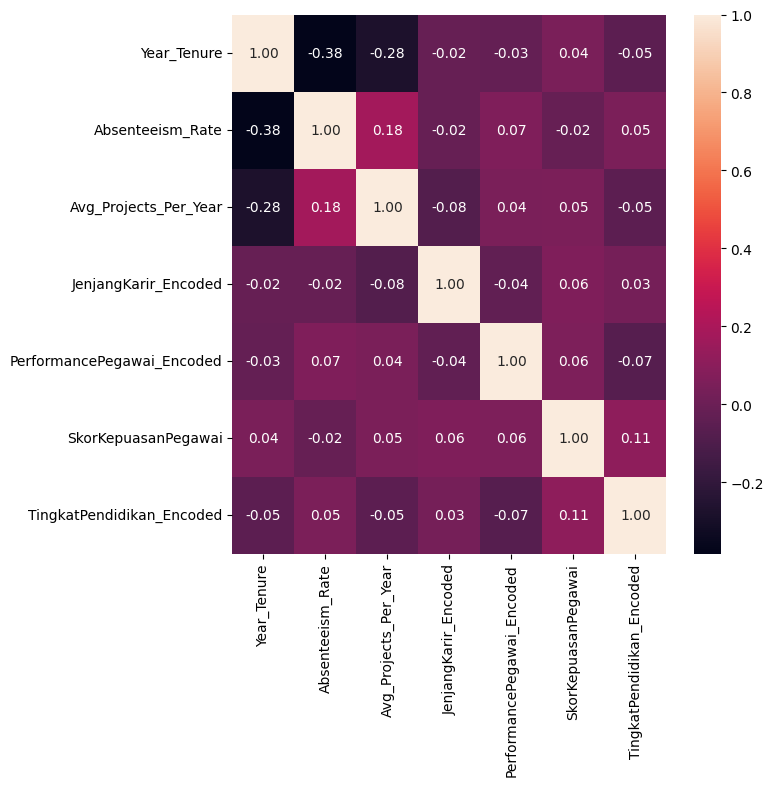

In [ ]:
# Create heatmap to see correlation between selected numerical features
nums = ['Year_Tenure', 'Absenteeism_Rate', 'Avg_Projects_Per_Year', 'JenjangKarir_Encoded', 'PerformancePegawai_Encoded', 'SkorKepuasanPegawai', 'TingkatPendidikan_Encoded']

# Create heatmap to see corelation between numerical features
plt.figure(figsize=(7,7))
sns.heatmap(df_cleaned[nums].corr(), annot=True, fmt='.2f')

# Data Split and Resampling

In [ ]:
from sklearn.model_selection import train_test_split

# Assign features and target variable

# Define the feature set based on the specified columns
X = df_cleaned[[ 
    'Year_Tenure',
    'Absenteeism_Rate',
    'Avg_Projects_Per_Year',
    'JenjangKarir_Encoded', 
    'TingkatPendidikan_Encoded',
    'PerformancePegawai_Encoded',
    'SkorKepuasanPegawai'
    ]]

y = df_cleaned['Resigned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(y.value_counts())

Resigned
False    197
True      86
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
Resigned
False    138
True     138
Name: count, dtype: int64


# Scaling and Creating an ML evaluation function

In [ ]:
# Scaling data with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Display 
display(X_test[0], X_train[0])

array([ 0.33333333,  0.55614973,  0.08333333,  2.        ,  0.        ,
        0.        , -1.        ])

array([ 1.        , -0.46087488,  0.        ,  2.        ,  1.        ,
       -0.5       ,  0.        ])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

def eval_classification(model):
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): ' + str(score['train_score'].mean()))
    print('roc_auc (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 1.00
Precision (Test Set): 0.65
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.79
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.88
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9065359477124183
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9277551533433886
True Positives (TP): 75
False Positives (FP): 8
True Negatives (TN): 189
False Negatives (FN): 11


In [ ]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['sqrt', 'log2'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi RandomizedSearchCV
dt = DecisionTreeClassifier(random_state=42)
model_dt_random =  RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall', random_state=42)
model_dt_random.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt_random.predict(X_test)#Check performa dari model
eval_classification(model_dt_random)
show_best_hyperparameter(model_dt_random)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.97
Precision (Test Set): 0.57
Precision (Train Set): 0.99
Recall (Test Set): 1.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.72
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.86
roc_auc (train-proba): 1.00
recall (crossval train): 0.9797101449275363
recall (crossval test): 0.9882352941176471
roc_auc (crossval train): 0.9407695919826343
roc_auc (crossval test): 0.9228632478632479
True Positives (TP): 85
False Positives (FP): 32
True Negatives (TN): 165
False Negatives (FN): 1
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 61, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


# Learning Curve

min_impurity_decrease: 0.001; train recall: 1.0; test recall: 0.9615384615384616
min_impurity_decrease: 0.0030204081632653063; train recall: 1.0; test recall: 1.0
min_impurity_decrease: 0.0050408163265306125; train recall: 1.0; test recall: 1.0
min_impurity_decrease: 0.007061224489795919; train recall: 0.9855072463768116; test recall: 0.9615384615384616
min_impurity_decrease: 0.009081632653061226; train recall: 0.9492753623188406; test recall: 1.0
min_impurity_decrease: 0.011102040816326531; train recall: 0.0; test recall: 0.0
min_impurity_decrease: 0.013122448979591837; train recall: 0.9927536231884058; test recall: 1.0
min_impurity_decrease: 0.015142857142857145; train recall: 0.9927536231884058; test recall: 1.0
min_impurity_decrease: 0.01716326530612245; train recall: 0.0; test recall: 0.0
min_impurity_decrease: 0.019183673469387756; train recall: 0.9492753623188406; test recall: 1.0
min_impurity_decrease: 0.02120408163265306; train recall: 0.7898550724637681; test recall: 1.0
min_

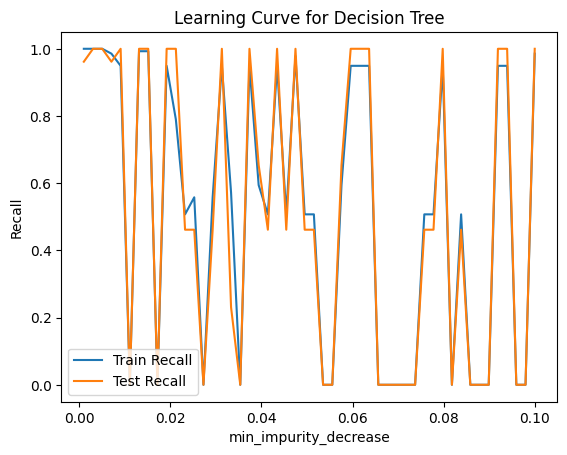

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import numpy as np
import matplotlib.pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    
    for alpha in param_values:
        # Create and fit the model with the current parameter value
        model = DecisionTreeClassifier(min_impurity_decrease=alpha, max_features='sqrt', splitter='best', criterion='entropy')
        model.fit(X_train, y_train)

        # Evaluation on training data
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # Evaluation on testing data
        y_pred_test = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred_test)
        test_scores.append(test_recall)

        print(f'min_impurity_decrease: {alpha}; train recall: {train_recall}; test recall: {test_recall}')

    # Plot the learning curve
    plt.plot(param_values, train_scores, label='Train Recall')
    plt.plot(param_values, test_scores, label='Test Recall')
    plt.xlabel('min_impurity_decrease')
    plt.ylabel('Recall')
    plt.title('Learning Curve for Decision Tree')
    plt.legend()
    plt.show()

# Example values for min_impurity_decrease
param_values = np.linspace(0.001, 0.1, 50)  # Adjust the range as needed

draw_learning_curve(param_values)


ccp_alpha: 0.001; train: 1.0; test: 1.0
ccp_alpha: 0.0011836734693877551; train: 1.0; test: 1.0
ccp_alpha: 0.0013673469387755102; train: 1.0; test: 1.0
ccp_alpha: 0.0015510204081632655; train: 1.0; test: 0.8846153846153846
ccp_alpha: 0.0017346938775510204; train: 1.0; test: 0.9615384615384616
ccp_alpha: 0.0019183673469387757; train: 1.0; test: 0.9615384615384616
ccp_alpha: 0.002102040816326531; train: 1.0; test: 1.0
ccp_alpha: 0.002285714285714286; train: 1.0; test: 0.8846153846153846
ccp_alpha: 0.0024693877551020408; train: 1.0; test: 0.9615384615384616
ccp_alpha: 0.002653061224489796; train: 1.0; test: 1.0
ccp_alpha: 0.0028367346938775514; train: 1.0; test: 0.7692307692307693
ccp_alpha: 0.0030204081632653063; train: 1.0; test: 1.0
ccp_alpha: 0.0032040816326530616; train: 1.0; test: 0.9615384615384616
ccp_alpha: 0.0033877551020408164; train: 1.0; test: 0.9230769230769231
ccp_alpha: 0.0035714285714285718; train: 1.0; test: 1.0
ccp_alpha: 0.0037551020408163266; train: 1.0; test: 0.96153

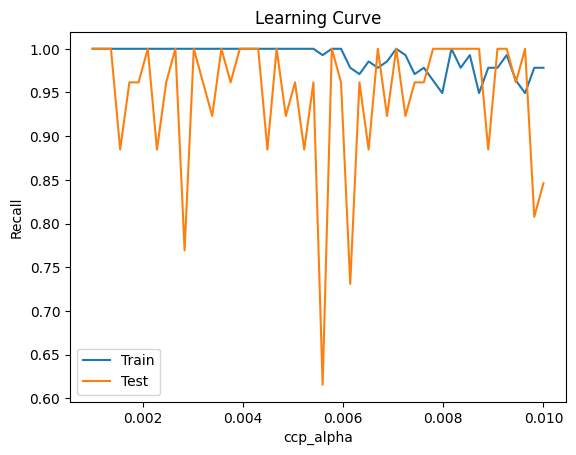

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    
    for alpha in param_values:
        model = DecisionTreeClassifier(ccp_alpha=alpha, max_features= 'sqrt', splitter= 'best', criterion= 'entropy')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('ccp_alpha: ' + str(alpha) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('ccp_alpha')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Example values for ccp_alpha
param_values = np.linspace(0.001, 0.01, 50)  # Adjust the range as needed

draw_learning_curve(param_values)


max_depth: 3; train: 0.9855072463768116; test: 1.0
max_depth: 4; train: 0.8913043478260869; test: 0.8461538461538461
max_depth: 5; train: 0.9855072463768116; test: 1.0
max_depth: 7; train: 0.9855072463768116; test: 1.0
max_depth: 8; train: 0.9927536231884058; test: 1.0
max_depth: 10; train: 1.0; test: 1.0
max_depth: 11; train: 1.0; test: 0.8076923076923077
max_depth: 12; train: 1.0; test: 1.0
max_depth: 14; train: 1.0; test: 1.0
max_depth: 15; train: 1.0; test: 0.8461538461538461
max_depth: 17; train: 1.0; test: 1.0
max_depth: 18; train: 1.0; test: 1.0
max_depth: 19; train: 1.0; test: 1.0
max_depth: 21; train: 1.0; test: 0.9615384615384616
max_depth: 22; train: 1.0; test: 1.0
max_depth: 24; train: 1.0; test: 1.0
max_depth: 25; train: 1.0; test: 0.9615384615384616
max_depth: 26; train: 1.0; test: 0.9615384615384616
max_depth: 28; train: 1.0; test: 1.0
max_depth: 29; train: 1.0; test: 1.0
max_depth: 31; train: 1.0; test: 0.8846153846153846
max_depth: 32; train: 1.0; test: 0.8846153846153

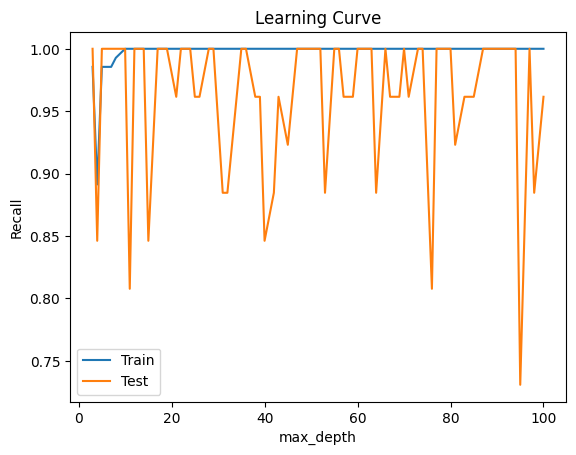

In [ ]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i, max_features= 'sqrt', splitter= 'best', criterion= 'entropy')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('max_depth: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(3, 100, 70)]
draw_learning_curve(param_values)

min_samples_leaf: 2; train: 0.9782608695652174; test: 1.0
min_samples_leaf: 2; train: 0.9565217391304348; test: 0.8076923076923077
min_samples_leaf: 3; train: 0.9710144927536232; test: 1.0
min_samples_leaf: 4; train: 0.9202898550724637; test: 0.8076923076923077
min_samples_leaf: 5; train: 0.9565217391304348; test: 0.9615384615384616
min_samples_leaf: 6; train: 0.9927536231884058; test: 1.0
min_samples_leaf: 7; train: 0.9782608695652174; test: 1.0
min_samples_leaf: 8; train: 0.9782608695652174; test: 1.0
min_samples_leaf: 9; train: 0.9855072463768116; test: 1.0
min_samples_leaf: 10; train: 0.8478260869565217; test: 0.9230769230769231
min_samples_leaf: 11; train: 0.9855072463768116; test: 1.0
min_samples_leaf: 12; train: 0.8985507246376812; test: 0.8846153846153846
min_samples_leaf: 13; train: 0.9492753623188406; test: 1.0
min_samples_leaf: 14; train: 0.8333333333333334; test: 0.8846153846153846
min_samples_leaf: 15; train: 0.9855072463768116; test: 1.0
min_samples_leaf: 16; train: 0.985

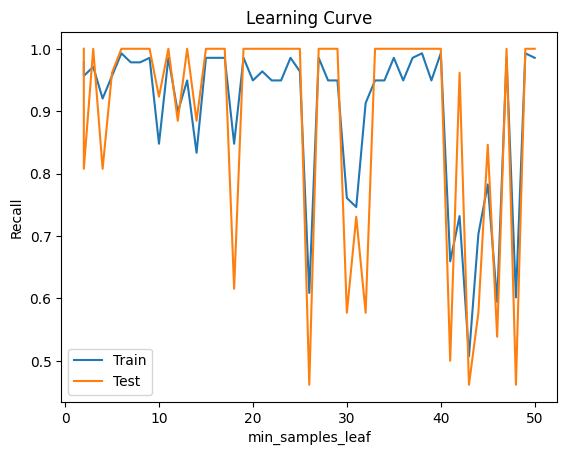

In [ ]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i, max_features= 'sqrt', splitter= 'best', criterion= 'entropy')
        model.fit(X_train, y_train)
        
        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('min_samples_leaf: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 50, 50)]
draw_learning_curve(param_values)

min_samples_split: 2; train: 1.0; test: 1.0
min_samples_split: 2; train: 1.0; test: 0.9615384615384616
min_samples_split: 3; train: 0.9637681159420289; test: 0.9615384615384616
min_samples_split: 4; train: 0.9855072463768116; test: 0.8846153846153846
min_samples_split: 5; train: 0.9782608695652174; test: 0.8076923076923077
min_samples_split: 5; train: 0.9782608695652174; test: 1.0
min_samples_split: 6; train: 0.9710144927536232; test: 1.0
min_samples_split: 7; train: 0.9855072463768116; test: 0.9615384615384616
min_samples_split: 8; train: 0.9565217391304348; test: 0.8846153846153846
min_samples_split: 8; train: 0.9710144927536232; test: 0.9615384615384616
min_samples_split: 9; train: 1.0; test: 1.0
min_samples_split: 10; train: 0.9855072463768116; test: 0.9615384615384616
min_samples_split: 11; train: 0.9710144927536232; test: 0.8076923076923077
min_samples_split: 12; train: 0.9202898550724637; test: 1.0
min_samples_split: 12; train: 0.9855072463768116; test: 1.0
min_samples_split: 13

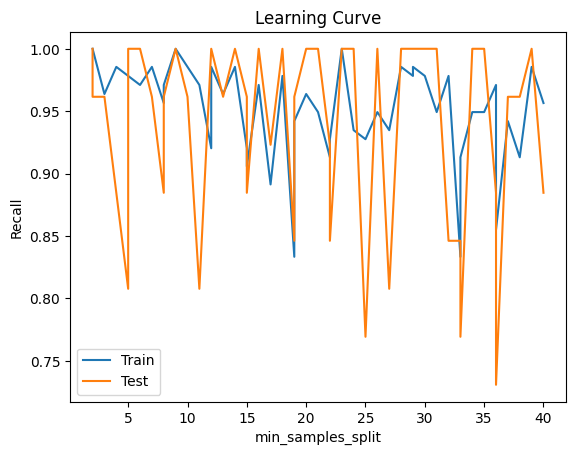

In [ ]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    for i in param_values:
        model = DecisionTreeClassifier(min_samples_split=i, max_features= 'sqrt', splitter= 'best', criterion= 'entropy')
        model.fit(X_train, y_train)
        
        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('min_samples_split: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    
param_values = [int(x) for x in np.linspace(2, 40, 50)]
draw_learning_curve(param_values)

# Tuned Model

In [ ]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters in list format
min_impurity_decrease = [0.019183673469387756, 0.011102040816326531]
ccp_alpha = [0.03736734693877551, 0.011102040816326531, 0.013122448979591837]
max_depth = [2, 74, 77]
min_samples_leaf = [3, 12, 11]
min_samples_split = [20, 34]
max_features = ['sqrt', 'log2']  # Number of features to consider at every split
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

# Dictionary of hyperparameters
hyperparameters = dict(min_impurity_decrease=min_impurity_decrease,
                       ccp_alpha=ccp_alpha,
                       max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter)

# Initialize GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
model_dt_grid = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall', n_jobs=-1)

# Fit the model
model_dt_grid.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt_grid.predict(X_test)

# Check performance from the model
eval_classification(model_dt_grid)
show_best_hyperparameter(model_dt_grid)

Accuracy (Test Set): 0.68
Accuracy (Train Set): 0.76
Precision (Test Set): 0.46
Precision (Train Set): 0.99
Recall (Test Set): 0.23
Recall (Train Set): 0.53
F1-Score (Test Set): 0.31
F1-Score (Train Set): 0.69
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.81
recall (crossval train): 0.7120204603580562
recall (crossval test): 0.7196078431372549
roc_auc (crossval train): 0.9754788101962791
roc_auc (crossval test): 0.9763499245852187
True Positives (TP): 62
False Positives (FP): 0
True Negatives (TN): 197
False Negatives (FN): 24
{'ccp_alpha': 0.03736734693877551, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 74, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.011102040816326531, 'min_samples_leaf': 3, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Correcting the hyperparameter assignment
model_dt_best = DecisionTreeClassifier(
    ccp_alpha=0.0,
    class_weight=None, 
    criterion='entropy', 
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_samples_leaf=2, 
    min_samples_split=5, 
    min_weight_fraction_leaf=0.0, 
    random_state=42, 
    splitter='best'
)

# Fitting the model
model_dt_best.fit(X_train, y_train)

# Evaluate the model
eval_classification(model_dt_best)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.97
Precision (Test Set): 0.57
Precision (Train Set): 0.99
Recall (Test Set): 1.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.72
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.86
roc_auc (train-proba): 1.00
recall (crossval train): 0.9156862745098039
recall (crossval test): 0.8947712418300654
roc_auc (crossval train): 0.9956846415481666
roc_auc (crossval test): 0.9315564772917714
True Positives (TP): 77
False Positives (FP): 15
True Negatives (TN): 182
False Negatives (FN): 9


# Feature Importance and Shap

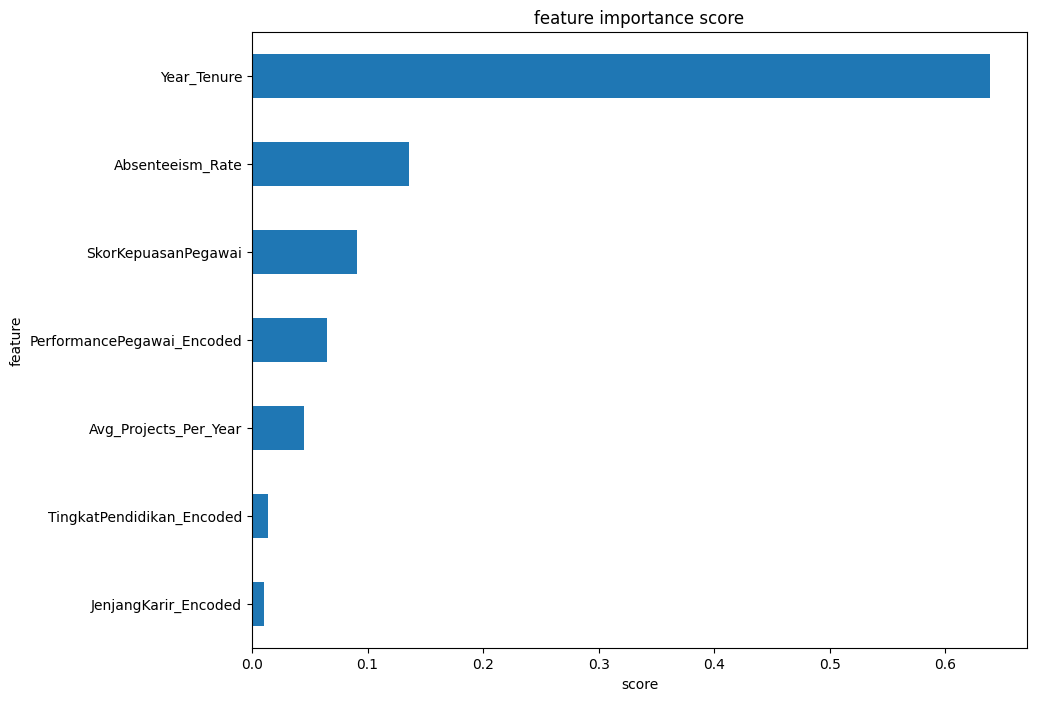

In [ ]:
show_feature_importance(model_dt_best)

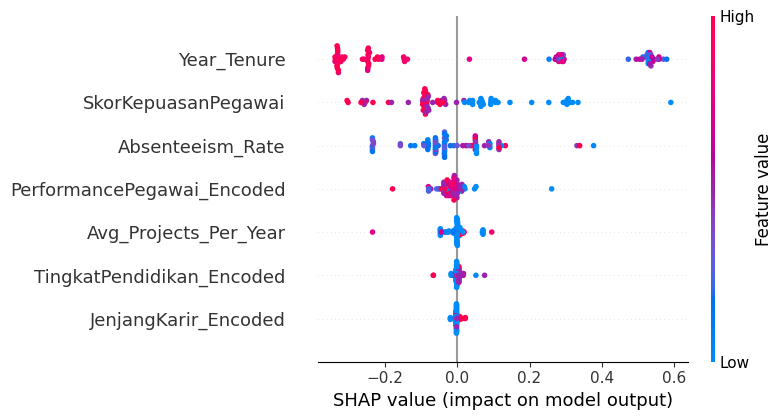

In [ ]:
import shap

# Use SHAP TreeExplainer for Decision Tree models
explainer = shap.TreeExplainer(model_dt_best)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values [:, :, 1], X_test, feature_names=X.columns) #


In [ ]:
shap_values[3]

array([[-0.52764712,  0.52764712],
       [-0.05035944,  0.05035944],
       [-0.00095396,  0.00095396],
       [ 0.00176601, -0.00176601],
       [ 0.00142495, -0.00142495],
       [-0.00227153,  0.00227153],
       [ 0.0780411 , -0.0780411 ]])

# XG Boost


In [ ]:
from xgboost import XGBClassifier
# Initialize classifier
xg = XGBClassifier()

# Fit the model
xg.fit(X_train, y_train)

# Evaluate the model
eval_classification(xg)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 1.00
Precision (Test Set): 0.70
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.83
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
recall (crossval train): 0.9970588235294118
recall (crossval test): 0.9300653594771242
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9865108094519858
True Positives (TP): 80
False Positives (FP): 5
True Negatives (TN): 192
False Negatives (FN): 6


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=4, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)
show_best_hyperparameter(xg_tuned)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.97
Precision (Test Set): 0.67
Precision (Train Set): 0.96
Recall (Test Set): 1.00
Recall (Train Set): 0.98
F1-Score (Test Set): 0.80
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
recall (crossval train): 0.9331202046035806
recall (crossval test): 0.9294117647058824
roc_auc (crossval train): 0.9885342199199807
roc_auc (crossval test): 0.9703150661974191
True Positives (TP): 80
False Positives (FP): 4
True Negatives (TN): 193
False Negatives (FN): 6
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.4, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.7000000000000001, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 

In [ ]:
import numpy as np
from xgboost import XGBClassifier

# Correcting the hyperparameters assignment
hyperparameters = {
    'objective': 'binary:logistic',
    'colsample_bytree': 0.4,
    'max_depth': 100,
    'min_child_weight': 4,
    'gamma': 0.7000000000000001,
    'tree_method': 'auto',
    'eta': 0.7474747474747475,
    'lambda': 0.7000000000000001,
    'alpha': 0.9
}

# Initialize the XGBClassifier with the specified hyperparameters
xg_best = XGBClassifier(**hyperparameters, random_state=42)

# Fit the model
xg_best.fit(X_train, y_train)

# Evaluate the model
eval_classification(xg_best)


Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.97
Precision (Test Set): 0.67
Precision (Train Set): 0.96
Recall (Test Set): 1.00
Recall (Train Set): 0.98
F1-Score (Test Set): 0.80
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
recall (crossval train): 0.9331202046035806
recall (crossval test): 0.9294117647058824
roc_auc (crossval train): 0.9906598744191843
roc_auc (crossval test): 0.9834560918384447
True Positives (TP): 80
False Positives (FP): 4
True Negatives (TN): 193
False Negatives (FN): 6


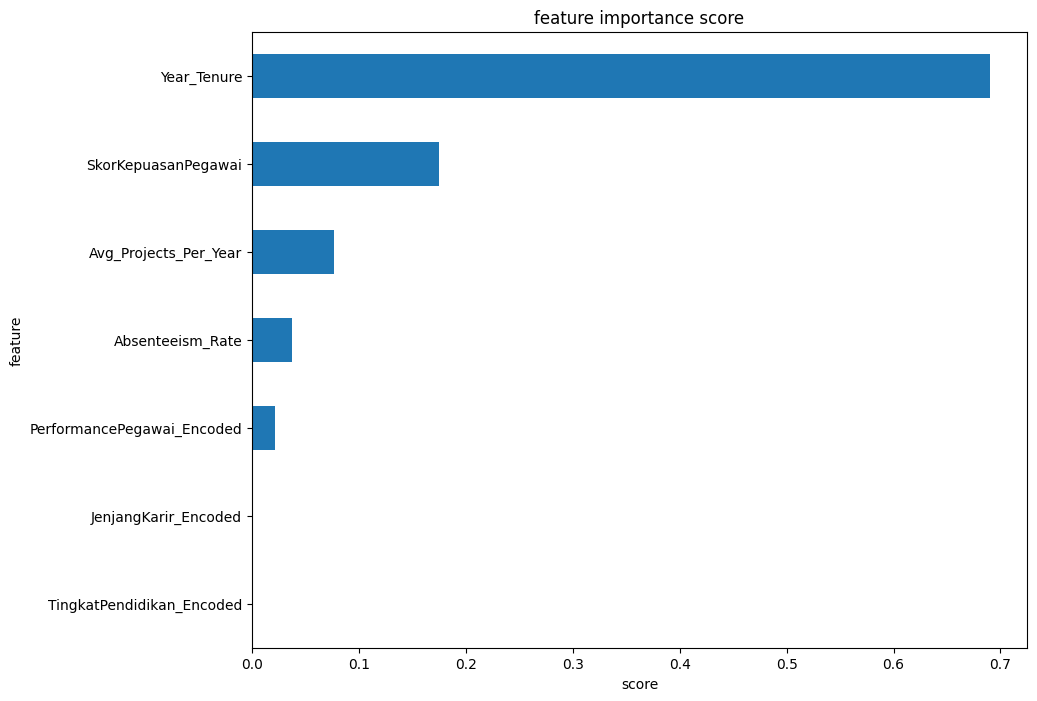

In [ ]:
show_feature_importance(xg_best)

# K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Evaluate the model
eval_classification(knn)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.97
Precision (Test Set): 0.68
Precision (Train Set): 0.98
Recall (Test Set): 1.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.81
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.99
recall (crossval train): 0.9215260017050297
recall (crossval test): 0.9176470588235295
roc_auc (crossval train): 0.9951372428390431
roc_auc (crossval test): 0.980666163901458
True Positives (TP): 79
False Positives (FP): 2
True Negatives (TN): 195
False Negatives (FN): 7


Using 276 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/85 [00:00<?, ?it/s]

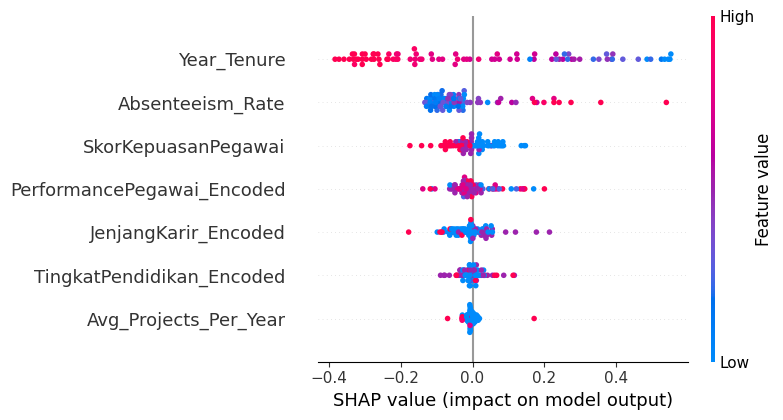

In [ ]:
# Use SHAP's KernelExplainer to explain the KNN model
explainer = shap.KernelExplainer(knn.predict_proba, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X.columns)

In [ ]:
shap_values[0]

array([[ 0.21346963, -0.21346963],
       [ 0.03807108, -0.03807108],
       [ 0.00447205, -0.00447205],
       [ 0.17775707, -0.17775707],
       [ 0.02558316, -0.02558316],
       [ 0.06360248, -0.06360248],
       [-0.0309265 ,  0.0309265 ]])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 1.00
Precision (Test Set): 0.67
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.80
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9294117647058824
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9847184514831573
True Positives (TP): 80
False Positives (FP): 4
True Negatives (TN): 193
False Negatives (FN): 6


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix
from scipy.stats import randint

# Define the classifier
rf = RandomForestClassifier()

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 301),        # Randomly sample number of trees between 100 and 300
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),      # Randomly sample min samples split between 2 and 10
    'min_samples_leaf': randint(1, 10),        # Randomly sample min samples leaf between 1 and 4
}

# Define scoring metric (e.g., recall)
scorer = make_scorer(recall_score)

# Initialize RandomizedSearchCV
random_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, 
                                    cv=5, scoring=scorer, verbose=1, n_jobs=-1, random_state=42)

# Perform randomized search
random_rf.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(random_rf)
show_best_hyperparameter(random_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.98
Precision (Test Set): 0.62
Precision (Train Set): 0.97
Recall (Test Set): 1.00
Recall (Train Set): 0.99
F1-Score (Test Set): 0.76
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
recall (crossval train): 0.9331202046035806
recall (crossval test): 0.9294117647058824
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
hyperparameters = {
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'criterion': 'gini',
    'max_depth': 20,
    'min_samples_leaf': 3,
    'min_samples_split': 9,
    'n_estimators': 288,
    'random_state': 42
}

# Fit Model Random Forest
rf_best = RandomForestClassifier(**hyperparameters)  # Use ** to unpack the dictionary
rf_best.fit(X_train, y_train)

# Evaluate classification
eval_classification(rf_best)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.97
Precision (Test Set): 0.70
Precision (Train Set): 0.96
Recall (Test Set): 1.00
Recall (Train Set): 0.99
F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval train): 0.9301790281329924
recall (crossval test): 0.9294117647058824
roc_auc (crossval train): 0.9974558567664961
roc_auc (crossval test): 0.988251215015921
True Positives (TP): 80
False Positives (FP): 5
True Negatives (TN): 192
False Negatives (FN): 6


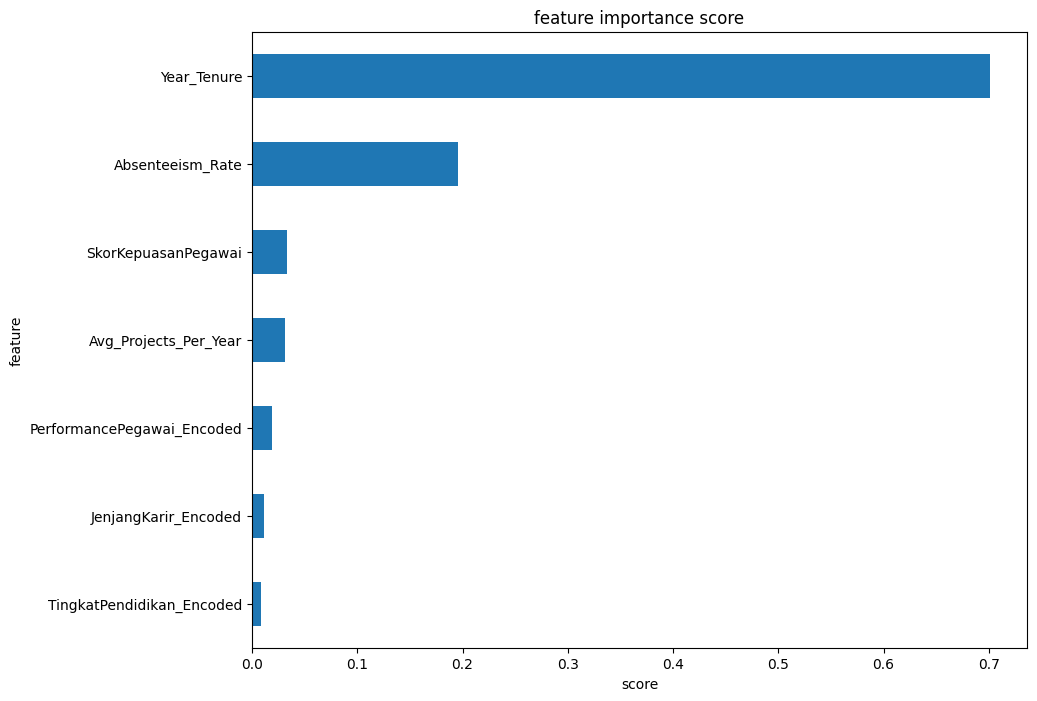

In [ ]:
show_feature_importance(rf_best)

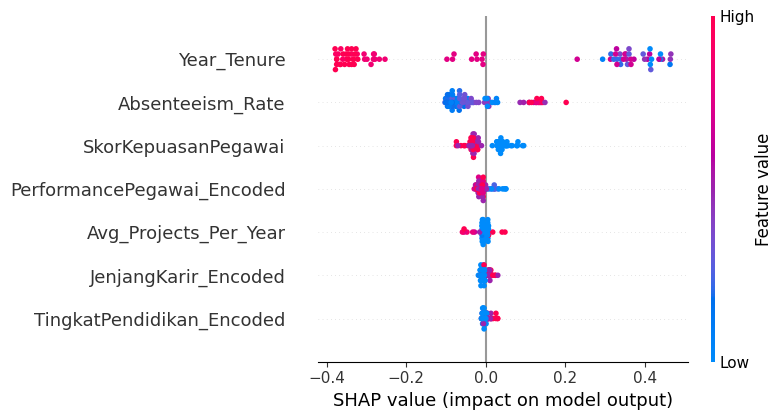

In [138]:
import shap

# Use SHAP TreeExplainer for Decision Tree models
explainer = shap.TreeExplainer(rf_best)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values [:, :, 1], X_test, feature_names=X.columns) #

In [140]:
shap_values[0] 

array([[ 0.35962815, -0.35962815],
       [-0.02212524,  0.02212524],
       [ 0.0091654 , -0.0091654 ],
       [-0.00393476,  0.00393476],
       [ 0.00622883, -0.00622883],
       [ 0.017505  , -0.017505  ],
       [-0.03889805,  0.03889805]])

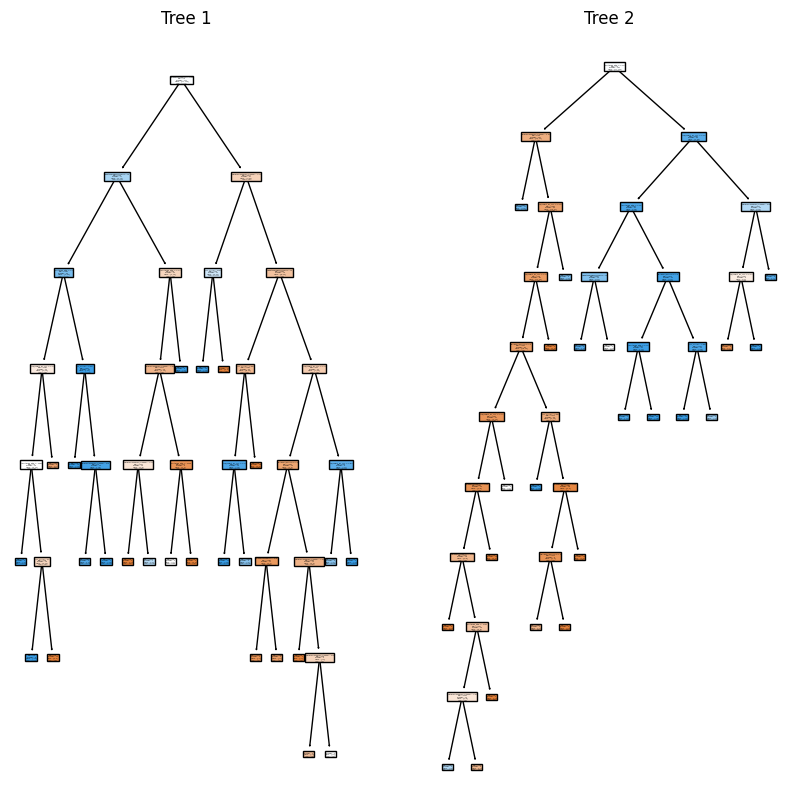

In [137]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Visualize the first two trees in the Random Forest
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

for index, (ax, estimator) in enumerate(zip(axes, rf_best.estimators_[:2])):
    tree.plot_tree(estimator, 
                   feature_names=X.columns, 
                   class_names=['Stay', 'Resign'], 
                   filled=True, 
                   ax=ax)
    ax.set_title(f'Tree {index + 1}')

plt.show()


# tree

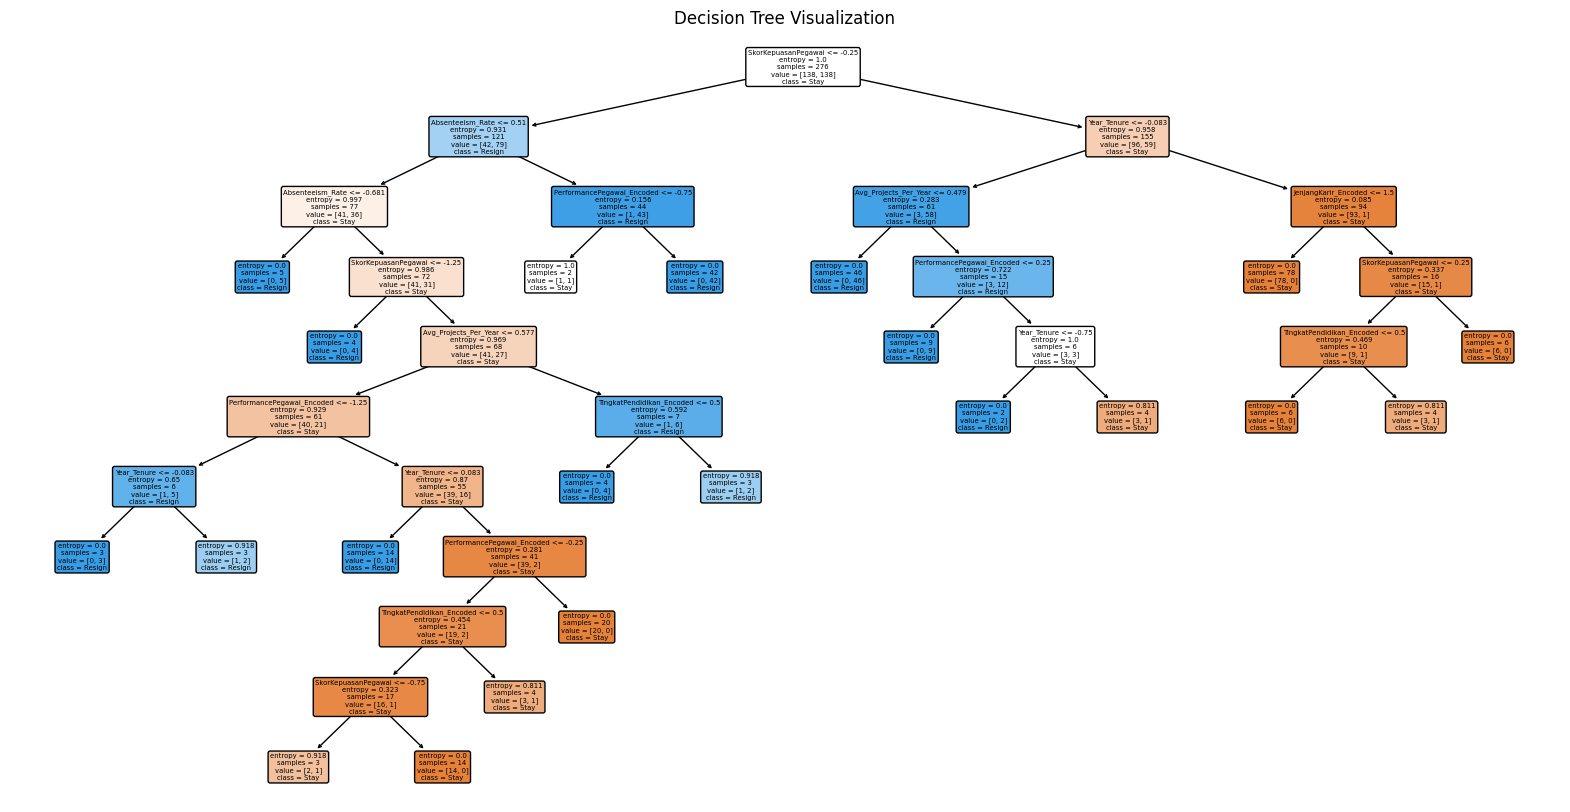

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model_dt_best, feature_names=X.columns, class_names=['Stay', 'Resign'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


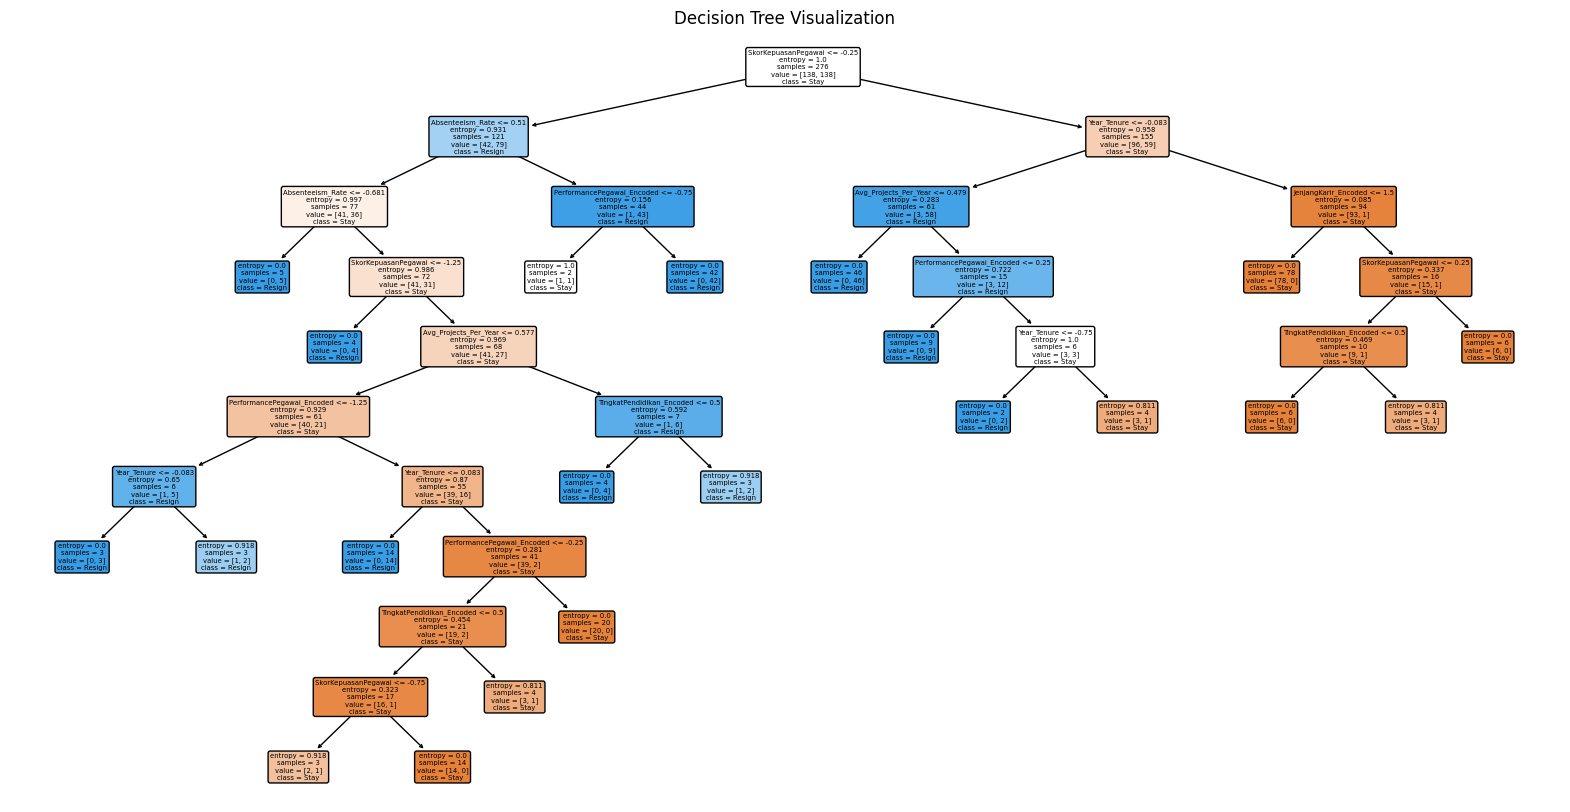

In [103]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model_dt_best, feature_names=X.columns, class_names=['Stay', 'Resign'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
